# Fastcampus 판매 분석
**Who's the VIP?**



---


- by 이어드림스쿨 2기 취업 중급 9조 **3P2C**
- 권순빈, 노치현, 이진규, 이현규, 장지훈



---



## 프로젝트 설명

**목표**

- 온라인 전문 교육기관인 패스트캠퍼스의 21년 3월~ 21년 9월 사이 결제 데이터를 분석
- 강의를 환불하지 않은 **`고객(순구매자)`** 데이터를 타겟 변수로 지정 (Purchased)
- VIP의 **기준**을 정한 뒤, 이들의 특성을 파악
- **시각화**를 이용하여 비교분석한 후, 그에 따른 판매 전략 제시

**진행 계획**

* **결측치, 이상치 전처리**
* **타겟 변수 선정**(`순 구매 테이블`)
* 타겟 변수를 가지고 **EDA** 진행
* VIP 조건 설정
* 다양한 방면에서 분석 후 판매 전략 수립

## 초기 설정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# %matplotlib inline
# 주피터 노트북에 최적화 된 그래프 설정(코랩 사용불가)

# %matplotlib notebook
# 인터렉티브 그래프 가능(코랩 사용불가)

In [ ]:
%config InlineBackend.figure_format = 'retina'

**주피터 노트북 matplotlib 한글 설정**

In [ ]:
# import os

# # Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
# if os.name == 'posix':
#     plt.rc("font", family="AppleGothic")
# else:
#     plt.rc("font", family="Malgun Gothic")

**코랩 matplotlib 한글 설정**

In [ ]:
# 네이버 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 실행 후 런타입 재실행

In [ ]:
# 런타임 재실행 후 적용
plt.rc('font', family='NanumBarunGothic') 

**엑셀 불러오기 설정**

In [ ]:
!pip install openpyxl

테이블 시트 위치 설정

In [ ]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## 변수 설명

---

-Columns

---

|Columns|Content|
|:---|:---|
|id|해당 거래내역에 대한 ID(PK)|
|customer_id|결제한 고객 ID|
|course_id|강의 ID (프로모션에 대해서는 값이 할당X)|
|type|거래의 종류|
|state|거래에 대한 상태|
|course_title|강의 제목|
|category_title|대분류|
|format|온라인 강의의 기획 종류|
|completed_at|state가 COMPLETED로 변경된 시점|
|transaction_amount|최종 결제 금액|
|coupon_title|쿠폰 종류|
|coupon_discount_amount|쿠폰 할인 금액|
|sale_price|판매 금액|
|tax_free_amount|보안상 공유가 힘듦|
|pg|PG사 종류|
|method|결제 방식|
|subcategory_title|중분류|
|marketing_start_at|강의 판매 시점|

---

-Type 유형

---

|type|유형|
|:---|:---|
|<span style="color: red">ORDER</span>|<span style="color: red">DEPRECATED</span>|
|PAYMENT|결제|
|<span style="color: red">TRANSACTION</span>|<span style="color: red">B2B 계약결제(무시해도 좋음)</span>|
|REFUND|환불|

---

-State 유형

---

|state|상태|
|:---|:---|
|COMPLETED|결제 완료|
|REQUESTED|고객에게 결제 요청|
|<span style="color: red">PENDING</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">CANCELLED</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">HIDDEN</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">DELETE</span>|<span style="color: red">보안 이슈로 공개X</span>|

# 데이터 분석

## 데이터 전처리

In [ ]:
# 데이터 불러오기
# for colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/yds/FC_EDA/파이널프로젝트_RAW_210329_210926.xlsx")

In [ ]:
df = train.copy()

In [ ]:
df.head()

id  customer_id  course_id     type      state  \
0  970634     504760.0   201435.0    ORDER  CANCELLED   
1  970650     432862.0   203178.0    ORDER  CANCELLED   
2  970657      72297.0   204246.0  PAYMENT  COMPLETED   
3  970656      72297.0   204246.0    ORDER  CANCELLED   
4  970658     478028.0   201797.0  PAYMENT  COMPLETED   

                    course_title category_title  format        completed_at  \
0      올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원 2021-03-28 15:00:11   
1    초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원 2021-03-28 15:16:53   
2           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
3           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
4  올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX         업무 생산성     올인원 2021-03-28 15:21:54   

   transaction_amount              coupon_title  coupon_discount_amount  \
0               90500                       NaN                     NaN   
1               96000                       NaN                     NaN   
2              171810     [10% 할인] 시크릿코드 실무 완성편                 19090.0   
3              171810                       NaN                     NaN   
4               97500  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0   

   sale_price  tax_free_amount   pg method subcategory_title  \
0    110500.0         110500.0  NaN  VBANK           개발자 커리어   
1    116000.0         116000.0  NaN   CARD             영상 편집   
2    190900.0         190900.0  NaN   CARD               NaN   
3    190900.0         190900.0  NaN   CARD               NaN   
4    117500.0         117500.0  NaN   CARD           PPT/보고서   

  marketing_start_at  
0                NaT  
1         2020-12-02  
2         2021-03-04  
3         2021-03-04  
4         2019-11-14

### 결측값 확인 및 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

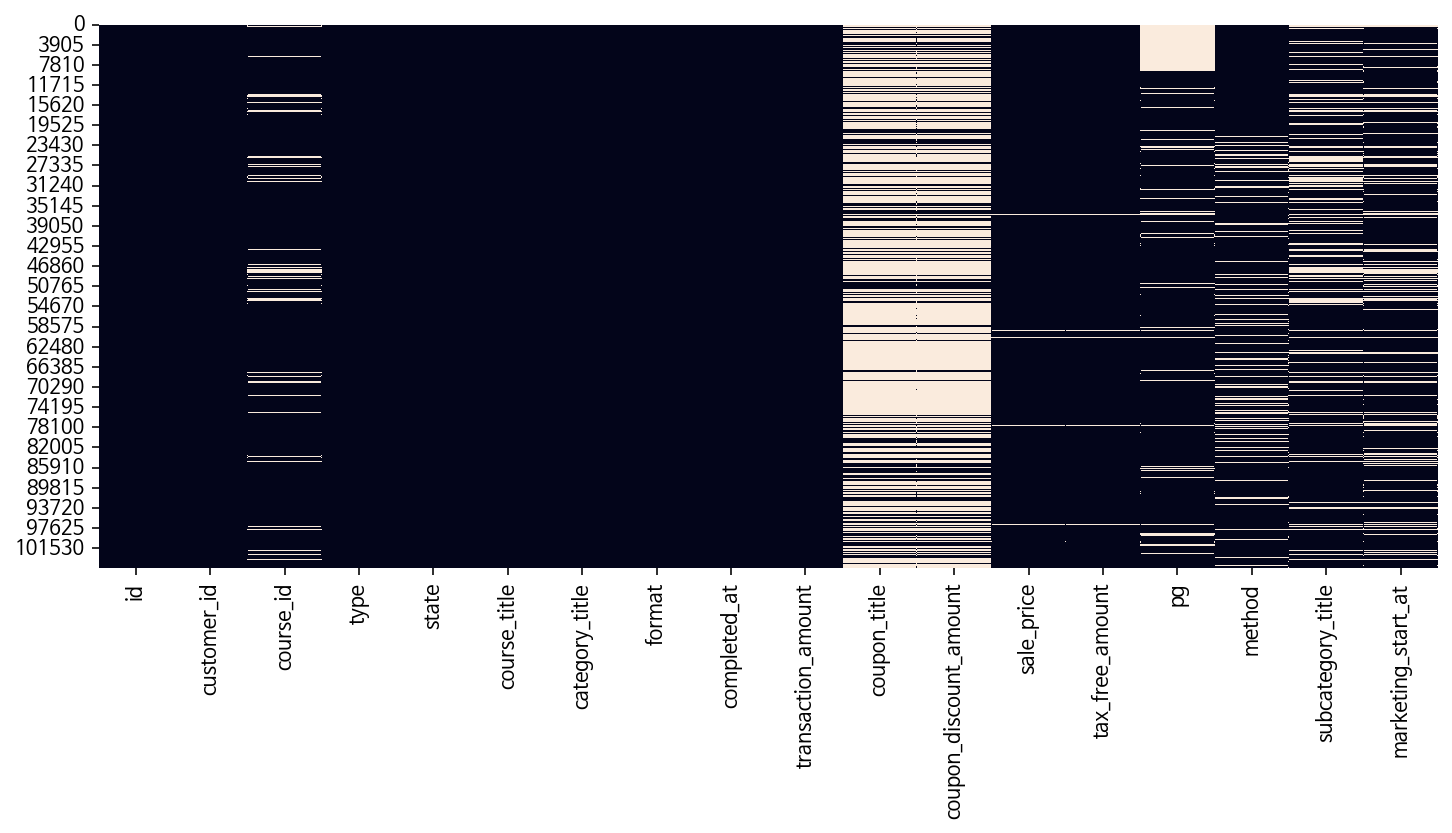

In [ ]:
# 시각 자료를 이용해 결측치 확인
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

확인 결과
- 컬럼별로 결측치가 많은 것을 확인할 수 있음
- 컬럼별로 결측치를 확인 진행

### customer_id

In [ ]:
# 결측치 검색
df[df['customer_id'].isnull()]

id  customer_id  course_id         type      state course_title  \
12133  1011200          NaN        NaN  TRANSACTION  COMPLETED          NaN   
36367  1066932          NaN        NaN  TRANSACTION  COMPLETED          NaN   
91500  1299115          NaN        NaN  TRANSACTION  COMPLETED          NaN   

      category_title format        completed_at  transaction_amount  \
12133            NaN    NaN 2021-04-12 11:40:00                   0   
36367            NaN    NaN 2021-05-17 16:12:00                   0   
91500            NaN    NaN 2021-08-20 20:05:00                   0   

      coupon_title  coupon_discount_amount  sale_price  tax_free_amount   pg  \
12133          NaN                     NaN         NaN              NaN  NaN   
36367          NaN                     NaN         NaN              NaN  NaN   
91500          NaN                     NaN         NaN              NaN  NaN   

             method subcategory_title marketing_start_at  
12133  B2B_CONTRACT               NaN                NaT  
36367  B2B_CONTRACT               NaN                NaT  
91500  B2B_CONTRACT               NaN                NaT

- customer_id 의 결측치는 대부분 NaN이므로 삭제

In [ ]:
df = df[df['customer_id'].isnull()==False] # 결측치 제거
df['customer_id'] = df['customer_id'].astype(int) # 정수형 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### course_id

In [ ]:
df[df['course_id'].isnull()].head()

id  customer_id  course_id     type      state  \
6   970614       477910        NaN    ORDER  CANCELLED   
12  970670       429291        NaN    ORDER  CANCELLED   
13  970672       429291        NaN    ORDER  CANCELLED   
16  970677       429291        NaN    ORDER  CANCELLED   
18  970682       478031        NaN  PAYMENT  COMPLETED   

                                       course_title category_title format  \
6   프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스)         크리에이티브    올인원   
12       프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스)          프로그래밍    올인원   
13       프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스)          프로그래밍    올인원   
16       프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스)          프로그래밍    올인원   
18            프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스)        데이터사이언스    올인원   

          completed_at  transaction_amount coupon_title  \
6  2021-03-28 15:22:36              299000          NaN   
12 2021-03-28 15:27:29              299000          NaN   
13 2021-03-28 15:30:05              299000          NaN   
16 2021-03-28 15:31:29              299000          NaN   
18 2021-03-28 15:33:28              299000          NaN   

    coupon_discount_amount  sale_price  tax_free_amount   pg method  \
6                      NaN    299000.0         299000.0  NaN   CARD   
12                     NaN    299000.0         299000.0  NaN   CARD   
13                     NaN    299000.0         299000.0  NaN   CARD   
16                     NaN    299000.0         299000.0  NaN   CARD   
18                     NaN    299000.0         299000.0  NaN   CARD   

   subcategory_title marketing_start_at  
6                NaN                NaT  
12               NaN                NaT  
13               NaN                NaT  
16               NaN                NaT  
18               NaN                NaT

- 강의와 관련된 값 빼고 다른 값들이 정상적으로 들어있음
- 강의가 삭제되면서 데이터가 지워진 것으로 추정
- 결측치를 채우거나 삭제할 필요 X

### course_title
- 결측치 및 테스트 데이터 제거

1. course_title 결측치 확인

In [ ]:
# 일부 값 빼고 전부 deleted
df[df['course_title'].isnull()]

id  customer_id  course_id     type      state course_title  \
9002    996843       490139        NaN  PAYMENT    DELETED          NaN   
9003    996793       490089        NaN  PAYMENT    DELETED          NaN   
9004    996842       490138        NaN  PAYMENT    DELETED          NaN   
9005    996851       490149        NaN  PAYMENT    DELETED          NaN   
12181  1006736       291328        NaN  PAYMENT    DELETED          NaN   
13754  1012747       498414        NaN  PAYMENT    DELETED          NaN   
31192  1063323       524510        NaN  PAYMENT    DELETED          NaN   
38944  1093777       539708        NaN  PAYMENT    DELETED          NaN   
40377  1093780       539709        NaN  PAYMENT    DELETED          NaN   
40378  1093784       539709        NaN  PAYMENT    DELETED          NaN   
47361  1117129       549990        NaN  PAYMENT  COMPLETED          NaN   
53960  1141801       560947        NaN  PAYMENT    DELETED          NaN   
56316  1155478       567600        NaN  PAYMENT    DELETED          NaN   

      category_title format        completed_at  transaction_amount  \
9002             NaN    NaN 2021-04-07 15:05:06              480000   
9003             NaN    NaN 2021-04-07 15:05:06              600000   
9004             NaN    NaN 2021-04-07 15:05:06              600000   
9005             NaN    NaN 2021-04-07 15:05:06              600000   
12181            NaN    NaN 2021-04-12 13:10:10              967000   
13754            NaN    NaN 2021-04-15 20:40:35              170000   
31192            NaN    NaN 2021-05-10 18:04:33               35000   
38944            NaN    NaN 2021-05-22 10:57:39              127500   
40377            NaN    NaN 2021-05-24 09:18:48              110000   
40378            NaN    NaN 2021-05-24 09:18:48              110000   
47361            NaN    NaN 2021-06-02 16:48:37            10500000   
53960            NaN    NaN 2021-06-13 19:13:41              172000   
56316            NaN    NaN 2021-06-18 01:38:26             1200000   

      coupon_title  coupon_discount_amount  sale_price  tax_free_amount   pg  \
9002           NaN                     NaN         NaN              NaN  NaN   
9003           NaN                     NaN         NaN              NaN  NaN   
9004           NaN                     NaN         NaN              NaN  NaN   
9005           NaN                     NaN         NaN              NaN  NaN   
12181          NaN                     NaN         NaN              NaN  NaN   
13754          NaN                     NaN         NaN              NaN  NaN   
31192          NaN                     NaN         NaN              NaN  NaN   
38944          NaN                     NaN         NaN              NaN  NaN   
40377          NaN                     NaN         NaN              NaN  NaN   
40378          NaN                     NaN         NaN              NaN  NaN   
47361          NaN                     NaN         NaN              NaN  NaN   
53960          NaN                     NaN         NaN              NaN  NaN   
56316          NaN                     NaN         NaN              NaN  NaN   

         method subcategory_title marketing_start_at  
9002   TRANSFER               NaN                NaT  
9003   TRANSFER               NaN                NaT  
9004   TRANSFER               NaN                NaT  
9005   TRANSFER               NaN                NaT  
12181  TRANSFER               NaN                NaT  
13754  TRANSFER               NaN                NaT  
31192  TRANSFER               NaN                NaT  
38944  TRANSFER               NaN                NaT  
40377  TRANSFER               NaN                NaT  
40378  TRANSFER               NaN                NaT  
47361  TRANSFER               NaN                NaT  
53960  TRANSFER               NaN                NaT  
56316    ONSITE               NaN                NaT

In [ ]:
# Payment-Completed 건이 있으나 문의 결과 제거해도 무관하다 하여 제거
df = df.dropna(subset=['course_title'])

2. "TEST", "테스트용" "검수용" 등은 실제 구매 데이터가 아님. 처리 필요

2-1. 테스트용, TEST, 샘플 제거

In [ ]:
# 해당 조건에 맞는 값 추출
t = df[df["course_title"].str.contains("TEST") | df["course_title"].str.contains("테스트용") | df['course_title'].str.contains("샘플")]
t

id  customer_id  course_id     type      state  \
20875  1034021        49600   205142.0  PAYMENT  COMPLETED   
20899  1034100       270040   205142.0  PAYMENT  COMPLETED   
20900  1034101       470930   205142.0  PAYMENT  COMPLETED   
20901  1034102        33271   205142.0  PAYMENT  COMPLETED   
20902  1034104       144798   205142.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
51406  1129889       496508        NaN    ORDER  CANCELLED   
51435  1129971       496508        NaN  PAYMENT  COMPLETED   
51782  1131318       496508        NaN   REFUND  COMPLETED   
56001  1146954       496508        NaN    ORDER  CANCELLED   
56137  1147445       496508        NaN    ORDER  CANCELLED   

                                            course_title category_title  \
20875              스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용          프로그래밍   
20899              스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용          프로그래밍   
20900              스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용          프로그래밍   
20901              스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용          프로그래밍   
20902              스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용          프로그래밍   
...                                                  ...            ...   
51406  (테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...        데이터사이언스   
51435  (테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...        데이터사이언스   
51782  (테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...        데이터사이언스   
56001  (테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...        데이터사이언스   
56137  (테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...        데이터사이언스   

       format        completed_at  transaction_amount coupon_title  \
20875  스쿨 온라인 2021-04-27 19:03:10                   0          NaN   
20899  스쿨 온라인 2021-04-27 19:50:54                   0          NaN   
20900  스쿨 온라인 2021-04-27 19:50:57                   0          NaN   
20901  스쿨 온라인 2021-04-27 19:51:05                   0          NaN   
20902  스쿨 온라인 2021-04-27 19:51:24                   0          NaN   
...       ...                 ...                 ...          ...   
51406     올인원 2021-06-09 15:51:44              990000          NaN   
51435     올인원 2021-06-09 16:32:25              990000          NaN   
51782     올인원 2021-06-10 11:20:35             -990000          NaN   
56001     올인원 2021-06-17 13:50:43              990000          NaN   
56137     올인원 2021-06-17 17:20:09              990000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount     pg     method  \
20875                     NaN         1.0              1.0    NaN  PROMOTION   
20899                     NaN         1.0              1.0    NaN  PROMOTION   
20900                     NaN         1.0              1.0    NaN  PROMOTION   
20901                     NaN         1.0              1.0    NaN  PROMOTION   
20902                     NaN         1.0              1.0    NaN  PROMOTION   
...                       ...         ...              ...    ...        ...   
51406                     NaN    990000.0         176000.0  NAVER        NaN   
51435                     NaN    990000.0         176000.0  NAVER       CARD   
51782                     NaN    990000.0         176000.0  NAVER       CARD   
56001                     NaN    990000.0         176000.0  NAVER        NaN   
56137                     NaN    990000.0         176000.0  NAVER        NaN   

      subcategory_title marketing_start_at  
20875               NaN                NaT  
20899               NaN                NaT  
20900               NaN                NaT  
20901               NaN                NaT  
20902               NaN                NaT  
...                 ...                ...  
51406               NaN                NaT  
51435               NaN                NaT  
51782               NaN                NaT  
56001               NaN                NaT  
56137               NaN                NaT  

[252 rows x 18 columns]

In [ ]:
# 추려낸 이상치 값 전부 drop
df = df.drop(list(t.index))

2-2. 'A/B테스트', '코딩테스트' 제외한 '테스트' 항목 추가 제거
- 'A/B테스트', '코딩테스트'가 포함된 course_title의 경우, 실제 강의명 (테스트용이 아님)
- 해당 강의들을 제외하고 나머지 '테스트'가 포함된 row 제거

In [ ]:
# 해당 단어가 포함된 course_id 검색
df[df["course_title"].str.contains("테스트")]["course_title"].unique()

array(['초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트',
       '올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기',
       '프로모션 : 2+2 코딩테스트 결과를 바꾸는 전공생 코딩 PASS (6월 프리패스)',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트', '(B2B) 경남대학교_코딩 테스트 대비반',
       '프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 BEST PASS (7월 프리패스)',
       '(초격차변경)프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 BEST PASS (7월 프리패스)',
       '프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 iPad 패키지 (7월 현물 프리패스)',
       'The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민'], dtype=object)

In [ ]:
# 해당 강의의 transaction_amount 0원, sale_price는 1원이라 이상치라 판단, drop
df[df["course_title"].str.contains("네카라쿠배 프론트엔드 취업완성 스쿨")]

id  customer_id  course_id     type      state  \
30770  1062130       523886   205237.0  PAYMENT  COMPLETED   
30783  1062160        84972   205237.0  PAYMENT  COMPLETED   
30814  1062222       513608   205237.0  PAYMENT  COMPLETED   
30822  1062238       438870   205237.0  PAYMENT  COMPLETED   
30824  1062248       523942   205237.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
54402  1141156       546174   205715.0  PAYMENT  COMPLETED   
54447  1141335        67113   205715.0  PAYMENT  COMPLETED   
54491  1141485       523266   205715.0  PAYMENT  COMPLETED   
54611  1141900       560997   205237.0  PAYMENT  COMPLETED   
54755  1142513       524458   205237.0  PAYMENT  COMPLETED   

                        course_title category_title format  \
30770  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
30783  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
30814  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
30822  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
30824  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
...                              ...            ...    ...   
54402  네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍     스쿨   
54447  네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍     스쿨   
54491  네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍     스쿨   
54611  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   
54755  네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍     스쿨   

             completed_at  transaction_amount coupon_title  \
30770 2021-05-10 10:58:57                   0          NaN   
30783 2021-05-10 11:11:21                   0          NaN   
30814 2021-05-10 11:39:56                   0          NaN   
30822 2021-05-10 11:50:03                   0          NaN   
30824 2021-05-10 11:55:30                   0          NaN   
...                   ...                 ...          ...   
54402 2021-06-14 12:34:02                   0          NaN   
54447 2021-06-14 14:25:11                   0          NaN   
54491 2021-06-14 15:46:16                   0          NaN   
54611 2021-06-14 19:25:34                   0          NaN   
54755 2021-06-15 00:11:03                   0          NaN   

       coupon_discount_amount  sale_price  tax_free_amount   pg     method  \
30770                     NaN         1.0              1.0  NaN  PROMOTION   
30783                     NaN         1.0              1.0  NaN  PROMOTION   
30814                     NaN         1.0              1.0  NaN  PROMOTION   
30822                     NaN         1.0              1.0  NaN  PROMOTION   
30824                     NaN         1.0              1.0  NaN  PROMOTION   
...                       ...         ...              ...  ...        ...   
54402                     NaN         1.0              1.0  NaN  PROMOTION   
54447                     NaN         1.0              1.0  NaN  PROMOTION   
54491                     NaN         1.0              1.0  NaN  PROMOTION   
54611                     NaN         1.0              1.0  NaN  PROMOTION   
54755                     NaN         1.0              1.0  NaN  PROMOTION   

      subcategory_title marketing_start_at  
30770               NaN         2019-04-19  
30783               NaN         2019-04-19  
30814               NaN         2019-04-19  
30822               NaN         2019-04-19  
30824               NaN         2019-04-19  
...                 ...                ...  
54402               NaN         2021-02-08  
54447               NaN         2021-02-08  
54491               NaN         2021-02-08  
54611               NaN         2019-04-19  
54755               NaN         2019-04-19  

[947 rows x 18 columns]

In [ ]:
# 해당 강의들을 제외한 '테스트' 포함된 row 추려내기
t = df[~(df["course_title"].str.contains("A/B테스트"))&~(df["course_title"].str.contains("A/B 테스트"))&~(df["course_title"].str.contains("코딩 테스트"))&~(df["course_title"].str.contains("코딩테스트"))&df["course_title"].str.contains("테스트")]

In [ ]:
# 추려낸 이상치 drop
df = df.drop(list(t.index))

### category_title

- category_title의 경우, null 값이 존재하나 값을 유추할 수 있는 row들이 존재
- 해당 값들은 따로 전처리
- 이 값들을 제외하고 drop

In [ ]:
df[df['category_title'].isnull()]

id  customer_id  course_id     type      state  \
41878   1078156        62566        NaN   REFUND  COMPLETED   
72639   1212937       591404        NaN  PAYMENT  COMPLETED   
74973   1223470       598011        NaN    ORDER  CANCELLED   
74975   1223480       598011        NaN  PAYMENT  COMPLETED   
74980   1223479       598011        NaN    ORDER  COMPLETED   
104056  1356347       561379        NaN  PAYMENT  CANCELLED   
104318  1358067       617692        NaN  PAYMENT  CANCELLED   
105189  1363817        83845        NaN  PAYMENT  CANCELLED   

                                             course_title category_title  \
41878                                   프로모션 : 자유이용권 (3월)            NaN   
72639   프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   
74973   프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   
74975   프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   
74980   프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   
104056                  프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스)            NaN   
104318                  프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스)            NaN   
105189                  프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스)            NaN   

       format        completed_at  transaction_amount coupon_title  \
41878     온라인 2021-05-26 22:06:00             -199000          NaN   
72639     올인원 2021-07-12 23:38:42              990000          NaN   
74973     올인원 2021-07-18 12:26:46              990000          NaN   
74975     올인원 2021-07-18 12:31:01              990000          NaN   
74980     올인원 2021-07-18 12:40:08              990000          NaN   
104056    올인원 2021-09-20 18:15:02             1800000          NaN   
104318    올인원 2021-09-22 00:57:03             1800000          NaN   
105189    올인원 2021-09-24 15:36:27             1800000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg    method  \
41878                      NaN    199000.0         199000.0     NaN  TRANSFER   
72639                      NaN    990000.0         272800.0  INICIS      CARD   
74973                      NaN    990000.0         272800.0  INICIS      CARD   
74975                      NaN    990000.0         272800.0  INICIS      CARD   
74980                      NaN    990000.0         272800.0  INICIS      CARD   
104056                     NaN   1800000.0         295200.0  INICIS      CARD   
104318                     NaN   1800000.0         295200.0   NAVER       NaN   
105189                     NaN   1800000.0         295200.0  INICIS      CARD   

       subcategory_title marketing_start_at  
41878                NaN                NaT  
72639                NaN                NaT  
74973                NaN                NaT  
74975                NaN                NaT  
74980                NaN                NaT  
104056               NaN                NaT  
104318               NaN                NaT  
105189               NaN                NaT

- customer_id = 62556 case
- course_title에 '자유이용권'이 포함되는 경우는 해당 row가 유일하며, 카테고리 분류가 애매하므로 해당 row는 drop.

- customer_id = 591404, 598011 case
- category_title 값 외에 다른 값들은 존재
- course_title에 '데이터사이언티스트' 란 단어가 포함되어 있음
- category_title을 '데이터사이언스'로 변경

In [ ]:
# 인덱스(72639, 74945) 으로 접근
df.loc[72639, "category_title"] = "데이터사이언스"
df.loc[74975, "category_title"] = "데이터사이언스"

- 이 외의 값들은 유추가 어렵거나 불가능, 실제 거래도 X
- 불필요한 값이므로 drop

In [ ]:
df = df.dropna(subset=["category_title"])

'데이터 사이언스' 공백 문자 제거 필요

In [ ]:
def func(x):
    return x.replace(" ", "")

df['category_title'] = df['category_title'].apply(func)

In [ ]:
df['category_title'].value_counts() # .nunique()

프로그래밍      33238
데이터사이언스    14082
업무생산성      13323
디자인        12009
영상/3D      10260
마케팅         9857
부동산/금융      5523
투자/재테크      2501
크리에이티브      2250
교육          1031
지식콘텐츠         56
비즈니스          42
파이낸스          25
일러스트           1
Name: category_title, dtype: int64

### subcategory_title

In [ ]:
df[df['subcategory_title'].isnull()].head()

id  customer_id  course_id     type      state  \
2   970657        72297   204246.0  PAYMENT  COMPLETED   
3   970656        72297   204246.0    ORDER  CANCELLED   
6   970614       477910        NaN    ORDER  CANCELLED   
10  970671       469860   203644.0  PAYMENT  COMPLETED   
11  970668       469860   203644.0    ORDER  CANCELLED   

                                       course_title category_title  format  \
2                              시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인   
3                              시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인   
6   프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스)         크리에이티브     올인원   
10   올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)         부동산/금융     올인원   
11   올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)         부동산/금융     올인원   

          completed_at  transaction_amount           coupon_title  \
2  2021-03-28 15:21:43              171810  [10% 할인] 시크릿코드 실무 완성편   
3  2021-03-28 15:21:43              171810                    NaN   
6  2021-03-28 15:22:36              299000                    NaN   
10 2021-03-28 15:27:17              263000                    NaN   
11 2021-03-28 15:27:17              263000                    NaN   

    coupon_discount_amount  sale_price  tax_free_amount   pg method  \
2                  19090.0    190900.0         190900.0  NaN   CARD   
3                      NaN    190900.0         190900.0  NaN   CARD   
6                      NaN    299000.0         299000.0  NaN   CARD   
10                     NaN    263000.0         263000.0  NaN   CARD   
11                     NaN    263000.0         263000.0  NaN   CARD   

   subcategory_title marketing_start_at  
2                NaN         2021-03-04  
3                NaN         2021-03-04  
6                NaN                NaT  
10               NaN         2020-11-27  
11               NaN         2020-11-27

- 서브카테고리가 null일 경우, 상위 카테고리로 대체 가능
- 결측치 상위 카테고리로 대체

In [ ]:
df.loc[df['subcategory_title'].isnull(),"subcategory_title"] = df.loc[df['subcategory_title'].isnull(),"category_title"]

### PAYMENT, REFUND (타겟 변수)

In [ ]:
df['purchased'] = (df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')

- payment-completed인 값 purchased column에 추가 (bool)

In [ ]:
pt = df[(df['type']=='PAYMENT')&(df['state']=='COMPLETED')] # 구매 데이터
rt = df[(df['type']=='REFUND')&(df['state']=='COMPLETED')] # 환불 데이터

- 환불 데이터는 구매 데이터에 포함됨

In [ ]:
paid = list(zip(pt['customer_id'].astype(float), pt['course_id'].astype(float)))
ref = list(zip(rt['customer_id'].astype(float), rt['course_id'].astype(float), rt['id']))

- 전처리를 위한 필요 컬럼데이터 추출

In [ ]:
# 중요!
# [customer_id],[course_id]가 일치하는 값 = 환불 후 재구매하지 않은 케이스
# 이 외의 다른 케이스는 쿠폰 등을 사용하여 재결제 했을 가능성 있음 -> 순수 환불이 아님
# 'payment-completed'와 'refund-completed'의 [customer_id],[course_id] 비교
# 결과 값을 real_ref에 담아둔다 

real_ref = []
for i in range(len(paid)):
  for j in range(len(ref)):
    if paid[i][0] == ref[j][0] and paid[i][1] == ref[j][1]:
      real_ref.append(ref[j])
      ref.remove(ref[j])
      break

In [ ]:
print(len(paid),len(real_ref),len(ref))

51707 1927 1893


- 총 결제 수 / 순수 환불 건수 / order-refund pair, 재구매, 기업강의환불 등 기타 이유

payment-completed 의 refund-completed (순수 환불) 환불데이터만  따로 분리

In [ ]:
# real_refund (순수 환불 건수) Data 확인
t = np.array(real_ref)
rt = rt[rt['id'].isin(t[:,2])]
rt

id  customer_id  course_id    type      state  \
759      972662       271507   204246.0  REFUND  COMPLETED   
1165     973680       498409   203782.0  REFUND  COMPLETED   
1170     973686       462160   203328.0  REFUND  COMPLETED   
1198     973764       474332   203720.0  REFUND  COMPLETED   
1367     974226       475655   204037.0  REFUND  COMPLETED   
...         ...          ...        ...     ...        ...   
105133  1363558       656066   205761.0  REFUND  COMPLETED   
105139  1363576       648937   204013.0  REFUND  COMPLETED   
105168  1363704       670215   204670.0  REFUND  COMPLETED   
105245  1364149       604077   205569.0  REFUND  COMPLETED   
105248  1364217       552100   203525.0  REFUND  COMPLETED   

                                  course_title category_title   format  \
759                       시크릿코드 : 프론트엔드 실무 완성편          프로그래밍   스쿨 온라인   
1165                   초격차 패키지 : 한번에 끝내는 모션그래픽          영상/3D      올인원   
1170               올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인      올인원   
1198               초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍      올인원   
1367                매주)서비스 기획서 완성 온라인 완주반 2101         크리에이티브  온라인 완주반   
...                                        ...            ...      ...   
105133              초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅      올인원   
105139                 올인원 패키지 : 완전정복 시각디자인 기초            디자인      올인원   
105168  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅      RED   
105245           올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무          업무생산성      올인원   
105248  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍      올인원   

              completed_at  transaction_amount coupon_title  \
759    2021-03-29 10:28:46             -171810          NaN   
1165   2021-03-29 14:39:49             -139000          NaN   
1170   2021-03-29 14:41:27              -77600          NaN   
1198   2021-03-29 14:58:53             -111000          NaN   
1367   2021-03-29 17:23:15             -367000          NaN   
...                    ...                 ...          ...   
105133 2021-09-24 13:33:08             -213000          NaN   
105139 2021-09-24 13:43:57              -72000          NaN   
105168 2021-09-24 14:32:43             -171000          NaN   
105245 2021-09-24 17:09:30             -109000          NaN   
105248 2021-09-24 17:33:53             -108186          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
759                        NaN    190900.0         190900.0     NaN   CARD   
1165                       NaN    139000.0         139000.0     NaN   CARD   
1170                       NaN     87600.0          87600.0     NaN   CARD   
1198                       NaN    111000.0         111000.0     NaN   CARD   
1367                       NaN    417000.0         417000.0     NaN   CARD   
...                        ...         ...              ...     ...    ...   
105133                     NaN    233000.0         233000.0  INICIS   CARD   
105139                     NaN    174000.0         174000.0   NAVER   CARD   
105168                     NaN    171000.0         171000.0   NAVER  TRANS   
105245                     NaN    129000.0         129000.0   KAKAO  POINT   
105248                     NaN    114000.0         114000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  purchased  
759                프로그래밍 2021-03-04 00:00:00      False  
1165               모션그래픽 2021-01-22 00:00:00      False  
1170                디자인툴 2020-10-23 00:00:00      False  
1198            프론트엔드 개발 2021-02-02 00:00:00      False  
1367              크리에이티브 2021-01-14 00:00:00      False  
...                  ...                 ...        ...  
105133            디지털마케팅 2021-08-17 00:00:00      False  
105139             시각디자인 2021-03-16 00:00:00      False  
105168         글쓰기/카피라이팅 2021-06-18 17:00:00      False  
105245            엑셀/VBA 2021-08-17 00:00:00      False  
105248            백엔드 개발 2021-02-01 00:00:00   

In [ ]:
51707-1927

49780

payment-completed 테이블에서 이와 짝이 맞는 refund 값을 빼주면 49816이 나와야 한다

In [ ]:
for i in range(len(df)):
  a = float(df.iloc[i,1]) # = customer_id
  b = float(df.iloc[i,2]) # = course_id
  if df.iloc[i,18] == True: # = purchased = True인 값
    for j in range(len(real_ref)): # 값 비교
      if real_ref[j][0] == a and real_ref[j][1] == b: # 환불 리스트에 해당 customer_id, course_id 있을 경우
          df.iloc[i,18] = False # True에서 False로 변경
          real_ref.remove(real_ref[j]) # 중복 방지를 위해 해당 값 삭제
          break

* purchased = True 값 중 환불이 이뤄진 경우 -> 최종적으로 구매한 값 X
* 데이터 내 purchased = True인 값 중 real_ref와 값이 겹칠 경우 False로 바꿈

In [ ]:
df['purchased'].value_counts()

False    54418
True     49780
Name: purchased, dtype: int64

- 성공적으로 줄어든 모습 확인

In [ ]:
# 순 구매 건 확인
pt = df[df['purchased'] == True]
pt

id  customer_id  course_id     type      state  \
2        970657        72297   204246.0  PAYMENT  COMPLETED   
4        970658       478028   201797.0  PAYMENT  COMPLETED   
8        970669       478033   203178.0  PAYMENT  COMPLETED   
10       970671       469860   203644.0  PAYMENT  COMPLETED   
18       970682       478031        NaN  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105411  1364969       669238   204286.0  PAYMENT  COMPLETED   
105412  1364976       384003   203178.0  PAYMENT  COMPLETED   
105413  1364991       670891   203935.0  PAYMENT  COMPLETED   
105416  1364996       640697   205365.0  PAYMENT  COMPLETED   
105418  1365007       610626   206720.0  PAYMENT  COMPLETED   

                                          course_title category_title  format  \
2                                 시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인   
4                        올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX          업무생산성     올인원   
8                          초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원   
10      올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)         부동산/금융     올인원   
18               프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스)        데이터사이언스     올인원   
...                                                ...            ...     ...   
105411                      초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인     올인원   
105412                     초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원   
105413                     초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍     올인원   
105416                 초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기          영상/3D     올인원   
105418                              용호수의 돈 버는 실전 영상 제작          영상/3D     올인원   

              completed_at  transaction_amount               coupon_title  \
2      2021-03-28 15:21:43              171810      [10% 할인] 시크릿코드 실무 완성편   
4      2021-03-28 15:21:54               97500   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
8      2021-03-28 15:26:47               96000   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
10     2021-03-28 15:27:17              263000                        NaN   
18     2021-03-28 15:33:28              299000                        NaN   
...                    ...                 ...                        ...   
105411 2021-09-25 13:39:26              212000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
105412 2021-09-25 13:46:29              149000                        NaN   
105413 2021-09-25 14:01:26              159000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
105416 2021-09-25 14:17:41               96000  [WELCOME] 온라인 강의 2만원 할인쿠폰   
105418 2021-09-25 14:25:47              139000  [WELCOME] 온라인 강의 3만원 할인쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
2                      19090.0    190900.0         190900.0     NaN   CARD   
4                      20000.0    117500.0         117500.0     NaN   CARD   
8                      20000.0    116000.0         116000.0     NaN   CARD   
10                         NaN    263000.0         263000.0     NaN   CARD   
18                         NaN    299000.0         299000.0     NaN   CARD   
...                        ...         ...              ...     ...    ...   
105411                 20000.0    232000.0         232000.0  INICIS   CARD   
105412                     NaN    149000.0         149000.0   KAKAO   CARD   
105413                 20000.0    179000.0         179000.0  INICIS   CARD   
105416                 20000.0    116000.0         116000.0  INICIS  VBANK   
105418                 30000.0    169000.0         169000.0   NAVER  POINT   

       subcategory_title marketing_start_at  purchased  
2                  프로그래밍         2021-03-04       True  
4                PPT/보고서         2019-11-14       True  
8                  영상 편집         2020-12-02       True  
10                부동산/금융         2020-11-27       True  
18               데이터사이언스                NaT       True  
...                  ...                ...        ...  
105411              디자

### price
- 일반적으로 강의를 결제할 경우 tax_free_amount와 sale price 가격이 동일하나, 일부 강의의 경우 서로 가격이 다른 경우가 있음
- 세전 금액과 sale_price가 다른경우(예시 : 현물프리패스 등) 실수익은 세전금액이라고 예측 가능
- 'revenue'란 컬럼 생성하여 쿠폰이 없는 경우에는 tax_free_amount, 있는 경우에는 transaction_amount 로 대체하여 실제 거래 가격을 넣어줌
- 쿠폰을 사용한 경우와 사용하지 않은 경우를 나누고, 사은품을 끼워서 판매한 강의도 나눔
- 사은품을 끼워 판 강의는 판매가격과 실제 수익이 다름

In [ ]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49780 entries, 2 to 105418
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      49780 non-null  int64         
 1   customer_id             49780 non-null  int64         
 2   course_id               47802 non-null  float64       
 3   type                    49780 non-null  object        
 4   state                   49780 non-null  object        
 5   course_title            49780 non-null  object        
 6   category_title          49780 non-null  object        
 7   format                  49780 non-null  object        
 8   completed_at            49780 non-null  datetime64[ns]
 9   transaction_amount      49780 non-null  int64         
 10  coupon_title            22928 non-null  object        
 11  coupon_discount_amount  22928 non-null  float64       
 12  sale_price              48715 non-null  float

In [ ]:
# taxfreeamount와 saleprice 가 다른 강좌들은 모두 쿠폰이 없음
pt[(pt["sale_price"]!= pt["tax_free_amount"]) & (~pt["coupon_title"].isnull())]

id  customer_id  course_id     type      state  \
90776   1294906       636868   207018.0  PAYMENT  COMPLETED   
91173   1297293       576889   207018.0  PAYMENT  COMPLETED   
91235   1297690       551722   207018.0  PAYMENT  COMPLETED   
91340   1298260       465057   207018.0  PAYMENT  COMPLETED   
91450   1298849        43421   207018.0  PAYMENT  COMPLETED   
91648   1299763       567768   207018.0  PAYMENT  COMPLETED   
91657   1299787       145454   207018.0  PAYMENT  COMPLETED   
91773   1300260       558182   207018.0  PAYMENT  COMPLETED   
92616   1303890       559793   207018.0  PAYMENT  COMPLETED   
92914   1305377       577873   207018.0  PAYMENT  COMPLETED   
93821   1309984       565650   207018.0  PAYMENT  COMPLETED   
97387   1325302       578212   207018.0  PAYMENT  COMPLETED   
98272   1329809       153064   207018.0  PAYMENT  COMPLETED   
100876  1340025       520784   207018.0  PAYMENT  COMPLETED   

                                       course_title category_title format  \
90776   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91173   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91235   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91340   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91450   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91648   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91657   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
91773   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
92616   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
92914   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
93821   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
97387   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
98272   K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   
100876  K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)          프로그래밍    B2G   

              completed_at  transaction_amount  \
90776  2021-08-18 17:06:15                   0   
91173  2021-08-19 21:18:31                   0   
91235  2021-08-20 00:58:38                   0   
91340  2021-08-20 13:31:48                   0   
91450  2021-08-20 17:38:33                   0   
91648  2021-08-21 12:55:36                   0   
91657  2021-08-21 13:31:01                   0   
91773  2021-08-21 21:25:46                   0   
92616  2021-08-24 09:41:40                   0   
92914  2021-08-25 00:03:00                   0   
93821  2021-08-27 14:07:05                   0   
97387  2021-09-02 16:19:00                   0   
98272  2021-09-06 09:13:55                   0   
100876 2021-09-10 16:52:27                   0   

                                      coupon_title  coupon_discount_amount  \
90776   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91173   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91235   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91340   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91450   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91648   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91657   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
91773   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
92616   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
92914   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
93821   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
97387   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
98272   K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                300000.0   
100876  K-Digital Credit 빅데이터분석 첫걸음 시작하기_1기(평생소장용)                30

In [ ]:
# sale_pric와 tax_free_amount가 다른 경우
pt[(pt["sale_price"]!= pt["tax_free_amount"])]["course_title"].value_counts()

데이터 사이언스 취업완성 스쿨 17기                               79
스프링 아카데미아                                          36
K-Digital Credit 빅데이터 분석 첫걸음 시작하기_1기(평생소장용)        14
프로모션 : 개발자를 위한 코딩 만능 백과사전 iPad 패키지 (7월 현물 프리패스)     8
프로모션 : 아이패드 200%활용 드로잉 만랩 iPad 패키지 (7월 현물 프리패스)     8
                                                   ..
(B2B) 노스글로벌 온라인 구독 올 플랜 - 비대면바우처                    1
(B2B) 일모작 온라인 구독 올 플랜 - 비대면바우처                      1
(B2B) (주)창소프트아이앤아이 온라인 구독 올 플랜 - 비대면바우처             1
(B2B) 주식회사 폴몬 온라인 구독 올 플랜 - 비대면바우처                  1
(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처                    1
Name: course_title, Length: 985, dtype: int64

In [ ]:
# 현물 프리패스
pt[(pt["course_title"].str.contains("현물"))]["course_title"].value_counts()

프로모션 : 아이패드 200%활용 드로잉 만랩 iPad 패키지 (7월 현물 프리패스)                   8
프로모션 : 개발자를 위한 코딩 만능 백과사전 iPad 패키지 (7월 현물 프리패스)                   8
프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                               7
프로모션 : 나를 위한  데이터사이언스 백과사전  iPad 패키지 (7월 현물 프리패스)                 6
프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)                                  4
프로모션 : 영상 퀄리티를 높이는  전문가 편집스킬 iPad 패키지 (7월 현물 프리패스)                4
프로모션 : 직장인 필수 스킬 맥북 pro 패스(9월 현물 프리패스)                            3
프로모션 : 초봉을 바꾸는 주니어를 위한 개발 iPad 패키지 (7월 현물 프리패스)                   3
프로모션 : 유튜버 따라잡고 실버버튼 받는 영상 iPad 패키지 (7월 현물 프리패스)                  3
프로모션 : 트렌드 완벽정복! 일잘러 마케터  iPad 패키지 (7월 현물 프리패스)                   3
프로모션 : 기초부터 다지는 데이터분석 iPad 패키지 (7월 현물 프리패스)                       3
프로모션 : 풀스택 개발자 맥북 air 패스(9월 현물 프리패스)                              3
프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스)                               3
프로모션 : 콘텐츠 디자이너를 위한 커리어 백과사전 iPad 패키지 (7월 현물 프리패스)                2
프로모션 : 풀스택 마케터를 위한 마케팅 iPad 패키지 (7월 현물 프리패스)    

In [ ]:
# 타겟변수 다시 정제
pt["revenue"] = pt["coupon_title"].isnull() * pt["tax_free_amount"] + ~pt["coupon_title"].isnull() *pt["transaction_amount"]
# revenue가 null값인 경우 transaction amount 로 값 변경(쿠폰은 없지만 tax_free_amount가 null인경우.. 주로 b2b)
pt.loc[pt["revenue"].isnull(),"revenue"] = pt.loc[pt["revenue"].isnull(),"transaction_amount"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# 수익과 구매 횟수별 pivot table
t = pt.groupby("customer_id").agg({"revenue": "sum","id":'count'}).sort_values(by=["id","revenue"], ascending=False)
t

revenue  id
customer_id               
98685        7040750.0  53
427973             0.0  47
158374             0.0  42
50769        4979110.0  39
3189               0.0  39
...                ...  ..
658695             0.0   1
659634             0.0   1
659805             0.0   1
665031             0.0   1
666156             0.0   1

[37601 rows x 2 columns]

### coupon_title
- course_title과 마찬가지로, 테스트 값 존재
- 해당 값들 선별 후 drop

#### 테스트

In [ ]:
t = pt[~pt["coupon_title"].isnull()]
t1 = t[t['coupon_title'].str.contains("검수용")] # 검수용
t2 = t[t['coupon_title'].str.contains("테스트") | t['coupon_title'].str.contains("TEST")] # 테스트

- coupon_title에 "검수용"이 포함된 경우 drop

In [ ]:
pt = pt.drop(list(t1.index))

- coupon_title에 "테스트","TEST"가 포함된 경우


- '테스트'가 포함된 값들 중에 테스트용이 아닌 값들 존재
- 해당 값들 제외하고 drop

In [ ]:
t2['coupon_title'].unique()

array(['[무료수강권] CRM팀 테스트용_김경진 개인계정 (이메일 인증 안 된 계정)', '[내부직원] 테스트용 결제 쿠폰',
       '테스트쿠폰', 'TEST이제너두_직장인을 위한 파이썬 데이터 분석', 'TEST',
       '[무료수강권] 초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님', '호준 테스트',
       '이웅모 강사님 강의 준비용 쿠폰 발급_초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       '[테스트쿠폰] 네이버 페이 간편결제 테스트용 쿠폰', '테스트_전지현', '[CX] 관리자 외 계정 테스트용',
       '테스트', '[cs팀] 테스트 결제 위한 쿠폰 발급',
       '[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 신규 강의 할인'],
      dtype=object)

- '30%쿠폰~', '초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님' 
- 두 케이스는 실제 강의 이므로 해당 강의들 제외하고 Drop

In [ ]:
t3 = t2.loc[~t2['coupon_title'].str.startswith("[30%쿠폰]")]
t3 = t3.drop(33173) # 이준희 강사

In [ ]:
pt = pt.drop(list(t3.index))

#### 내부자용 쿠폰제거
- 최종 결제 가격이 0원인 거래들 다수 발견
- 정상 거래가 아니라 판단되어 해당 조건으로 검색 결과 쿠폰명에 일반 쿠폰과 다른 이름들 발견
- 해당 거래들 조회하여 제거

In [ ]:
df[df["transaction_amount"]==0]["coupon_title"].unique()

array(['한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)',
       '수강생 50만명 돌파 기념 감사제 쿠폰', '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰',
       '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권', '[무료수강권] 강의 검수용_이호상 PM님',
       '패캐머_온라인 쿠폰 !',
       '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경',
       '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰', 'crm 검수용 쿠폰 aop',
       '[럭키룰렛] 올인원패키지', '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님', '신해동 발행 쿠폰',
       '[무료수강권] 강사님 제공용 RED', '[무료수강권] 강사님 제공용', '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰',
       '[무료수강권] 내부직원 강의 검수용',
       '[무료수강권] 권오상 회계사의 자금조달 분석 및 가치평가_23기 신동현 수강생님', nan,
       '[무료수강권] 완주반 후기 리워드', 'Vue.js 압축 완성 강의',
       '[무료수강권] CRM팀 테스트용_김경진 개인계정 (이메일 인증 안 된 계정)',
       '이지웰 쿠폰_직장인 필수 스킬 3종 세트 MAX', '올인원 패키지 보상 쿠폰 1', '올인원 패키지 보상 쿠폰 2',
       '[무료수강권] 파이썬 웹 개발 올인원 패키지_조성준 강사님', '[폐강 보상] 온라인 완주반 100% 할인 쿠폰',
       '[무료수강권] 권오상 회계사의 금융 아카데미 - 재무제표 기초',
       '[무료수강권] 머신러닝과 데이터 분석 A to Z', '패캐머_온라인 쿠폰',
       '서포터즈 1기 리워드 (유니

- "패캐머"

In [ ]:
t = pt[~pt["coupon_title"].isnull()]
t_del = t[t['coupon_title'].str.contains("패캐머")]
t_del["coupon_title"].unique()

array(['패캐머_온라인 쿠폰 !', '패캐머_온라인 쿠폰', '패캐머_온라인 쿠폰! (CRM팀)'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "제공용"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("제공")]
t_del["coupon_title"].unique()

array(['[무료수강권] 강사님 제공용 RED', '[무료수강권] 강사님 제공용', '[무료수강권] 강사님 지인 제공용',
       '[무료수강권] 강사님 제공용_올인원 패키지', '글담X패스트캠퍼스 무료수강권 제공 이벤트 쿠폰',
       '[무료수강권] 강사님 제공 무료 수강권', '[무료수강권] 강사님 제공용_The RED 김민태',
       '[무료수강권] 강의 제공용 발행', '[무료 수강권] 강사제공용 쿠폰',
       '[무료수강권] 강사님 제공용_The RED', '[무료수강권] 외주업체 제공용',
       '[무료수강권] 강사 소속법인 임직원 제공', '[무료수강권] 강사님 제공용_AWS로DevOps'],
      dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "샘플"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("샘플")]
t_del["coupon_title"].unique()

array(['샘플'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "내부"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("내부")]
t_del["coupon_title"].unique()

array(['[무료수강권] 내부직원용', '[무료수강권] 내부 직원용_김준홍님',
       '[무료수강권] 내부직원용_AOP_허지은 PD님', '[무료수강권] 내부직원용_AOP_김인지 PD님',
       '[무료수강권] 내부직원용_RED_성정화 PD님', '[무료수강권] 내부직원용_RED_허지은 PD님',
       '[무료수강권] 내부직원용_RED_김인지 PD님', '[무료수강권] 내부직원용_AOP_성정화 PD님'],
      dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "참고용"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("참고용")]
t_del["coupon_title"].unique()

array(['강의 제작 참고용 (강사님)', '[무료수강권] 강의 참고용 발행_강사님', '강의 제작 참고용',
       'RED 이동주님 강의 참고용 쿠폰', '강의 참고용 쿠폰 : 최현우님', 'RED 강의 참고용 쿠폰',
       '[무료수강권] 강의 참고용 발행_양세열 강사님', 'RED 강연 참고용 쿠폰 (김상우님)',
       '[무료수강권] 강의 참고용 발행_다회권', '[무료수강권] 강의 참고용 발행_안성훈 강사님'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "신해동 (대표이사)"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("신해동")]
t_del["coupon_title"].unique()

array(['신해동 발행 쿠폰', '신해동 쿠폰', '특별 할인 쿠폰(신해동)', '신해동 발행 쿠폰 (~21. 08. 31)',
       '신해동 100% 할인 쿠폰'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("예외")]
t_del["coupon_title"].unique()

array(['[예외처리]연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "업무용"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("업무용")]
t_del["coupon_title"].unique()

array(['업무용'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "매니저"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("매니저")]
t_del["coupon_title"].unique()

array(['[무료수강권] 올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰_장혜리 매니저님'],
      dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "PD"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("PD")]
t_del["coupon_title"].unique()

array(['[무료수강권] AOP 수강권_이동근 PD님'], dtype=object)

In [ ]:
pt = pt.drop(list(t_del.index))

- "강사님"

In [ ]:
t = pt[(~pt["coupon_title"].isnull())&(pt["transaction_amount"]==0)]
t_del = t[t['coupon_title'].str.contains("강사님")]
t_del["coupon_title"].unique()

array(['[무료수강권] 파이썬 웹 개발 올인원 패키지_조성준 강사님',
       '[무료수강권] 한번에 끝내는 UX/UI 디자인 초격차_김수윤 강사님',
       '[무료수강권] 데이터 기반 마케팅_박선민 강사님', '[무료수강권] 엑셀언니의 사무실용 엑셀뿌수기_황인영 강사님',
       '[무료수강권] 기업가치평가와 M&A 전략 실무_황인영 강사님',
       '[무료수강권] 마디아의 UX/UI 포트폴리오_마디아(이승훈) 강사님',
       '[무료수강권] 파이썬 웹 개발 올인원 패키지_이은찬 강사님',
       '[무료수강권] 모두를 위한 SQL/DB 올인원 패키지_박원빈 강사님',
       '[무료수강권] 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰_진정민 강사님',
       '[무료수강권] 한 번에 끝내는 데이터 분석 툴 초격차 패키지_김유석 강사님',
       '[무료수강권] 모두를 위한 SQL/DB 올인원 패키지_김유석 강사님',
       '[무료수강권] 시각디자인 기초_이진우, 최세진 강사님',
       '[무료수강권] 모델 성능 개선으로 익히는 강화 학습_김성제 강사님',
       '[무료수강권] 김민태의 프론트 아카데미 제 1강_박은종 강사님',
       '[무료수강권] 초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님',
       '[무료수강권] 초격차 패키지: 한 번에 끝내는 디자인 툴_이우철 강사님',
       '[무료수강권] 완전정복! 시각디자인 기초_박부미 강사님',
       '이웅모 강사님 강의 준비용 쿠폰 발급_올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential',
       '이웅모 강사님 강의 준비용 쿠폰 발급_초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍',
       '[무료수강권] 초격차 패키지: 30개 프로젝트로 배우는 Android 앱 개발 wit

In [ ]:
pt = pt.drop(list(t_del.index))

### format

- B2B, B2G의 경우 개인 구매가 아니기 때문에 구매 횟수와 금액에 대하여 개인과 다른 양상을 보임.
- 스쿨, 캠프, 온라인 완주반은 패스트캠퍼스 내부 프로그램으로, 개별 강의와 다르므로 분리
- 따로 분석할 필요가 있음

- format == 'B2B','B2G' 따로 추출

In [ ]:
# format의 경우 null값이 없음 -> 곧바로 전처리
pt.isnull().sum()

id                            0
customer_id                   0
course_id                  1978
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              26852
coupon_discount_amount    26852
sale_price                 1065
tax_free_amount            1065
pg                         7916
method                        0
subcategory_title             0
marketing_start_at         8773
purchased                     0
revenue                       0
dtype: int64

In [ ]:
# b2b 테이블 추출
df_b2b = pt[pt['format'].str.contains("B2B")]
df_b2b

id  customer_id  course_id     type      state  \
631      972364       478743   204039.0  PAYMENT  COMPLETED   
633      972365       478745   203352.0  PAYMENT  COMPLETED   
1035     973331       479082   204387.0  PAYMENT  COMPLETED   
1046     973363       474327   204387.0  PAYMENT  COMPLETED   
1135     973592       479185   204387.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
104831  1361297       669386   207667.0  PAYMENT  COMPLETED   
104832  1361312       669400   207555.0  PAYMENT  COMPLETED   
104905  1367252       672301   207714.0  PAYMENT  COMPLETED   
105163  1367258       672307   207731.0  PAYMENT  COMPLETED   
105265  1367259       672308   207742.0  PAYMENT  COMPLETED   

                                 course_title category_title   format  \
631           (B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사             교육  B2B 온라인   
633     (B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사             교육  B2B 온라인   
1035                  (B2B) 현대백화점 온라인 구독 올 플랜             교육  B2B 온라인   
1046                  (B2B) 현대백화점 온라인 구독 올 플랜             교육  B2B 온라인   
1135                  (B2B) 현대백화점 온라인 구독 올 플랜             교육  B2B 온라인   
...                                       ...            ...      ...   
104831      (B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
104832       (B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
104905   (B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
105163       (B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
105265       (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   

              completed_at  transaction_amount coupon_title  \
631    2021-03-29 08:52:36              100000          NaN   
633    2021-03-29 08:57:12              750000          NaN   
1035   2021-03-29 13:01:32              600000          NaN   
1046   2021-03-29 13:08:38              600000          NaN   
1135   2021-03-29 14:13:27              600000          NaN   
...                    ...                 ...          ...   
104831 2021-09-23 15:04:56              390000          NaN   
104832 2021-09-23 15:04:56             1200000          NaN   
104905 2021-09-23 17:33:18             2000000          NaN   
105163 2021-09-24 14:26:08              600000          NaN   
105265 2021-09-24 18:17:10              600000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount   pg    method  \
631                        NaN         NaN              NaN  NaN  TRANSFER   
633                        NaN         NaN              NaN  NaN  TRANSFER   
1035                       NaN    600000.0         600000.0  NaN      CARD   
1046                       NaN    600000.0         600000.0  NaN      CARD   
1135                       NaN    600000.0         600000.0  NaN      CARD   
...                        ...         ...              ...  ...       ...   
104831                     NaN         NaN              NaN  NaN  TRANSFER   
104832                     NaN         NaN              NaN  NaN  TRANSFER   
104905                     NaN         NaN              NaN  NaN    ONSITE   
105163                     NaN         NaN              NaN  NaN    ONSITE   
105265                     NaN         NaN              NaN  NaN    ONSITE   

       subcategory_title marketing_start_at  purchased    revenue  
631                   교육                NaT       True   100000.0  
633                   교육                NaT       True   750000.0  
1035                  교육                NaT       True   600000.0  
1046                  교육                NaT       True   600000.0  
1135                  교육                NaT       True   600000.0  
...                  ...                ...        ...        ...  
104831                교육                NaT       True   390000.0  
104832                교육                NaT       True  1200000.0  
104905                교육                NaT       True  2000000.0  
10516

In [ ]:
# b2g 테이블 추출
df_b2g = pt[pt['format'].str.contains("B2G")]
df_b2g

id  customer_id  course_id     type      state  \
76521   1228790       467567   205419.0  PAYMENT  COMPLETED   
84609   1267969       623766   206746.0  PAYMENT  COMPLETED   
84732   1268687       622246   206847.0  PAYMENT  COMPLETED   
84819   1269278        33540   206847.0  PAYMENT  COMPLETED   
84944   1270030       625050   206847.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105215  1363994       670297   207651.0  PAYMENT  COMPLETED   
105255  1364240       277200   207654.0  PAYMENT  COMPLETED   
105330  1364604       668910   207652.0  PAYMENT  COMPLETED   
105392  1364863       666665   207652.0  PAYMENT  COMPLETED   
105405  1364925       670842   207654.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
76521     (B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기          프로그래밍   
84609            (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기          프로그래밍   
84732          (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기          프로그래밍   
84819          (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기          프로그래밍   
84944          (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기          프로그래밍   
...                                                   ...            ...   
105215         (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기          프로그래밍   
105255  (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   
105330       (B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기          프로그래밍   
105392       (B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기          프로그래밍   
105405  (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   

       format        completed_at  transaction_amount coupon_title  \
76521     B2G 2021-07-20 12:32:15              859290          NaN   
84609     B2G 2021-08-06 07:36:20               20000          NaN   
84732     B2G 2021-08-06 15:01:04               30000          NaN   
84819     B2G 2021-08-06 19:35:52               30000          NaN   
84944     B2G 2021-08-07 13:12:13               30000          NaN   
...       ...                 ...                 ...          ...   
105215    B2G 2021-09-24 16:29:55               30000          NaN   
105255    B2G 2021-09-24 17:48:08               40000          NaN   
105330    B2G 2021-09-24 23:39:18               30000          NaN   
105392    B2G 2021-09-25 11:21:54               30000          NaN   
105405    B2G 2021-09-25 12:24:09               40000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
76521                      NaN    859290.0         859290.0  INICIS   CARD   
84609                      NaN     20000.0          20000.0   KAKAO   CARD   
84732                      NaN     30000.0          30000.0  INICIS   CARD   
84819                      NaN     30000.0          30000.0  INICIS   CARD   
84944                      NaN     30000.0          30000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
105215                     NaN     30000.0          30000.0  INICIS   CARD   
105255                     NaN     40000.0          40000.0  INICIS   CARD   
105330                     NaN     30000.0          30000.0   KAKAO   CARD   
105392                     NaN     30000.0          30000.0  INICIS   CARD   
105405                     NaN     40000.0          40000.0  INICIS   CARD   

       subcategory_title marketing_start_at  purchased   revenue  
76521              프로그래밍                NaT       True  859290.0  
84609              프로그래밍                NaT       True   20000.0  
84732              프로그래밍                NaT       True   30000.0  
84819              프로그래밍                NaT       True   30000.0  
84944              프로그래밍                NaT       True   30000.0  
...                  ...                ...        ...       ...  
105215             프로그래밍                NaT       True   30000.0  
105255             프로그래밍     

In [ ]:
# 온라인 완주반 테이블 추출
df_finish = pt[pt['format'].str.contains("온라인 완주반")]
df_finish

id  customer_id  course_id     type      state  \
37      970726       148541   204264.0  PAYMENT  COMPLETED   
56      970787       478105   204264.0  PAYMENT  COMPLETED   
99      970962       120463   204266.0  PAYMENT  COMPLETED   
180     971203       478276   204266.0  PAYMENT  COMPLETED   
183     971210       278861   204082.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
57750  1153647       286143   205414.0  PAYMENT  COMPLETED   
57797  1153766       566216   203996.0  PAYMENT  COMPLETED   
57811  1153798       566742   205414.0  PAYMENT  COMPLETED   
57904  1154013       554621   205090.0  PAYMENT  COMPLETED   
57949  1154116       472874   205204.0  PAYMENT  COMPLETED   

                       course_title category_title   format  \
37        데이터분석 프로젝트+자격증 온라인 완주반 3기        데이터사이언스  온라인 완주반   
56        데이터분석 프로젝트+자격증 온라인 완주반 3기        데이터사이언스  온라인 완주반   
99       컴퓨터 공학 전공자 따라잡기 온라인 완주반 3기          프로그래밍  온라인 완주반   
180      컴퓨터 공학 전공자 따라잡기 온라인 완주반 3기          프로그래밍  온라인 완주반   
183      밑바닥부터 배포까지 클론코딩 온라인 완주반 1기          프로그래밍  온라인 완주반   
...                             ...            ...      ...   
57750  매주)SQL 100제 + 자격증 완성 온라인 완주반        데이터사이언스  온라인 완주반   
57797            매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반   
57811  매주)SQL 100제 + 자격증 완성 온라인 완주반        데이터사이언스  온라인 완주반   
57904   매주) 컴퓨터 공학 전공자 따라잡기 온라인 완주반          프로그래밍  온라인 완주반   
57949    매주)서비스 기획서 완성 온라인 완주반 2105         크리에이티브  온라인 완주반   

             completed_at  transaction_amount  \
37    2021-03-28 16:11:35              340000   
56    2021-03-28 16:51:29              290000   
99    2021-03-28 18:20:07              400000   
180   2021-03-28 20:13:07              350000   
183   2021-03-28 20:16:52              410000   
...                   ...                 ...   
57750 2021-06-20 22:12:16              320000   
57797 2021-06-20 22:36:43              595000   
57811 2021-06-20 22:42:58              320000   
57904 2021-06-20 23:18:57              390000   
57949 2021-06-20 23:33:04              355000   

                                 coupon_title  coupon_discount_amount  \
37                                        NaN                     NaN   
56                   [웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰                 50000.0   
99                                        NaN                     NaN   
180                  [웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰                 50000.0   
183                                [럭키룰렛] 완주반                 50000.0   
...                                       ...                     ...   
57750                                     NaN                     NaN   
57797                                     NaN                     NaN   
57811                                     NaN                     NaN   
57904                                     NaN                     NaN   
57949  [50,000원] 딱 3일만! 특별 할인 쿠폰 드려요! (~6/20)                 50000.0   

       sale_price  tax_free_amount      pg method subcategory_title  \
37       340000.0         340000.0     NaN   CARD           데이터사이언스   
56       340000.0         340000.0     NaN   CARD           데이터사이언스   
99       400000.0         400000.0     NaN   CARD             프로그래밍   
180      400000.0         400000.0     NaN   CARD             프로그래밍   
183      460000.0         460000.0     NaN   CARD             프로그래밍   
...           ...              ...     ...    ...               ...   
57750    320000.0         320000.0   KAKAO   CARD           데이터사이언스   
57797    595000.0         595000.0  INICIS   CARD               마케팅   
57811    320000.0         320000.0  INICIS   CARD           데이터사이언스   
57904    390000.0         390000.0  INICIS   CARD             프로그래밍   
57949    405000.0         405000.0   KAKAO  POINT            크리에이티브   

      marketing_start_at  purchased   revenue  
37            2021-03-08       True  340000.0  
56            2021-03-08       True  290000.0  
99            2021-01-12       True  400000.0  

In [ ]:
# 캠프 테이블 추출
df_camp = pt[pt['format'].str.contains("캠프")]
df_camp

id  customer_id  course_id     type      state  \
2622     977693        99366   204262.0  PAYMENT  COMPLETED   
8986     996553       224423   204149.0  PAYMENT  COMPLETED   
37817   1083711       448344   204149.0  PAYMENT  COMPLETED   
79802   1242775       570092   206415.0  PAYMENT  COMPLETED   
81606   1251629        11576   206415.0  PAYMENT  COMPLETED   
82433   1255884        16697   206415.0  PAYMENT  COMPLETED   
82971   1257601        61727   206415.0  PAYMENT  COMPLETED   
83731   1256814       509993   206415.0  PAYMENT  COMPLETED   
85439   1272544         6855   206415.0  PAYMENT  COMPLETED   
87580   1281525        89024   206415.0  PAYMENT  COMPLETED   
92774   1304642        53748   206415.0  PAYMENT  COMPLETED   
93557   1308441        43623   206415.0  PAYMENT  COMPLETED   
93758   1309550        25149   206415.0  PAYMENT  COMPLETED   
97077   1323772       277943   206415.0  PAYMENT  COMPLETED   
99801   1335530        42009   206415.0  PAYMENT  COMPLETED   
100891  1340102        29094   206415.0  PAYMENT  COMPLETED   
103172  1350583       663984   207532.0  PAYMENT  COMPLETED   

                              course_title category_title format  \
2622               권오상 회계사의 자금조달 분석 및 가치평가         부동산/금융     캠프   
8986    부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기         부동산/금융     캠프   
37817   부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기         부동산/금융     캠프   
79802     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
81606     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
82433     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
82971     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
83731     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
85439     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
87580     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
92774     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
93557     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
93758     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
97077     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
99801     Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
100891    Apache Spark을 이용한 빅데이터 분석 입문 15기        데이터사이언스     캠프   
103172        OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기          프로그래밍     캠프   

              completed_at  transaction_amount  \
2622   2021-03-30 17:52:03                   0   
8986   2021-04-07 15:03:42             1040000   
37817  2021-05-20 10:33:19               14000   
79802  2021-07-26 11:27:39             1296000   
81606  2021-07-30 10:57:06             1296000   
82433  2021-07-31 14:46:48             1296000   
82971  2021-07-31 23:06:15             1296000   
83731  2021-08-03 09:37:29             1296000   
85439  2021-08-09 09:07:56             1440000   
87580  2021-08-12 18:01:08             1440000   
92774  2021-08-24 16:29:08             1530000   
93557  2021-08-26 18:07:27              830000   
93758  2021-08-27 11:09:18             1000000   
97077  2021-09-01 15:32:22             1620000   
99801  2021-09-08 11:07:51             1710000   
100891 2021-09-10 17:22:33             1800000   
103172 2021-09-16 21:24:37             1350000   

                                         coupon_title  coupon_discount_amount  \
2622     [무료수강권] 권오상 회계사의 자금조달 분석 및 가치평가_23기 신동현 수강생님                800000.0   
8986                                              NaN                     NaN   
37817                                             NaN                     NaN   
79802    [추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기                144000.0   
81606    [추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기                144000.0   
82433    [추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기                144000.0   
82971    [추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기                144000.0   
83731    [추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기                144000.0   
85439                  

In [ ]:
# 스쿨 테이블 추출
df_school = pt[pt['format'].str.contains("스쿨")]
df_school


id  customer_id  course_id     type      state  \
2       970657        72297   204246.0  PAYMENT  COMPLETED   
203     971265       175430   204246.0  PAYMENT  COMPLETED   
293     971482       473334   204246.0  PAYMENT  COMPLETED   
312     971527       478402   204246.0  PAYMENT  COMPLETED   
345     971586        32709   204246.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
93869  1323525       390361   203870.0  PAYMENT  COMPLETED   
93870  1323537        98171   203870.0  PAYMENT  COMPLETED   
93871  1323556       289148   203870.0  PAYMENT  COMPLETED   
93872  1323534       409454   203870.0  PAYMENT  COMPLETED   
93873  1323524        66516   203870.0  PAYMENT  COMPLETED   

               course_title category_title  format        completed_at  \
2      시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
203    시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 20:39:29   
293    시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 21:40:24   
312    시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 21:57:31   
345    시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 22:13:11   
...                     ...            ...     ...                 ...   
93869  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스      스쿨 2021-08-27 15:17:38   
93870  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스      스쿨 2021-08-27 15:17:38   
93871  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스      스쿨 2021-08-27 15:17:38   
93872  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스      스쿨 2021-08-27 15:17:38   
93873  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스      스쿨 2021-08-27 15:17:38   

       transaction_amount           coupon_title  coupon_discount_amount  \
2                  171810  [10% 할인] 시크릿코드 실무 완성편                 19090.0   
203                190900                    NaN                     NaN   
293                190900                    NaN                     NaN   
312                190900                    NaN                     NaN   
345                190900                    NaN                     NaN   
...                   ...                    ...                     ...   
93869               69211                    NaN                     NaN   
93870               13835                    NaN                     NaN   
93871               27669                    NaN                     NaN   
93872               19764                    NaN                     NaN   
93873              131832                    NaN                     NaN   

       sale_price  tax_free_amount   pg  method subcategory_title  \
2        190900.0         190900.0  NaN    CARD             프로그래밍   
203      190900.0         190900.0  NaN    CARD             프로그래밍   
293      190900.0         190900.0  NaN    CARD             프로그래밍   
312      190900.0         190900.0  NaN    CARD             프로그래밍   
345      190900.0         190900.0  NaN    CARD             프로그래밍   
...           ...              ...  ...     ...               ...   
93869         NaN              NaN  NaN  ONSITE           데이터사이언스   
93870         NaN              NaN  NaN  ONSITE           데이터사이언스   
93871         NaN              NaN  NaN  ONSITE           데이터사이언스   
93872         NaN              NaN  NaN  ONSITE           데이터사이언스   
93873         NaN              NaN  NaN  ONSITE           데이터사이언스   

      marketing_start_at  purchased   revenue  
2             2021-03-04       True  171810.0  
203           2021-03-04       True  190900.0  
293           2021-03-04       True  190900.0  
312           2021-03-04       True  190900.0  
345           2021-03-04       True  190900.0  
...                  ...        ...       ...  
93869         2020-12-23       True   69211.0  
93870         2020-12-23       True   13835.0  
93871         2020-12-23       True   27669.0  
93872         2020-12-23       True   19764.0  
93873         2020-12-23       True  131832.0  

[415 rows x 20 columns]

In [ ]:
pt = pt.drop(list(df_b2b.index))
pt = pt.drop(list(df_b2g.index))
pt = pt.drop(list(df_finish.index))
pt = pt.drop(list(df_camp.index))
pt = pt.drop(list(df_school.index))

- B2B, B2G, 패스트캠퍼스 내부 프로그램 (완주반, 캠프, 스쿨) 따로 추출
- pt 테이블에서 drop

### 전처리 결과
- 각 컬럼 별로 존재하는 결측치 제거 완료
- Payment-Completed 값을 통해 순구매를 나타내는 타겟 변수 'purchased' 생성 완료
- 실제 수익을 도출하여 'revenue' column을 생성
- 'purchased' column과 다른 column 간의 상관관계 분석
- 'revenue' 등을 이용해 VIP 고객에 대한 insight 창출

## 비교분석

### 타겟변수 분석

- 컴럼별, 각각 어떤 값들이 가장 구매율이 높은 지 확인

**순 구매율**
- 약 17.3%가 강의를 환불했음.

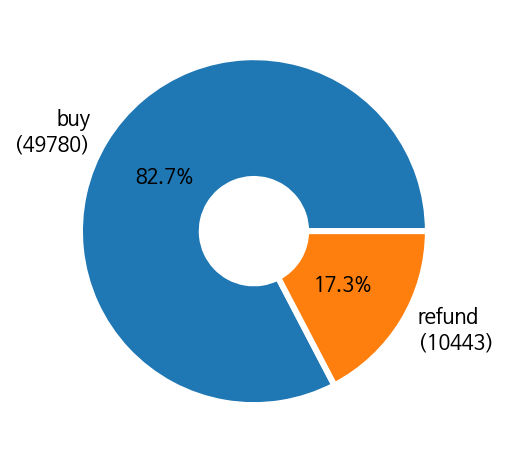

In [ ]:
# 순 구매율
p1 = len(df[df['type']=='PAYMENT']) # 총 판매량
p2 = len(df[df['purchased']==True]) # 순 구매량
a = [p2, p1-p2] #순 구매량, 환불량
labels = ['buy'+f'\n({p2})','refund'+f'\n({p1-p2})']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(a, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()

**TOP 20**
- 상위 20개 강의가 전체 강의의 30%나 차지하는 것을 알 수 있다.

In [ ]:
ctt111 = pt[['course_title','category_title']].value_counts().head(20)

In [ ]:
# 가장 많이 구매한 강의 top 20
ctt = pt[['course_title','category_title']].value_counts().head(20)
ctt_lst = []
for i in range(20):
  ctt_lst.append(pt['course_title'].value_counts(normalize=True)[i]*100)

In [ ]:
ctt = pd.DataFrame(pt[['course_title','category_title']].value_counts().head(20))
ctt['percent'] = ctt_lst
ctt

0  \
course_title                                       category_title         
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                        프로그래밍           1363   
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터             프로그래밍           1357   
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                        영상/3D           1177   
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법             마케팅             1017   
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                 프로그래밍            783   
나의 칼퇴치트키 엑셀유치원                                     업무생산성            772   
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                    디자인              648   
초격차 패키지 : 한 번에 끝내는 엑셀 실무                           업무생산성            641   
초격차 패키지 : 한번에 끝내는 디자인 툴                            디자인              636   
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T... 프로그래밍            616   
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                        데이터사이언스          597   
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                        디자인              591   
초격차 패키지 : 일잘러 필수 스킬 모음.zip                         업무생산성            590   
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin   프로그래밍            583   
올인원 패키지 : 완전정복 시각디자인 기초                            디자인              581   
초격차 패키지 : 한번에 끝내는 모션그래픽                            영상/3D            544   
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                       업무생산성            543   
입만 열면 인정받는 스피치 10분컷                                업무생산성            530   
올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기                    마케팅              527   
올인원 패키지 : 디지털 마케팅 MAX 2020                         마케팅              515   

                                                                    percent  
course_title                                       category_title            
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                        프로그래밍           2.966203  
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터             프로그래밍           2.953146  
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                        영상/3D           2.561424  
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법             마케팅             2.213227  
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                 프로그래밍           1.703989  
나의 칼퇴치트키 엑셀유치원                                     업무생산성           1.680050  
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                    디자인             1.410198  
초격차 패키지 : 한 번에 끝내는 엑셀 실무                           업무생산성           1.394964  
초격차 패키지 : 한번에 끝내는 디자인 툴                            디자인             1.384083  
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T... 프로그래밍           1.340558  
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                        데이터사이언스         1.299210  
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                        디자인             1.286153  
초격차 패키지 : 일잘러 필수 스킬 모음.zip                         업무생산성           1.283976  
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin   프로그래밍           1.268743  
올인원 패키지 : 완전정복 시각디자인 기초                            디자인             1.264390  
초격차 패키지 : 한번에 끝내는 모션그래픽                            영상/3D           1.183870  
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                       업무생산성           1.181694  
입만 열면 인정받는 스피치 10분컷                                업무생산성           1.157755  
올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기                    마케팅             1.146874  
올인원 패키지 : 디지털 마케팅 MAX 2020                         마케팅             1.120759

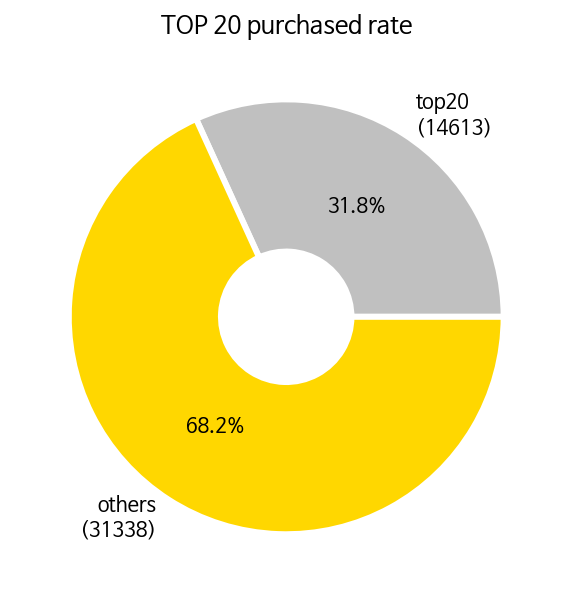

In [ ]:
# 상위 20개 강의의 구매 비율 (총 강의 개수 추가해야함)


p1 = sum(pt['course_title'].value_counts()[0:20]) # 상위 20개 구매량
p2 = sum(pt['course_title'].value_counts()[:]) # 전체 구매

a = [p1, p2-p1]
labels = ['top20'+f'\n({p1})','others'+f'\n({p2-p1})']
colors = ['silver', 'gold']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
plt.figure(figsize=(5,5))
plt.pie(a, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.title('TOP 20 purchased rate')
plt.show()

**카테고리별 분석**
- 프로그래밍이 가장 큰 비중을 차지하고 있다.
- 상위 3개 카테고리 (프로그래밍, 데이터사이언스, 업무생산성)이 전체 구매 강의의 50% 이상 차지

In [ ]:
pt['category_title'].value_counts()

프로그래밍      14182
업무생산성       6255
데이터사이언스     6178
디자인         5397
영상/3D       4898
마케팅         4325
부동산/금융      2707
투자/재테크      1401
크리에이티브       549
지식콘텐츠         23
비즈니스          20
파이낸스          16
Name: category_title, dtype: int64

In [ ]:
pt['category_title'].value_counts().index.tolist()

['프로그래밍',
 '업무생산성',
 '데이터사이언스',
 '디자인',
 '영상/3D',
 '마케팅',
 '부동산/금융',
 '투자/재테크',
 '크리에이티브',
 '지식콘텐츠',
 '비즈니스',
 '파이낸스']

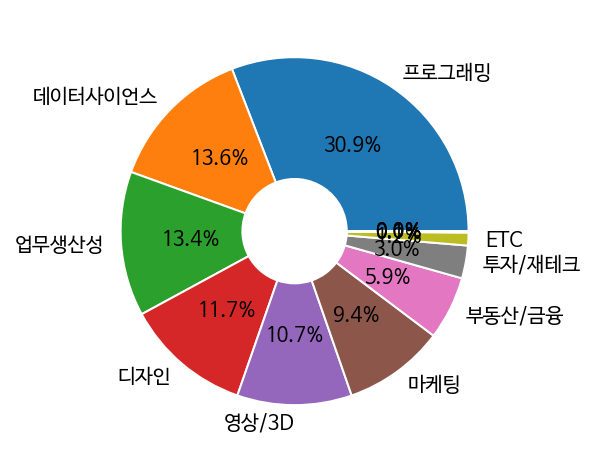

In [ ]:
# 카테고리 별 구매율
b = pt['category_title'].value_counts()

labels = ['프로그래밍','데이터사이언스','업무생산성','디자인',
 '영상/3D', '마케팅', '부동산/금융', '투자/재테크', 'ETC','','',''] 
# 가독성 문제로 '크리에이티브','지식콘텐츠','비즈니스','파이낸스' -> ETC로 대체
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.pie(b, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()

### VIP

**VIP 선정 기준** 
- 구매량이 많은 순으로 선정하려 했으나, 강의를 1,2개만 구매했는데 100만원 이상 구매한 고객도 있고, 반대의 경우도 있었음
- 'revenue' 값이 40만원 이상일 경우, 약 1561개의 값이 나오고, 전체 구매자 수의 4.46% 가량이므로 vip의 기준으로 선정

In [ ]:
# id 당 구매수
t = pt.groupby("customer_id").agg({"revenue": "sum","id":'count'}).sort_values(by=["id","revenue"], ascending=False)
t

revenue  id
customer_id               
98685        7040750.0  53
50769        4805950.0  38
40783        4424095.0  34
65665        2958900.0  27
20784        3445050.0  26
...                ...  ..
648707             0.0   1
651365             0.0   1
653145             0.0   1
653319             0.0   1
665031             0.0   1

[34972 rows x 2 columns]

In [ ]:
# 상위 5% 도출
t["revenue"].sort_values(ascending=False)[:len(t)//20]

customer_id
98685     7040750.0
50769     4805950.0
40783     4424095.0
20784     3445050.0
72501     3235150.0
            ...    
617276     376600.0
637854     376500.0
279648     376200.0
484480     376000.0
483393     376000.0
Name: revenue, Length: 1748, dtype: float64

- 실제 수익에서 상위 5퍼센트의 마지막 value를 찾고, 범위 설정

In [ ]:
# 40만원 이상 구매자 확인
t2 = t[(t["revenue"]>=400000)].sort_values(by=["revenue", "id"], ascending=False)
t2

revenue  id
customer_id               
98685        7040750.0  53
50769        4805950.0  38
40783        4424095.0  34
20784        3445050.0  26
72501        3235150.0  20
...                ...  ..
661840        401000.0   2
526317        400500.0   4
644372        400500.0   3
457708        400200.0   4
71588         400000.0   2

[1561 rows x 2 columns]

- 40만원을 기준으로 나누었을 때, 전체 고객 중 vip 고객의 비율이 4.46%

In [ ]:
print(f"상위 {round((len(t2)/len(t))*100, 2)}%")

상위 4.46%


In [ ]:
# 조건을 만족하는 값들 모아 'vip' column 생성
t3 = t[(t["revenue"]>=400000)].sort_values(by=["revenue", "id"], ascending=False)

def func(x):
    if x in t3.index:
        return True
    else:
        return False

pt['vip'] = pt["customer_id"].apply(func)

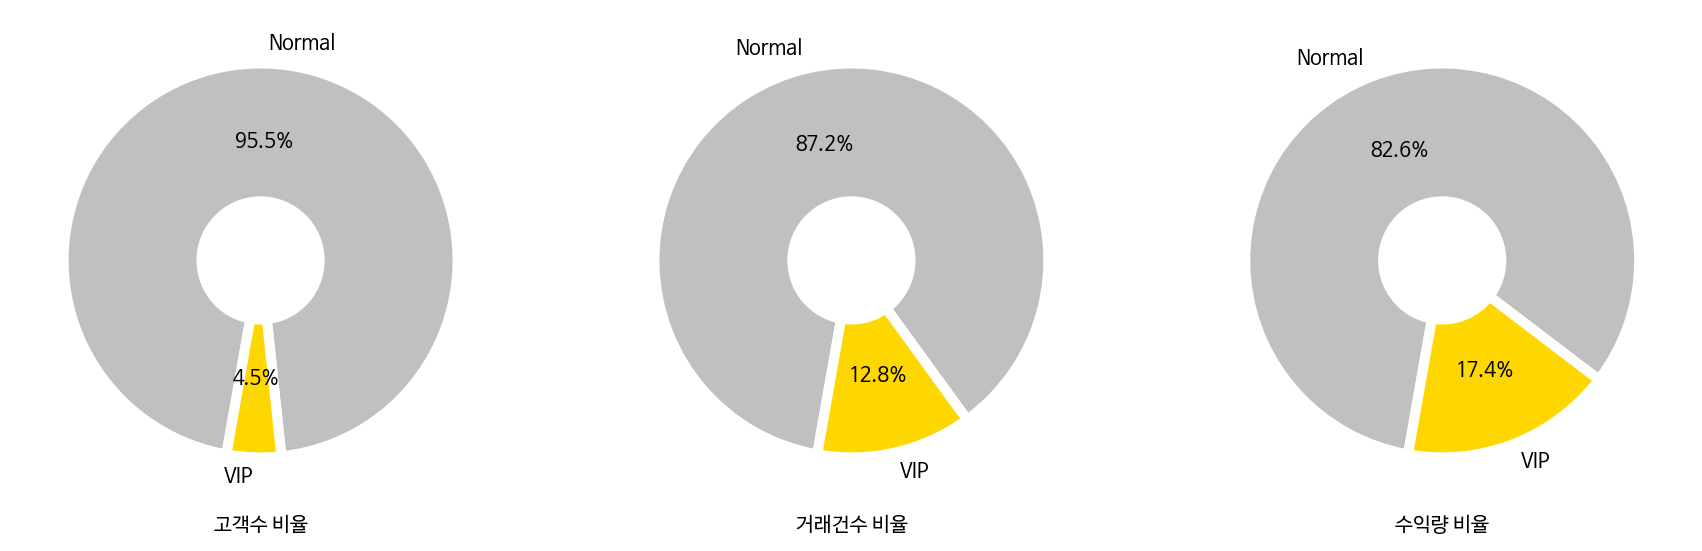

In [ ]:
# VIP 특징

t4 = pt.groupby("vip").agg({"id": "count", "revenue": "sum"})

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.pie([len(t)-len(t2), len(t2)], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("고객수 비율")

plt.subplot(1,3,2)
plt.pie(t4['id'], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("거래건수 비율")

plt.subplot(1,3,3)
plt.pie(t4['revenue'], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("수익량 비율")

plt.show()

- vip 고객이 일반 고객보다 수익이 약 5배정도 많음
- 일반 고객이 전체 수익의 82.6%, VIP는 17.4% 차지

# 판매 전략

1. 일반 고객을 vip로 만드는 전략 (순빈, 진규)
2. 일반 고객을 늘리는 전략 (지훈, 현규)
3. 기타 고객 (B2B,B2G) 늘리는 전략 (치현)

## 일반 고객 VIP로 만들기 (1)

### 목적
- vip와 normal 고객 사이의 특징을 찾고 vip고객을 더 유치시킬 수 있는 방법 찾기
- vip normal 고객이 구입한 강의들의 특징을 찾아보자 (카테고리,쿠폰 사용, 구매 시간(날짜) 등)


**사전 예상**
* **카테고리**: 차이가 없을 것으로 예상. -> 특정 카테고리가 vip고객에게 인기있다면 vip고객 유치 전략에 활용 가능

* **쿠폰 사용** : vip고객이 쿠폰을 강의 구매에 더 사용했을 것으로 예상 -> vip고객에게 높은 쿠폰 사용율이 확인되면 vip고객 확보를 위한 마케팅 목적으로 활용 가능 

* **구매시간대** : 차이가 없을 것으로 예상. -> vip고객들이 특정 날짜 or 시간대에 강의를 구매했을 경우 특정 날짜or시간에 따른 마케팅 가능 <br>※실제 데이터 차이가 있다고 해도 신뢰할 수 있는 데이터 분석 정보인가?

* **환불** : 해당 데이터셋에는 환불에 대한 단순한 수치 파악만 가능하다. **무엇 때문에 환불했는지 알 수 없음** -> 활용 불가 판단


completed_at 컬럼을 활용하여 월간 주간 일간 별로 새로운 컬럼을 만들어 구매 시간 분석에 활용

In [ ]:
data_df = pt.copy()
data_df['completed_at']= pd.to_datetime(data_df['completed_at'])

In [ ]:
data_df['Month'] = data_df['completed_at'].dt.month
data_df['Week'] = data_df['completed_at'].dt.week 
data_df['Day'] = data_df['completed_at'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45951 entries, 4 to 105418
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      45951 non-null  int64         
 1   customer_id             45951 non-null  int64         
 2   course_id               43973 non-null  float64       
 3   type                    45951 non-null  object        
 4   state                   45951 non-null  object        
 5   course_title            45951 non-null  object        
 6   category_title          45951 non-null  object        
 7   format                  45951 non-null  object        
 8   completed_at            45951 non-null  datetime64[ns]
 9   transaction_amount      45951 non-null  int64         
 10  coupon_title            21451 non-null  object        
 11  coupon_discount_amount  21451 non-null  float64       
 12  sale_price              45929 non-null  float

In [ ]:
data_df.head()

id  customer_id  course_id     type      state  \
4   970658       478028   201797.0  PAYMENT  COMPLETED   
8   970669       478033   203178.0  PAYMENT  COMPLETED   
10  970671       469860   203644.0  PAYMENT  COMPLETED   
18  970682       478031        NaN  PAYMENT  COMPLETED   
22  970695       455311   203146.0  PAYMENT  COMPLETED   

                                      course_title category_title format  \
4                    올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX          업무생산성    올인원   
8                      초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D    올인원   
10  올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)         부동산/금융    올인원   
18           프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스)        데이터사이언스    올인원   
22                     The RED : 현실 세상의 TDD by 이규원          프로그래밍    RED   

          completed_at  transaction_amount  ...   pg  method  \
4  2021-03-28 15:21:54               97500  ...  NaN    CARD   
8  2021-03-28 15:26:47               96000  ...  NaN    CARD   
10 2021-03-28 15:27:17              263000  ...  NaN    CARD   
18 2021-03-28 15:33:28              299000  ...  NaN    CARD   
22 2021-03-28 15:43:59              149500  ...  NaN    CARD   

    subcategory_title  marketing_start_at purchased   revenue    vip Month  \
4             PPT/보고서          2019-11-14      True   97500.0  False     3   
8               영상 편집          2020-12-02      True   96000.0  False     3   
10             부동산/금융          2020-11-27      True  263000.0  False     3   
18            데이터사이언스                 NaT      True  299000.0  False     3   
22             DevOps          2021-02-08      True  149500.0  False     3   

    Week  Day  
4     12   28  
8     12   28  
10    12   28  
18    12   28  
22    12   28  

[5 rows x 24 columns]

In [ ]:
# VIP와 Normal고객을 각각의 테이블로 분리
vip_df = pt[pt['vip']==True]
vip_df = vip_df.sort_values(by='category_title', ascending=True)

normal_df = pt[pt['vip']==False]
normal_df = normal_df.sort_values(by='category_title', ascending=True)

### 구매 시간 분석 (월간 주간 일간)

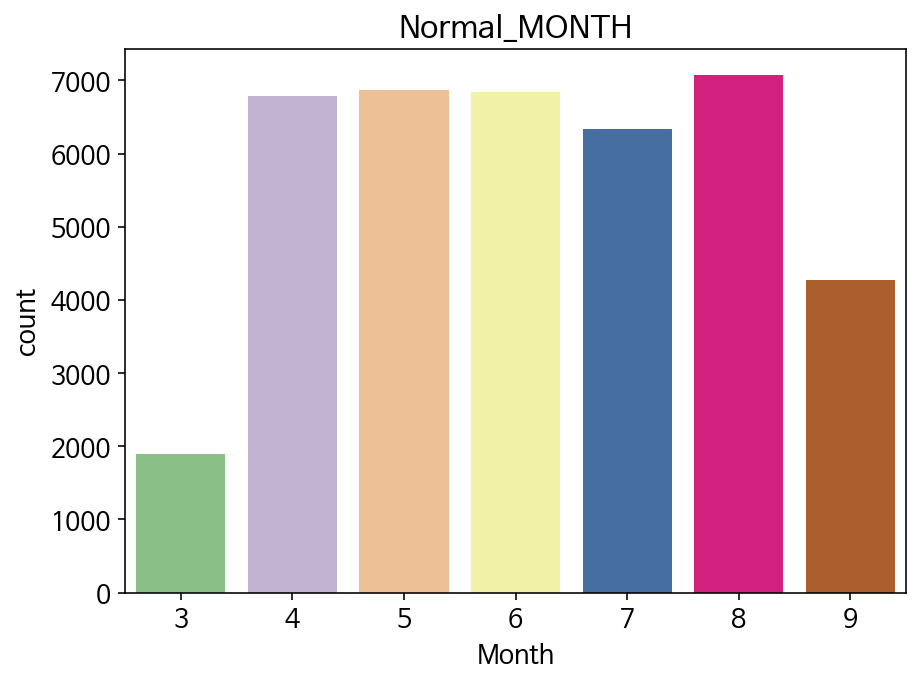

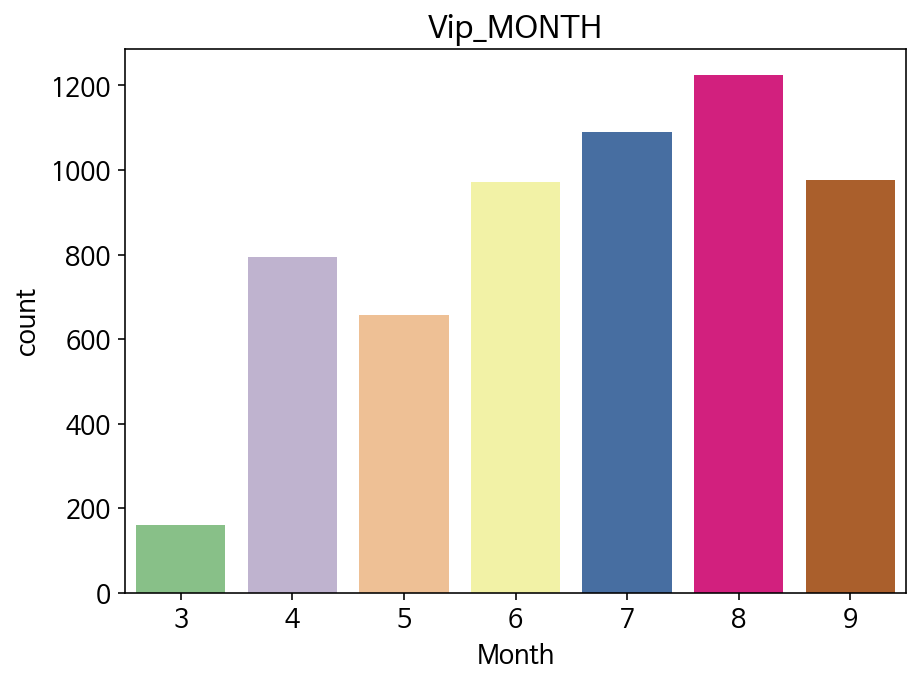

In [ ]:
#월간 구매량
plt.figure(figsize=(7, 5))
plt.rc('font', size=13)
sns.countplot(x="Month", palette='Accent',data=data_df[data_df['vip']==False])
plt.title('Normal_MONTH')
plt.show()

plt.figure(figsize=(7, 5))
plt.rc('font', size=13)
sns.countplot(x="Month", palette='Accent',data=data_df[data_df['vip']==True])
plt.title('Vip_MONTH')
plt.show()

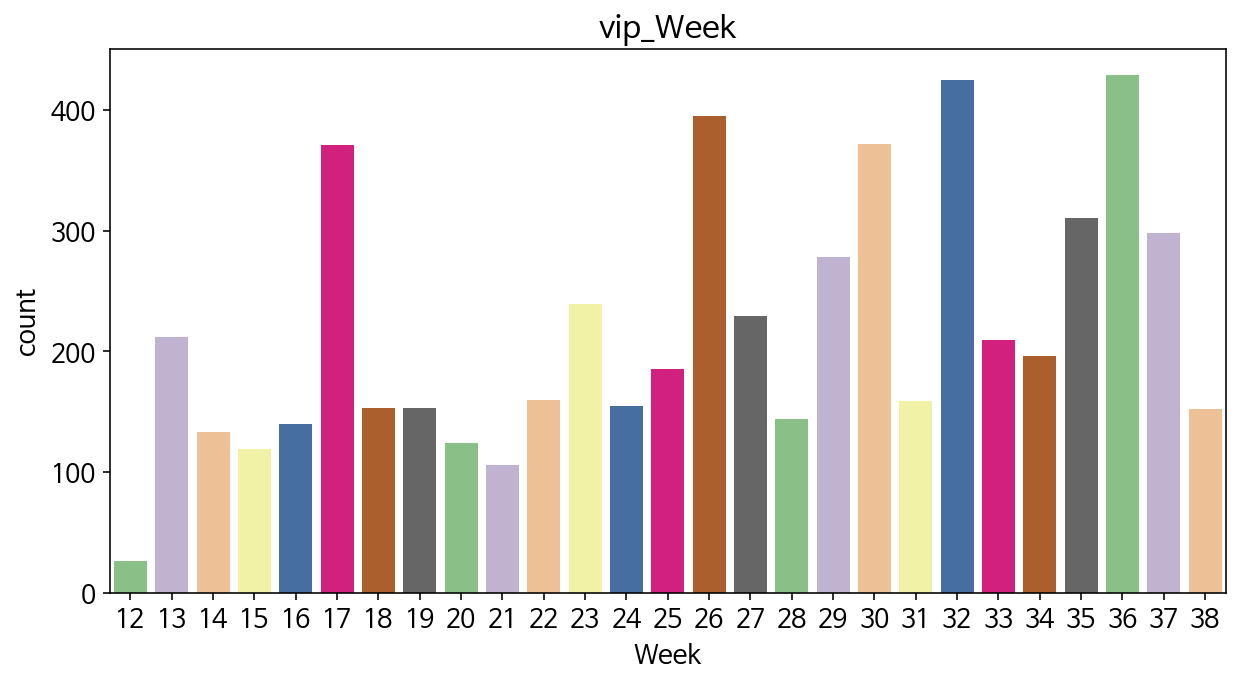

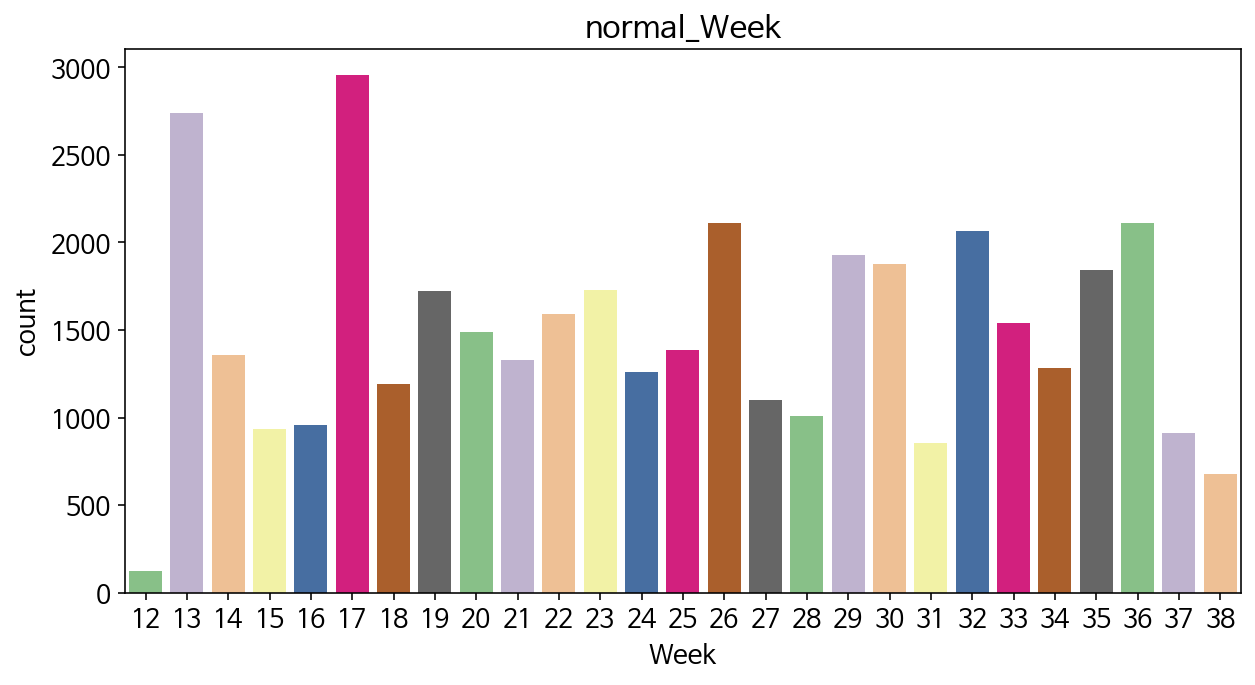

In [ ]:
#주간 구매량
plt.figure(figsize=(10, 5))
plt.rc('font', size=13)
sns.countplot(x="Week", palette='Accent',data=data_df[data_df['vip']==True])
plt.title('vip_Week')
plt.show()


plt.figure(figsize=(10, 5))
plt.rc('font', size=13)
sns.countplot(x="Week", palette='Accent',data=data_df[data_df['vip']==False])
plt.title('normal_Week')
plt.show()


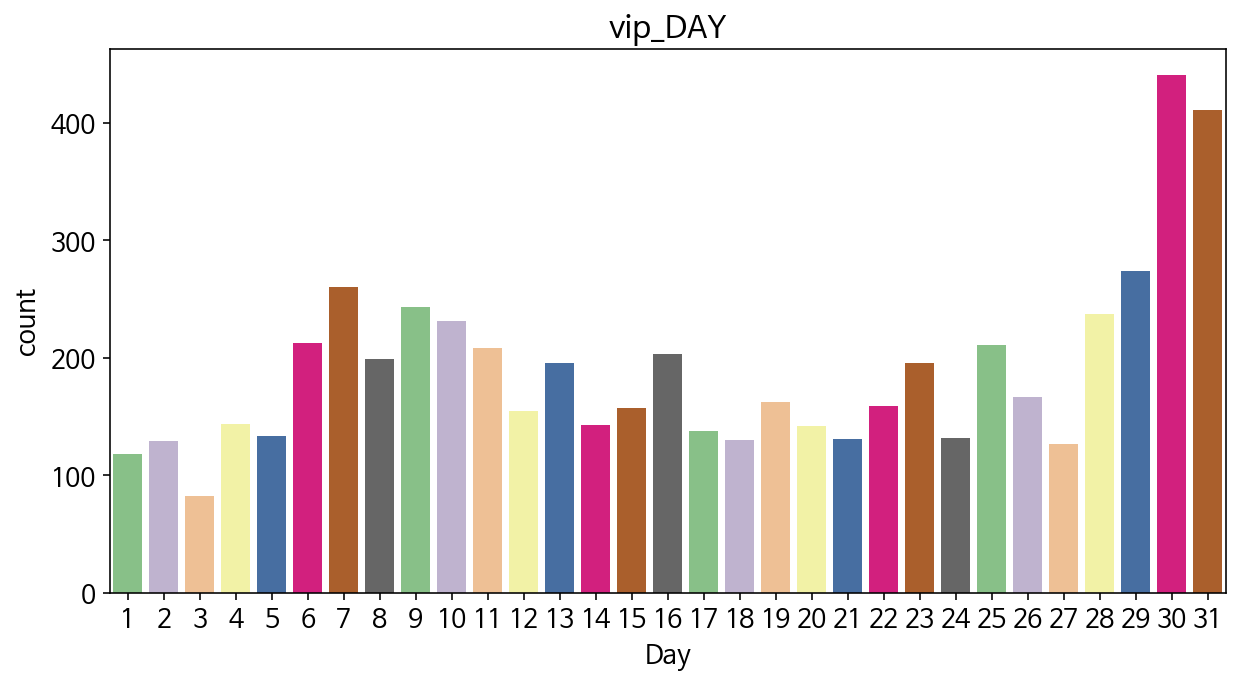

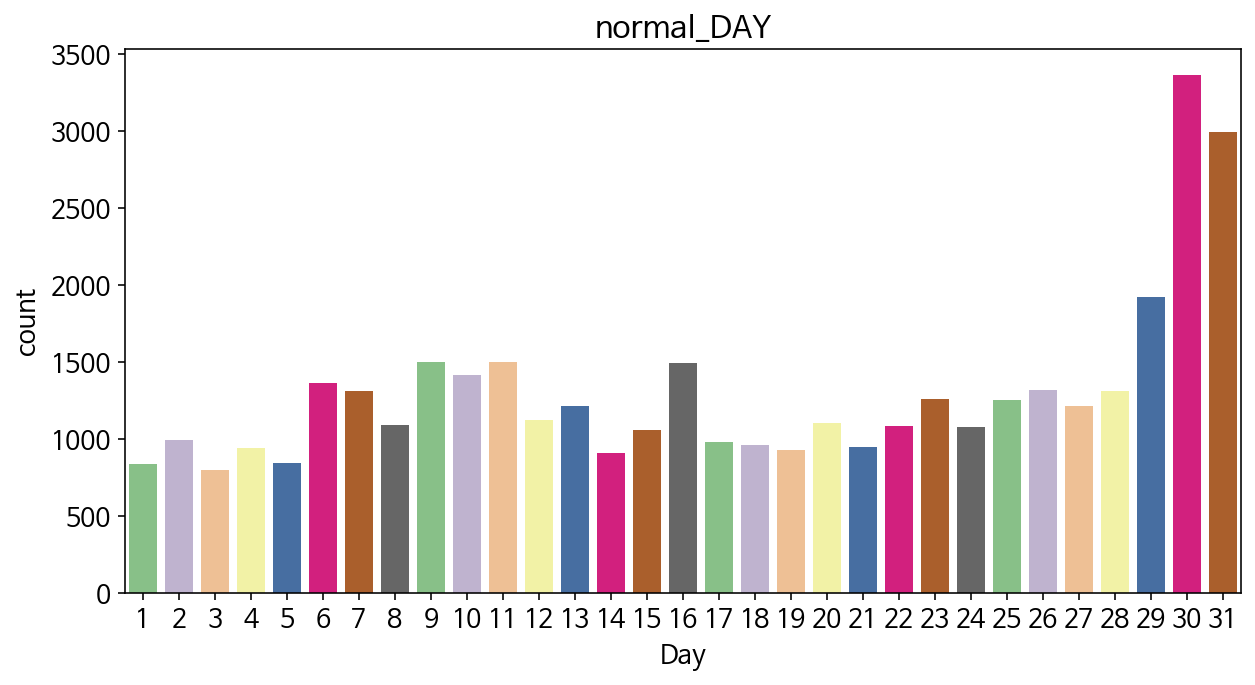

In [ ]:
#일간 평균 구매량
plt.figure(figsize=(10, 5))
plt.rc('font', size=13)
sns.countplot(x="Day", palette='Accent',data=data_df[data_df['vip']==True])
plt.title('vip_DAY')
plt.show()

plt.figure(figsize=(10, 5))
plt.rc('font', size=13)
sns.countplot(x="Day", palette='Accent',data=data_df[data_df['vip']==False])
plt.title('normal_DAY')
plt.show()

**정리 :** 
* vip고객과 normal고객의 구매 시점(월간 주간 일간)의 그래프가 거의 동일한 결과를 보인다. <br> 시간에 따른 vip고객과 normal고객 간의 차이는 없다. 

### 카테고리 분석

Text(0.5, 1.0, 'normal_category_title')

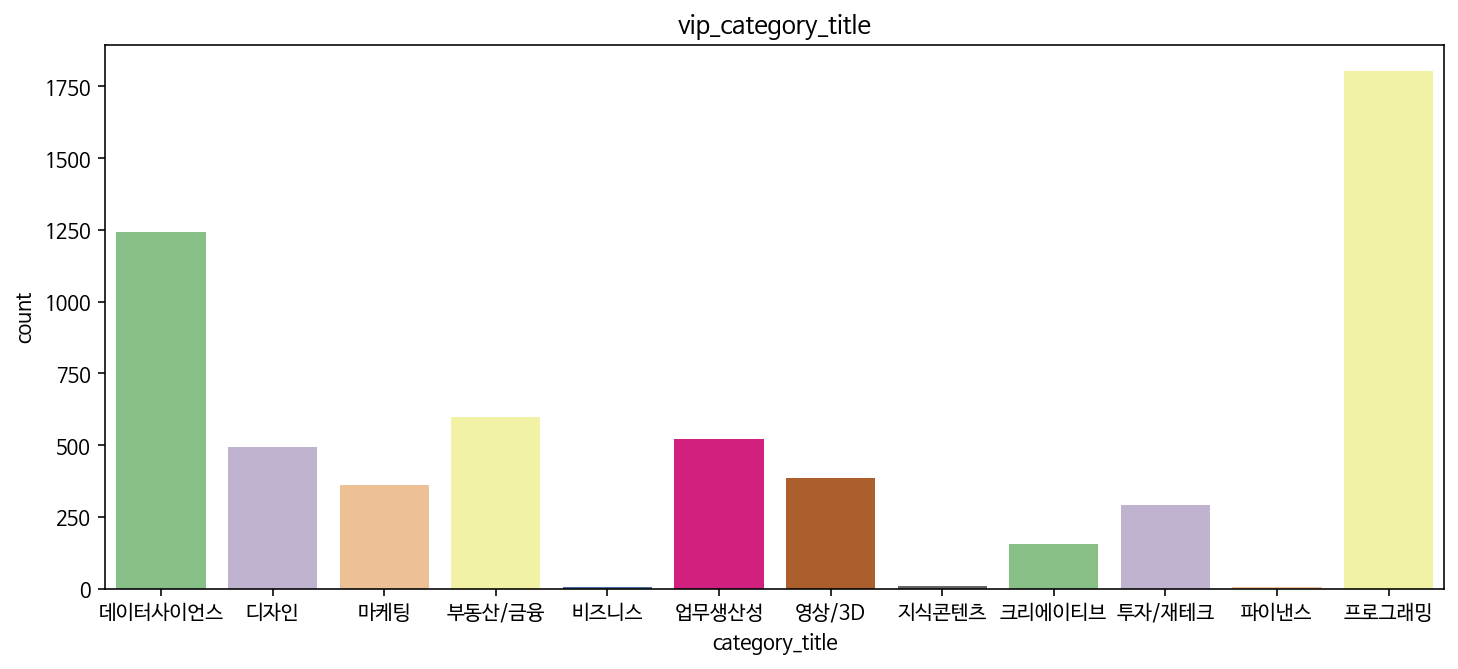

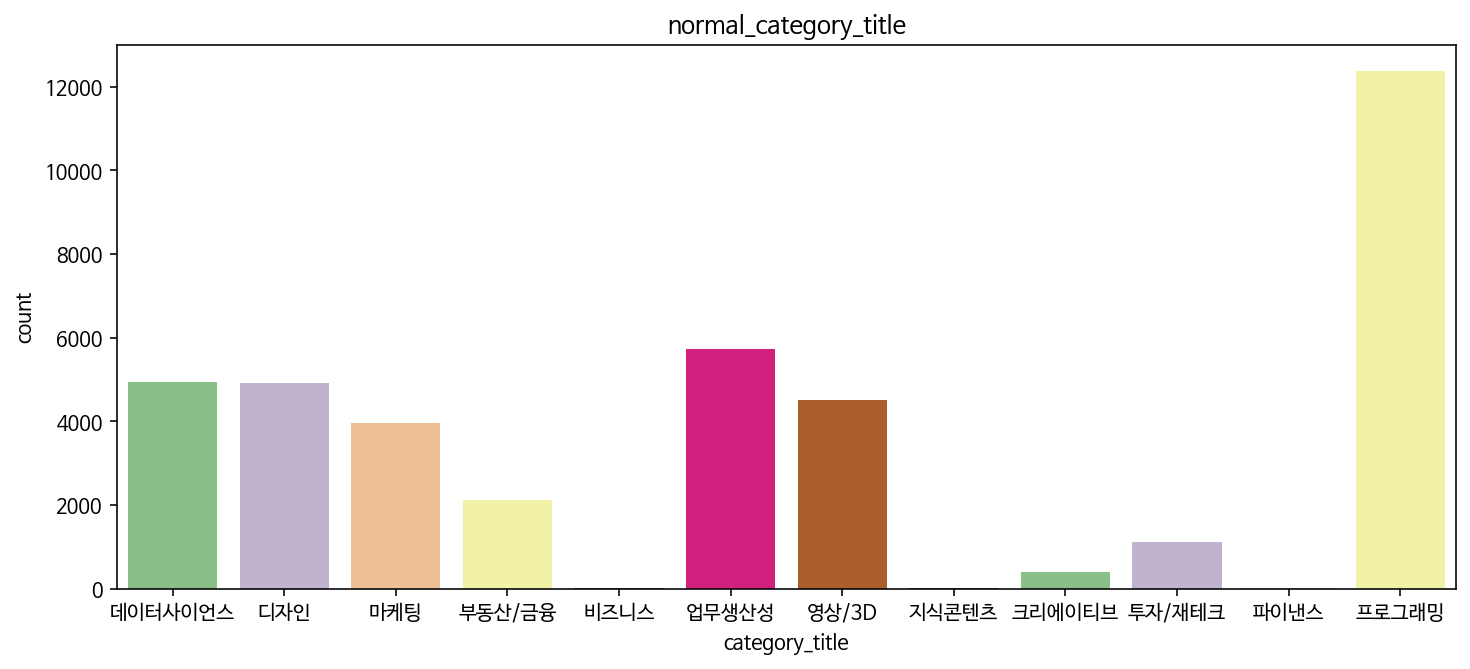

In [ ]:
plt.figure(figsize=(12, 5))
plt.rc('font', size=10)
sns.countplot(x="category_title", palette='Accent',data=vip_df)
plt.title('vip_category_title')

plt.figure(figsize=(12, 5))
plt.rc('font', size=10)
sns.countplot(x="category_title", palette='Accent',data=normal_df)
plt.title('normal_category_title')

<br>

* vip와 normal고객에게 가장 인기있는 강의 TOP 30 중에서 서로 중복되는 강좌는?

<br>

In [ ]:
#vip 인기 강의 TOP 30 (course_title)
vip_df2 = vip_df.copy()
vip_df2_ranked = vip_df2.groupby("course_title").agg({"revenue": "sum", "id": "count"}).sort_values(by='id', ascending=False)
vip_df2_ranked = vip_df2_ranked.iloc[:30,:]
vip_course_title_list = vip_df2_ranked.index
vip_df2_ranked = vip_df2_ranked.reset_index()
vip_df2_ranked

course_title     revenue  id
0   올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간...  29674900.0  95
1                         초격차 패키지 : 한 번에 끝내는 프론트엔드 개발   9487100.0  86
2                         초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발   9217800.0  85
3   올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치...  23071800.0  83
4                  초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍   5652400.0  77
5       올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략  21283200.0  75
6   올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...   8210200.0  73
7              초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터   7381600.0  70
8            초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영   7875200.0  68
9              올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리    9486000.0  64
10     올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략  18241000.0  64
11                       바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식   6764800.0  63
12           초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화  11148000.0  61
13   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin   6547500.0  57
14                          초격차 패키지 : 한 번에 끝내는 데이터 분석   5197400.0  57
15  올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간...  14680000.0  56
16                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인   7577500.0  53
17                            올인원 패키지 : 완전정복 시각디자인 기초   8137500.0  53
18                        초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능   8905950.0  50
19                            초격차 패키지 : 한번에 끝내는 디자인 툴   7713200.0  49
20                    올인원 패키지 : 100억을 움직이는 단 10장의 PPT   5835000.0  49
21                        초격차 패키지 : 한번에 끝내는 영상 촬영과 편집   4553500.0  49
22                  올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략   9767000.0  47
23                           올인원 패키지 : 강필성의 머신러닝 아카데미   6105950.0  47
24                     초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무  11516000.0  46
25                        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴   3580450.0  46
26              연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+   4314500.0  45
27   (프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판   6212900.0  45
28                         초격차 패키지 : 일잘러 필수 스킬 모음.zip   4816000.0  43
29                 초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편   3567200.0  43

In [ ]:
#Normal 인기 강의 TOP 30 (couse_title)
normal_df2 = normal_df.copy()
normal_df2_ranked = normal_df2.groupby("course_title").agg({"revenue": "sum", "id": "count"}).sort_values(by='id', ascending=False)
normal_df2_ranked = normal_df2_ranked.iloc[:30,:]

normal_course_title_list = normal_df2_ranked.index

normal_df2_ranked = normal_df2_ranked.reset_index()
normal_df2_ranked

course_title      revenue    id
0              초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터  107043025.0  1287
1                         초격차 패키지 : 한 번에 끝내는 프론트엔드 개발  139089300.0  1277
2                         초격차 패키지 : 한번에 끝내는 영상 촬영과 편집  115279500.0  1128
3              The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법  150255500.0   992
4                                      나의 칼퇴치트키 엑셀유치원   85842000.0   735
5                  초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍   34547100.0   706
6                     올인원 패키지 : star741의 캐주얼 일러스트 드로잉   85028200.0   619
7                            초격차 패키지 : 한 번에 끝내는 엑셀 실무   52743800.0   605
8                             초격차 패키지 : 한번에 끝내는 디자인 툴   83844400.0   587
9                         초격차 패키지 : 한 번에 끝내는 데이터 분석 툴   42591550.0   551
10                         초격차 패키지 : 일잘러 필수 스킬 모음.zip   58755900.0   547
11  올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...   57965100.0   543
12                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인   77021800.0   538
13                            올인원 패키지 : 완전정복 시각디자인 기초   76961300.0   528
14   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin   57971500.0   526
15                                입만 열면 인정받는 스피치 10분컷   10559600.0   513
16                            초격차 패키지 : 한번에 끝내는 모션그래픽   66726250.0   505
17                       초격차 패키지 : 한번에 끝내는 PPT 제작/디자인   44444400.0   502
18                    올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기   47916500.0   499
19                         올인원 패키지 : 디지털 마케팅 MAX 2020   58660525.0   499
20                               합격 패스 : 정보처리기사 필기&실기    2912415.0   471
21                          올인원 패키지 : 알고리즘 기술면접 완전 정복   42814300.0   471
22                             올인원 패키지 : 컴퓨터 공학 전공 필수   50236975.0   452
23  올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리...   41638000.0   450
24                 초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편   42161250.0   445
25      올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략  114257000.0   398
26                        올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵   28075920.0   386
27                        올인원 패키지 : 직장인을 위한 파이썬 데이터분석   41150400.0   382
28                        초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발   42328100.0   376
29                                 용호수의 돈 버는 실전 영상 제작   56459000.0   369

In [ ]:
intersection_course_title = normal_course_title_list & vip_course_title_list
print('중복되는 강좌의 수 : ',len(intersection_course_title),'개')
print(intersection_course_title)

중복되는 강좌의 수 :  14 개
Index(['초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터', '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
       '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집', '초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍',
       '초격차 패키지 : 한번에 끝내는 디자인 툴', '초격차 패키지 : 한 번에 끝내는 데이터 분석 툴',
       '초격차 패키지 : 일잘러 필수 스킬 모음.zip',
       '올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential',
       '초격차 패키지 : 한번에 끝내는 UX/UI 디자인', '올인원 패키지 : 완전정복 시각디자인 기초',
       '초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin',
       '초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       '올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략',
       '초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발'],
      dtype='object', name='course_title')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


**서로 중복되는 카테고리와 강의명** 

|Categories|course_name|
|:---|:---|
|프로그래밍|초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터|
|프로그래밍|초격차 패키지 : 한 번에 끝내는 프론트엔드 개발|
|프로그래밍|초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발|
|프로그래밍|초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍|
|프로그래밍|초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin
|프로그래밍|올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential
|
|디자인|초격차 패키지 : 한번에 끝내는 UX/UI 디자인|
|디자인|올인원 패키지 : 완전정복 시각디자인 기초|
|
|데이터사이언스|초격차 패키지 : 한 번에 끝내는 데이터 분석 툴|
|업무생산성|초격차 패키지 : 일잘러 필수 스킬 모음.zip|
|투자/재테크|올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략|
|영상/3D|초격차 패키지 : 한번에 끝내는 영상 촬영과 편집|


- 프로그래밍 : 6개
- 디자인 : 2개
- 데이터사이언스 : 1개
- 업무생산성 : 1개
- 투자/재태크 : 1개
- 영상/3D : 1개

**결과**


* vip와 normal고객 각각의 인기 강의와 그 중 중복되는 강의의 카테고리를 비교했을 때 프로그래밍 카테고리의 강의의 비율이 압도적으로 가장 높았다.
* 단, 그래프를 통해 두 고객군을 비교했을 때 normal 고객은 프로그래밍과 함께 전반적으로 다양한 카테고리에 대해 관심이 있으며, vip고객의 경우 프로그래밍과 데이터사이언스 카테고리에 초점이 맞춰져있었다.

### 쿠폰

In [ ]:
vip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 105406 to 69871
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5872 non-null   int64         
 1   customer_id             5872 non-null   int64         
 2   course_id               5220 non-null   float64       
 3   type                    5872 non-null   object        
 4   state                   5872 non-null   object        
 5   course_title            5872 non-null   object        
 6   category_title          5872 non-null   object        
 7   format                  5872 non-null   object        
 8   completed_at            5872 non-null   datetime64[ns]
 9   transaction_amount      5872 non-null   int64         
 10  coupon_title            2030 non-null   object        
 11  coupon_discount_amount  2030 non-null   float64       
 12  sale_price              5870 non-null   fl

In [ ]:
vip_df['coupon_title'].notnull().sum()

2030

In [ ]:
vip_df['coupon_title'].isnull().sum()

3842

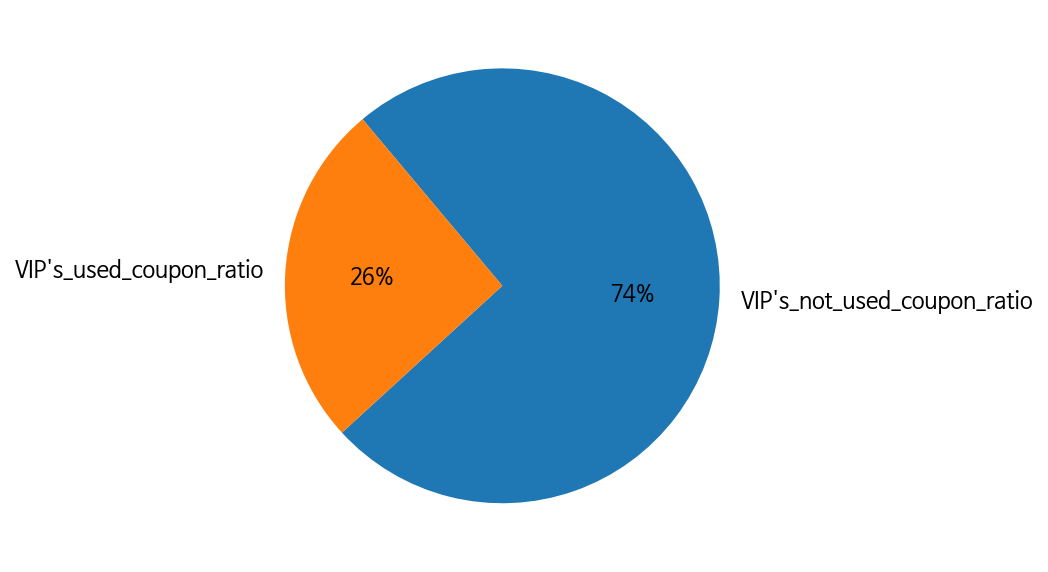

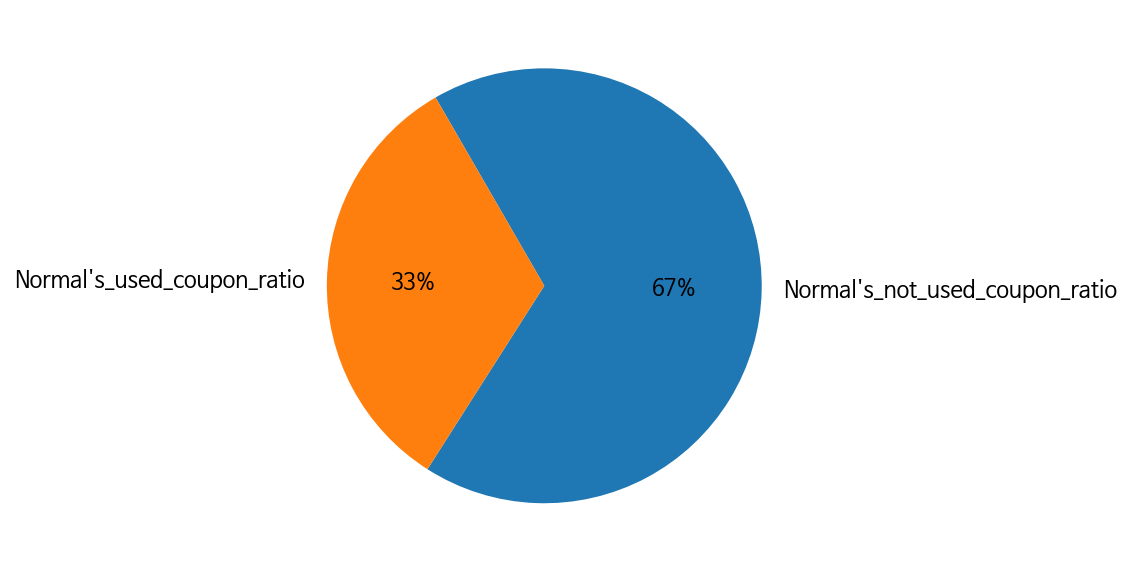

In [ ]:
#쿠폰 사용율
#전체인원수 / 쿠폰 사용자 수 
ratio = [len(vip_df), vip_df['coupon_title'].notnull().sum()]
labels = ["VIP's_not_used_coupon_ratio", "VIP's_used_coupon_ratio"]
plt.figure(figsize=(7, 5))
plt.rc('font', size=11)
plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=130, counterclock=False)
plt.show()

ratio2 = [len(normal_df), normal_df['coupon_title'].notnull().sum()]
labels2 = ["Normal's_not_used_coupon_ratio", "Normal's_used_coupon_ratio"]
plt.figure(figsize=(7, 5))
plt.rc('font', size=11)
plt.pie(ratio2, labels=labels2, autopct='%.0f%%', startangle=120, counterclock=False)
plt.show()

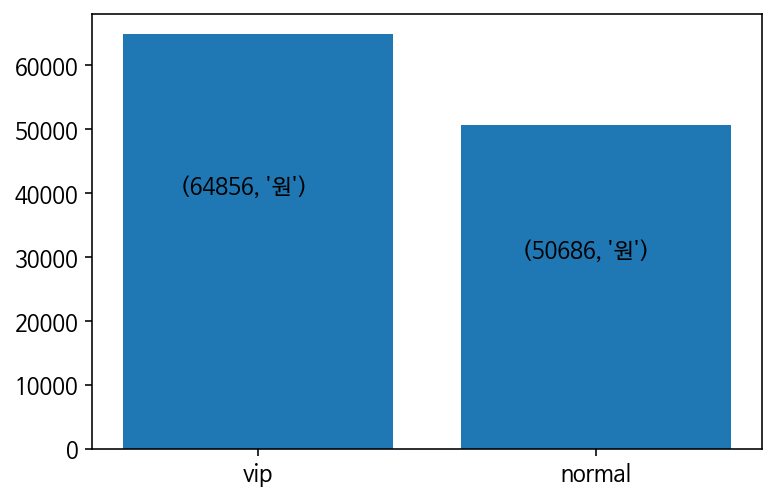

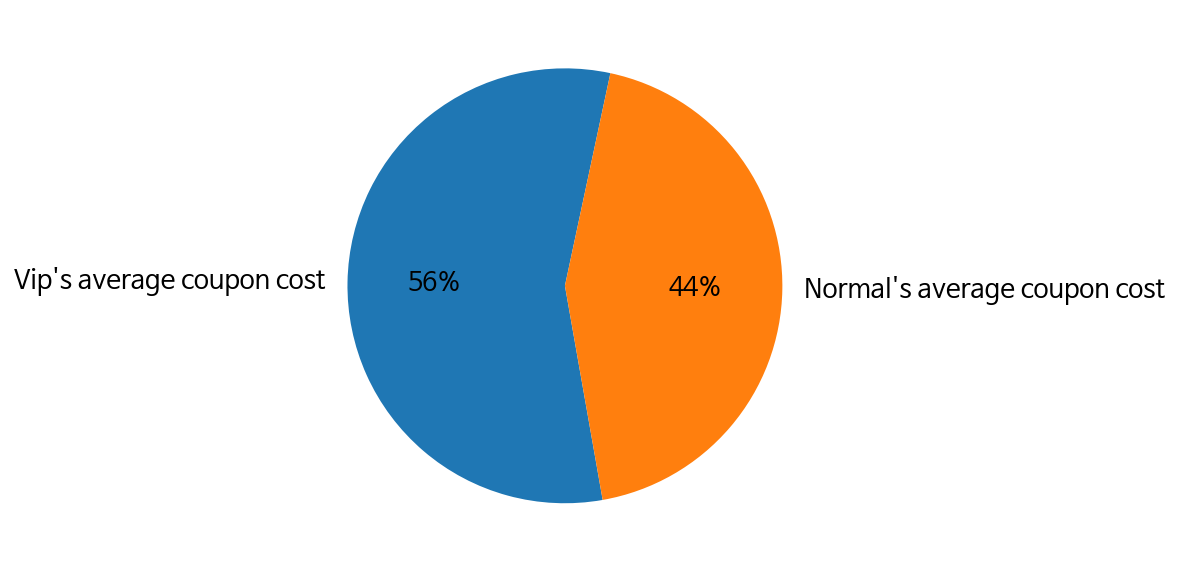

In [ ]:
#1인당 쿠폰 사용 금액
#총 쿠폰 사용 금액 / 쿠폰 사용자 수 
x = [1,2]
years = ['vip', 'normal']
values = [(vip_df['coupon_discount_amount'].sum() / vip_df['coupon_title'].notnull().sum()) , (normal_df['coupon_discount_amount'].sum() / normal_df['coupon_title'].notnull().sum()) ]

plt.bar(x, values)
plt.xticks(x, years)
plt.text(0.77,40000, (round(vip_df['coupon_discount_amount'].sum() / vip_df['coupon_title'].notnull().sum()),'원'))
plt.text(1.78,30000, (round(normal_df['coupon_discount_amount'].sum() / normal_df['coupon_title'].notnull().sum()),'원'))
plt.show()

ratio2 = [round(vip_df['coupon_discount_amount'].sum() / vip_df['coupon_title'].notnull().sum()), round(normal_df['coupon_discount_amount'].sum() / normal_df['coupon_title'].notnull().sum())]
labels2 = ["Vip's average coupon cost", "Normal's average coupon cost"]
plt.figure(figsize=(9, 5))
plt.rc('font', size=13)
plt.pie(ratio2, labels=labels2, autopct='%.0f%%', startangle=-80, counterclock=False)
plt.show()

In [ ]:
#전체 대상, 가장 많이 사용된 쿠폰 종류
df_coupon = df.groupby("coupon_title").agg({ "id": "count"}).sort_values(by='id', ascending=False)
df_coupon = df_coupon.reset_index()
df_coupon.head(10)

coupon_title    id
0   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰  5498
1  [WELCOME] 온라인 강의 3만원 할인쿠폰  3206
2   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰  2469
3  [WELCOME] 온라인 강의 2만원 할인쿠폰  2325
4  [WELCOME] 온라인 강의 1만원 할인쿠폰  1900
5             8월 1+1 프로모션 쿠폰  1458
6          4월 1+1 페이백 이벤트 쿠폰  1350
7   [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰  1284
8    [미래투자금] 온라인 강의 2만원 할인쿠폰  1274
9             5월 페이백 프로모션 쿠폰  1126

In [ ]:
#VIP대상, 가장 많이 사용된 쿠폰 종류
vip_coupon = vip_df.groupby("coupon_title").agg({ "id": "count"}).sort_values(by='id', ascending=False)
vip_coupon = vip_coupon.reset_index()
vip_coupon.head(10)

coupon_title   id
0             8월 1+1 프로모션 쿠폰  230
1        7월 100% 페이백 프로모션 쿠폰  141
2  [WELCOME] 온라인 강의 1만원 할인쿠폰  129
3   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰  129
4             5월 페이백 프로모션 쿠폰  123
5   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰  118
6          4월 1+1 페이백 이벤트 쿠폰  117
7  [WELCOME] 온라인 강의 2만원 할인쿠폰   68
8  [WELCOME] 온라인 강의 3만원 할인쿠폰   66
9   [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰   55

In [ ]:
#Normal대상, 가장 많이 사용된 쿠폰 종류
normal_coupon = normal_df.groupby("coupon_title").agg({ "id": "count"}).sort_values(by='id', ascending=False)
normal_coupon = normal_coupon.reset_index()
normal_coupon.head(10)

coupon_title    id
0   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰  3562
1  [WELCOME] 온라인 강의 3만원 할인쿠폰  1972
2   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰  1577
3  [WELCOME] 온라인 강의 2만원 할인쿠폰  1513
4  [WELCOME] 온라인 강의 1만원 할인쿠폰  1153
5          4월 1+1 페이백 이벤트 쿠폰  1042
6             8월 1+1 프로모션 쿠폰  1024
7             5월 페이백 프로모션 쿠폰   850
8    [미래투자금] 온라인 강의 2만원 할인쿠폰   788
9        7월 100% 페이백 프로모션 쿠폰   787

**정리** 
* 쿠폰 사용량은 vip 고객과 normal 고객의 각각 28%, 32%로 30% 전 후 양상을 보이며 서로 큰 차이가 없어보인다.

* 1인 쿠폰 사용금액량에서는 vip고객이 약68,000원 normal  고객이 약 51,000원으로 vip고객이 normal 고객에 비해 30% 높은 결과가 나타났다.

* vip 고객이 가장 많이 사용한 쿠폰의 종류는 프로모션 쿠폰과 금액 할인권이 있다. 전반적으로 한쪽에 크게 치우지지 않는 경향을 보인다.

* normal 고객이 사용한 쿠폰의 종류에서 1위~5위의 금액 할인권이 전체의48%를 차지할 정도로 압도적으로 많다.  

### 결론
* 시간에 따른 구매 차이는 없다.
* vip normal 고객 모두 프로그래밍 카테고리는 가장 선호하며, 전반적으로 normal 고객군은 다양한 카테고리를 구입하는 경향이 있고, vip 고객군은 프로그래밍 & 데이터사이언스 카테고리에 더 집중된 구매 성향을 보인다.
* 쿠폰은 두 고객군 모두 비슷한 사용율을 보였으며, vip 고객군은 프로모션&금액 할인과 관련된 쿠폰 종류를 많이 사용한 반면, normal 고객군에서는 1위 부터 5위 까지가 금액할인과 관련된 쿠폰이다.

## 일반 고객 VIP로 만들기 (2)

### 타겟 설정

**vip에 근접한 타겟 분석**
- 고객들 중 vip에 가까운 고객들을 타겟으로 지정
- 특징 종합하여 vip로 만들기 위한 전략 제시 

**근접 타겟 분석**
- 현재 vip 기준은 revenue (순 이익 금액) 40만원 이상
- 기준에 부합하지 못했으나, 기준에 가장 근접한 대상들을 타겟으로 선정.
- 30~40만원 사이 결제한 고객들을 분석하여 이들의 관심사, 카테고리 등을 도출

- target 숫자는 약 4.9%, vip와 비슷

In [ ]:
tt1 = pt.groupby("customer_id").agg({"revenue": "sum","id":'count'}).sort_values(by=["revenue", "id"], ascending=False)

In [ ]:
# 조건을 만족하는 값들 모아 'pre_vip' column 생성, target 지정
tt2 = t[(t['revenue']>=300000)&(t['revenue']<400000)].sort_values(by=["revenue", "id"], ascending=False)

def func(x):
    if x in tt2.index:
        return True
    else:
        return False

pt['pre_vip'] = pt["customer_id"].apply(func)
target = pt[pt['pre_vip']==True]

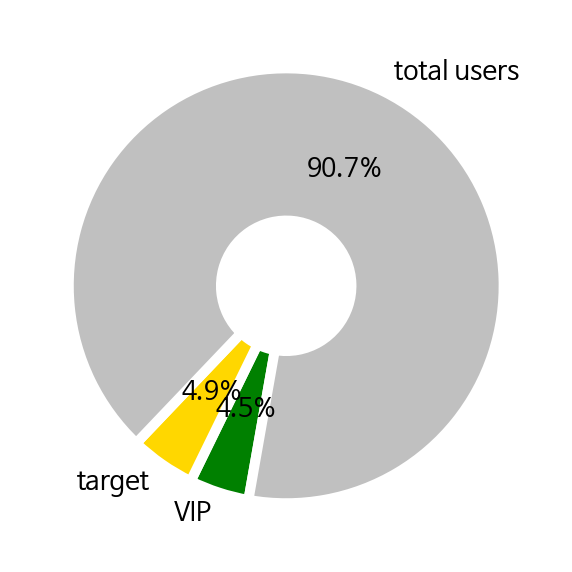

In [ ]:
# 전체 비율의 약 4.9%
plt.figure(figsize=(5, 5))
colors = ['green','gold','silver']
plt.pie([len(t2),len(tt2), len(t)-len(tt2)-len(t2)], labels=["VIP","target", "total users"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.show()

### 타겟 분석

- 카테고리

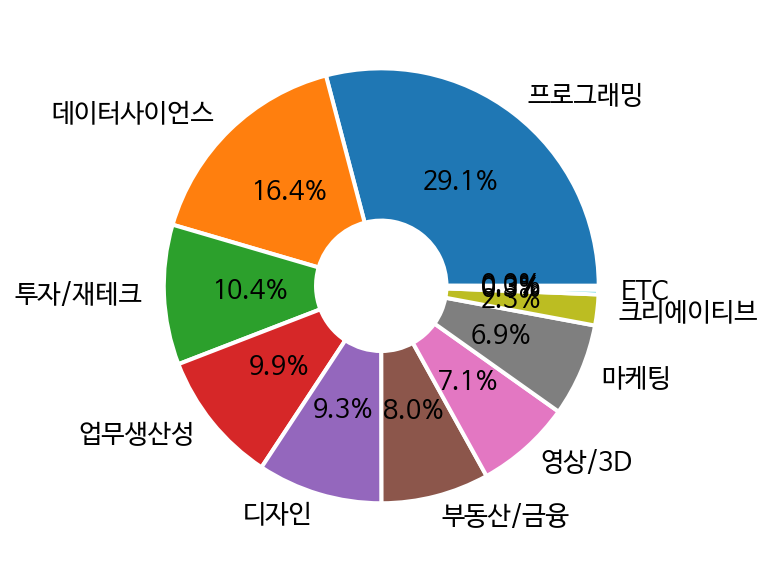

In [ ]:
# 전체적인 카테고리별 판매량과 유사한 패턴을 가짐
ttt = target['category_title'].value_counts()

plt.figure(figsize=(5, 5))
a = ['프로그래밍','데이터사이언스','투자/재테크','업무생산성','디자인','부동산/금융',
 '영상/3D','마케팅','크리에이티브','ETC','',''] # 가독성을 위해 '비즈니스','파이낸스','지식콘텐츠' -> ETC로 대체
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(ttt, labels=a, autopct='%.1f%%', wedgeprops=wedgeprops)

plt.show()

- 세부 카테고리

In [ ]:
# 세부 카테고리 조사, 조사를 위해 새로운 column 생성
aaaa = target.groupby("subcategory_title").agg({"id": "count"}).sort_values(by='id', ascending=False)
aaaa["target_category"] = ""
aaaa["target_category"][:10] = target["subcategory_title"].value_counts()[:10].index.to_list()
aaaa["target_category"][10:] = "etc"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# TOP10 세부 카테고리를 추리기 위해 다시 그룹 만듦
a2222 = aaaa.groupby("target_category").agg({"id": "sum"}).sort_values(by='id', ascending=False)

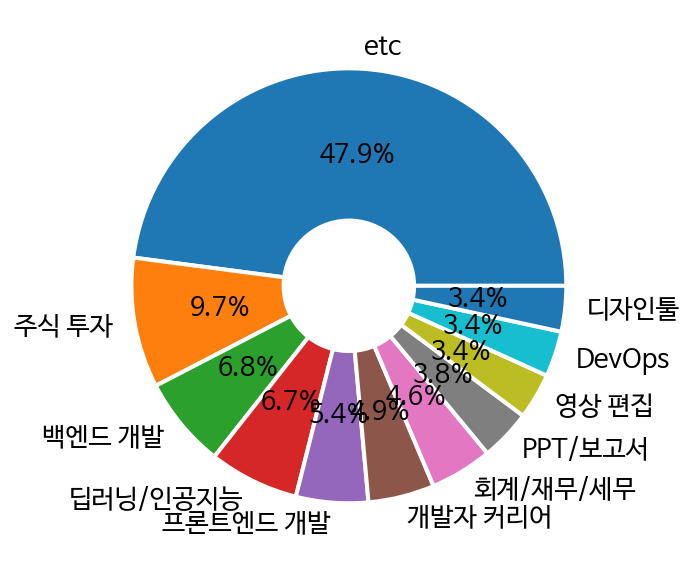

In [ ]:
# 세부 카테고리 TOP10, 단일 비율은 주식 투자, 크리에이티브가 가장 높음

plt.figure(figsize=(5, 5))
# TOP 10 외 항목은 ETC로 대체
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(a2222["id"],labels=a2222.index,autopct='%.1f%%', wedgeprops=wedgeprops)

plt.show()

- TOP 10

In [ ]:
# 가장 많이 들은 강좌 TOP 10
target['course_title'].value_counts().head(10)

올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략                 236
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                    72
올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간 제한)             71
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                         65
올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략                 65
올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치평가 (수강시간 제한)     54
올인원 패키지 : 완전정복 시각디자인 기초                                        52
초격차 패키지 : 일잘러 필수 스킬 모음.zip                                     44
초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발                                    42
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                             41
Name: course_title, dtype: int64

- 소비 패턴 (소비 금액, 강의 갯수, 쿠폰 사용 등)

In [ ]:
# target의 평균 소비 금액
# 평균적으로 33.7만원 정도 소비
target['revenue'].sum()/target['customer_id'].nunique()

337475.1437793427

In [ ]:
# 강의 한 개당 평균 가격은 29.5만원 선
target['sale_price'].sum()/target['course_id'].nunique()

2956612.727272727

In [ ]:
# 타겟 유저들의 평균 강의 수강 수
print(f"purchased_counts: \n{target['customer_id'].value_counts()}")
print('')
print(f"user_counts: {target['customer_id'].nunique()}")
print('')
print(f"lecture_counts_rate: {len(target)/target['customer_id'].nunique()}")

purchased_counts: 
495383    7
515059    7
279483    7
494310    6
444486    6
         ..
624029    1
77604     1
623774    1
538391    1
12719     1
Name: customer_id, Length: 1704, dtype: int64

user_counts: 1704

lecture_counts_rate: 2.0252347417840375


In [ ]:
target['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                      121
8월 1+1 프로모션 쿠폰                                111
[WELCOME] 온라인 강의 1만원 할인쿠폰                     105
[미래투자금] 온라인 강의 2만원 할인쿠폰                        83
[WELCOME] 온라인 강의 3만원 할인쿠폰                      82
                                             ... 
[재결제쿠폰]올인원 패키지 : 딥러닝을 활용한 추천시스템 구현              1
[할인쿠폰] 재테크 카테고리 AOP 30% 할인 (금융 아카데미 제외)         1
[시크릿쿠폰] 산돌 런칭기념 30% 할인쿠폰                        1
[할인 쿠폰] 게임 개발자 취업의 모든 것 20% 할인                  1
[20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브      1
Name: coupon_title, Length: 99, dtype: int64

In [ ]:
# 쿠폰 사용 여부
# 66% 정도가 쿠폰을 써서 결제한 사실을 알 수 있다.
print(f"coupon_used : {target['coupon_title'].isna().sum()}")
print(f"used_rate : {(target['coupon_title'].isna().sum())/len(target)*100}%")

coupon_used : 2295
used_rate : 66.50246305418719%


In [ ]:
# 쿠폰 할인 비율
# 11.6% 정도 할인 받은 사실을 알 수 있다.
print(f"purchased_amount: {target['revenue'].sum()}")
print(f"coupon_discount_amount: {target['coupon_discount_amount'].sum()}")
print(f"coupon_discount_amount_rate: {target['coupon_discount_amount'].sum()/target['revenue'].sum()*100}%")

purchased_amount: 575057645.0
coupon_discount_amount: 66696855.0
coupon_discount_amount_rate: 11.598290289663048%


In [ ]:
# 타겟들의 결제 방식
print(target['pg'].value_counts())
print()
print(target['method'].value_counts())

INICIS    2024
KAKAO      578
NAVER      396
PAYCO      141
CHAI         3
Name: pg, dtype: int64

CARD         2569
POINT         474
VBANK         189
PROMOTION     105
TRANSFER       67
TRANS          45
ONSITE          2
Name: method, dtype: int64


**정리**
- 카테고리별 판매량은 전체적인 판매량과 비슷
- 세부 카테고리 조사 결과, 단일 주제로는 주식 시장 분석 강의가 수요가 가장 많았음 -> pre_vip 공략을 위한 주식 관련 강의 증강
- vip 목표 금액은 40만원 선이고, 현재 pre_vip의 평균 소비 금액은 33.7만원 선 -> 소비를 촉진하기 위한 전략 필요
- 강의 한 개당 평균 가격은 29.5만원 선 -> 평균 소비 금액과 차이가 크지 않음
- pre_vip는 평균적으로 2개 정도의 강의를 수강 
- pre_vip가 많이 사용한 쿠폰 중에 1+1 쿠폰이 있음 -> 쿠폰을 사용해 2개 이상의 강의를 많이 사용했다고 볼 수 있음
- pre_vip의 66% 정도가 쿠폰을 사용하였고, 이들은 합하여 11.6% 정도 할인을 받았다.

###**결론**
- pre_vip의 평균 소비 금액은 33.7만원 선으로, 조금만 더 소비를 촉진한다면 충분히 vip가 될 수 있다.
- 단일 강의로서 주식이 인기가 많으니, 퀄리티 좋은 주식 강의를 몇 개 런칭해서 공급을 늘리면 결제를 늘릴 수 있다.
- pre_vip는 쿠폰을 적극적으로 사용하는 편이다. 해당 강의를 결제 시 추가로 쿠폰을 주는 전략을 사용하면 vip 숫자를 늘릴 수 있을 것이라 생각한다.

## 일반 고객 늘리기 (1)

- 일반적인 고객의 특성을 파악하고 insight를 도출

#### format 분석

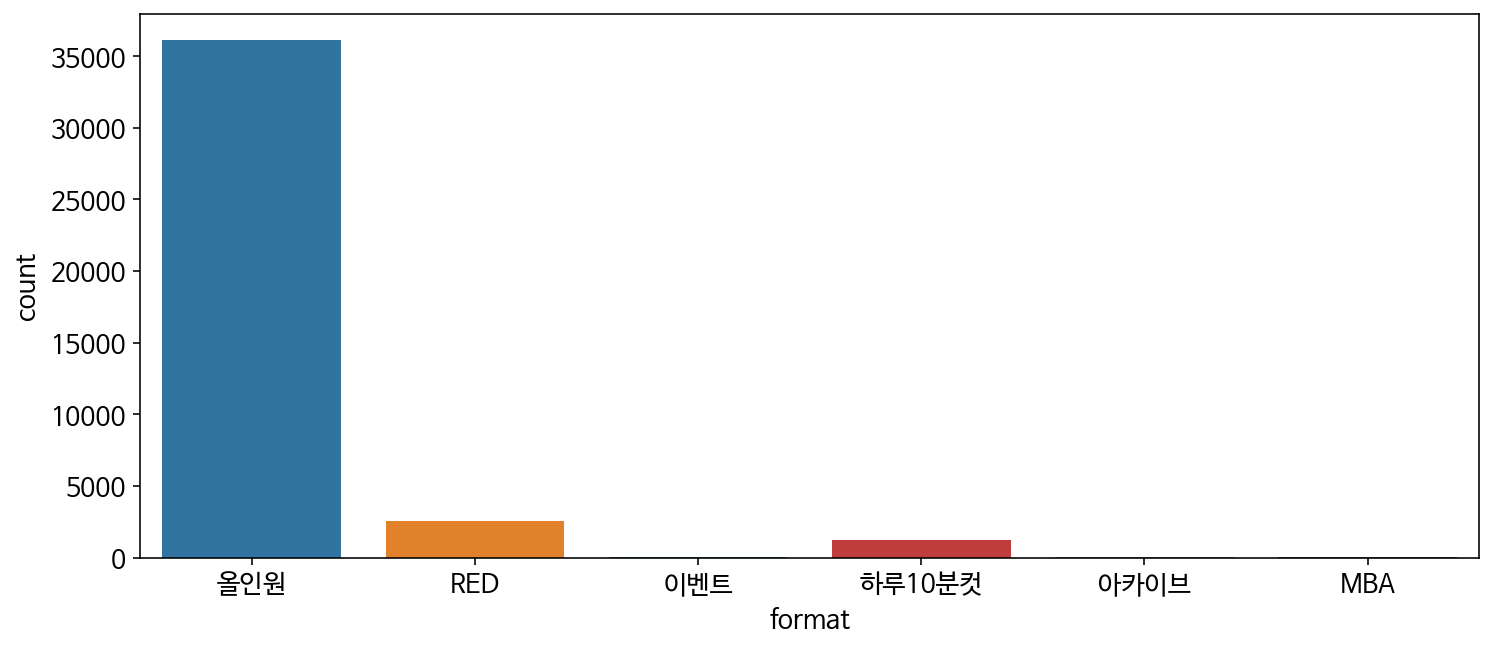

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=pt[pt['vip']==False]['format'],data=pt)
plt.show()

- 올인원의 인기가 가장 많음
- 올인원에 속한 강의나 카테고리 확인해보기

In [ ]:
# vip 아닌 고객들의 category 조사
all_cnt = pt[(pt['vip']==False)&(pt['format']=='올인원')]['category_title']

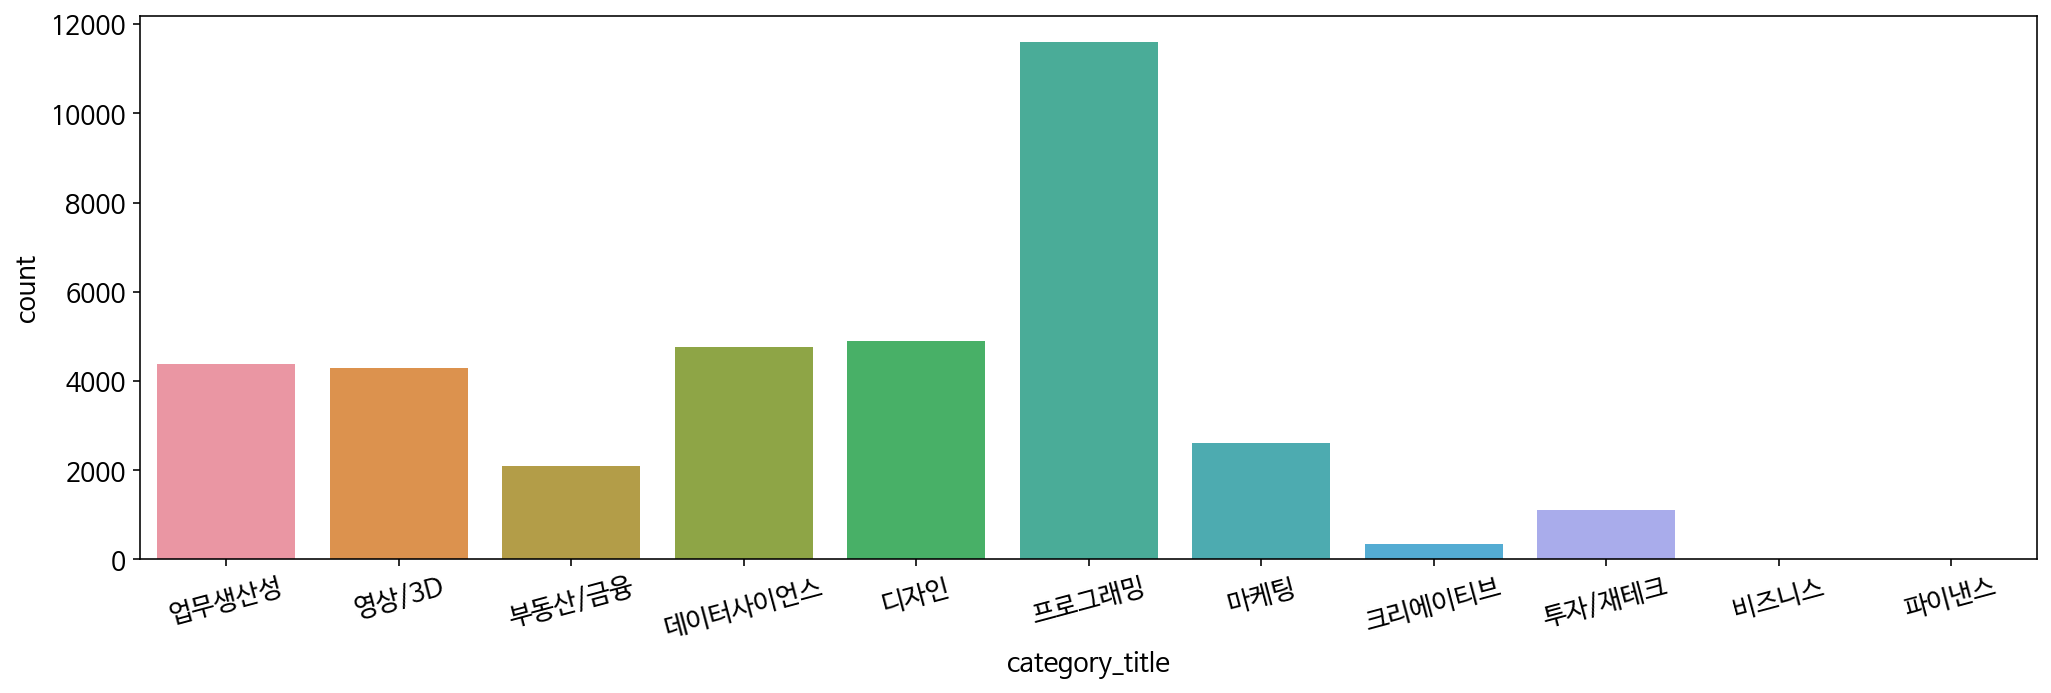

In [ ]:
plt.figure(figsize=(17,5))
plt.xticks(rotation = 15)
sns.countplot(x=all_cnt,data=pt)

- 프로그래밍이 다른 카테고리에 비해 2~3배 이상 구매율이 좋다
- 많은 수강생이 프로그래밍에 관심이 있다고 생각되며, 프로그래밍 카테고리의 다른 강의를 판매한다면 다른 카테고리에 비해 더 많은 구매율을 얻을 수 있을 것이라 판단됨.

- 프로그래밍 강의 중에서 세부적으로 확인을 해볼 필요가 있다고 생각함.

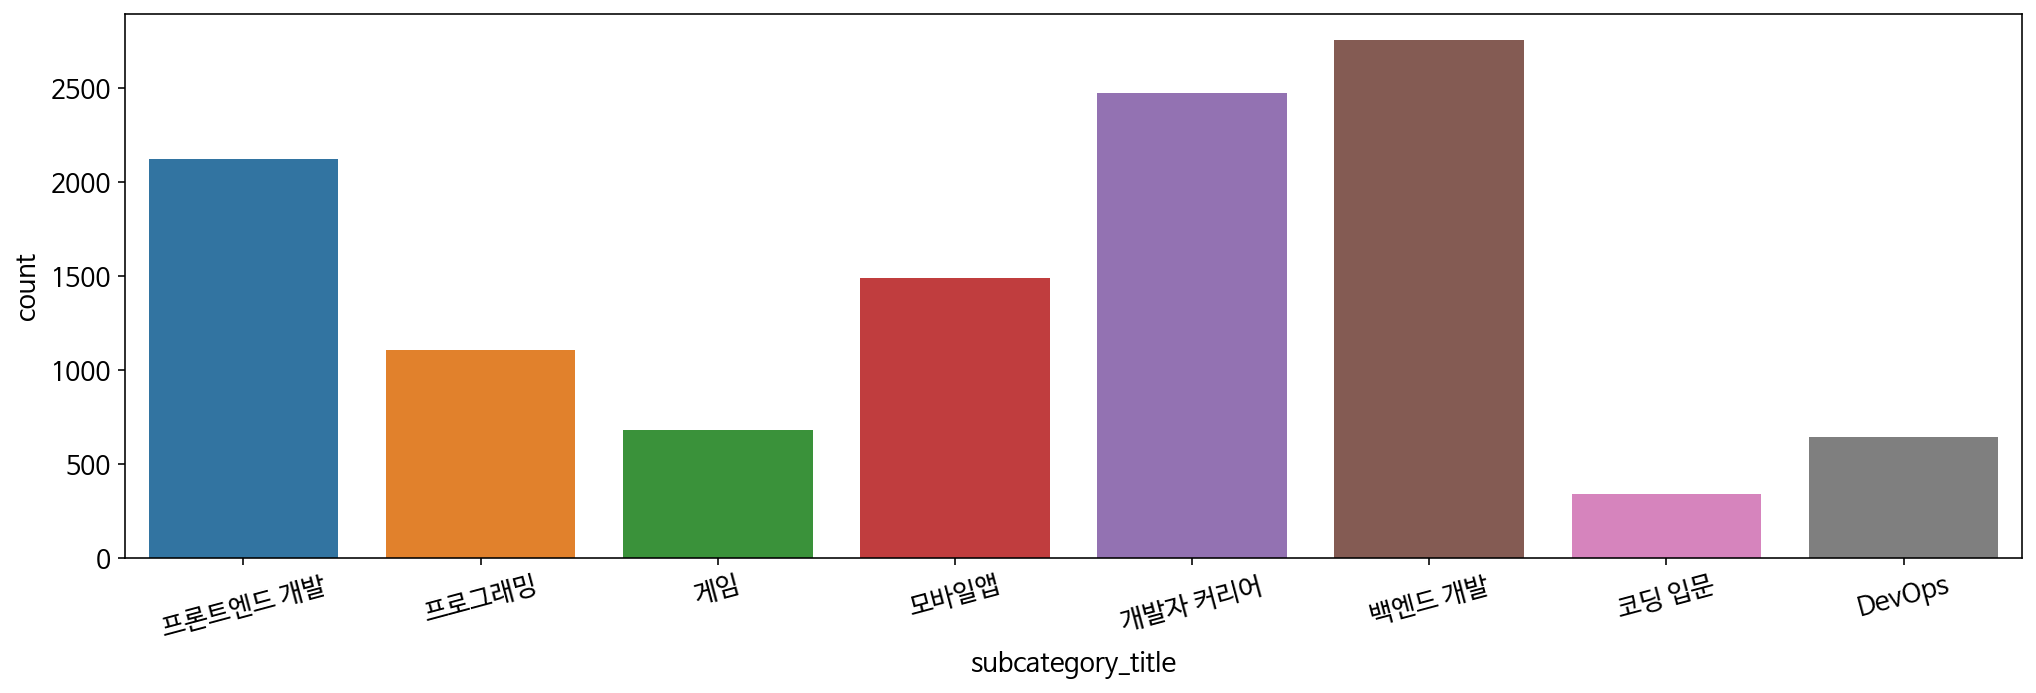

In [ ]:
sub_cnt = pt[(pt['vip']==False)&(pt['format']=='올인원')&(pt['category_title']=='프로그래밍')]['subcategory_title']

plt.figure(figsize=(17,5))
plt.xticks(rotation = 15)
sns.countplot(x=sub_cnt,data=pt)

- 위 그래프로 보아 어느정도 프로그래밍에 대해 이미 알고 강의를 구매하는 수강생이 주를 이루는 것으로 보인다.
- 강의영상의 방향성도 알 수 있을 것 같다.

#### completed_at 분석

In [ ]:
# 날짜를 일 단위까지 정리하기.
def func(x):
    return x.strftime("%Y-%m-%d")

pt["completed_at"] = pt["completed_at"].apply(func)

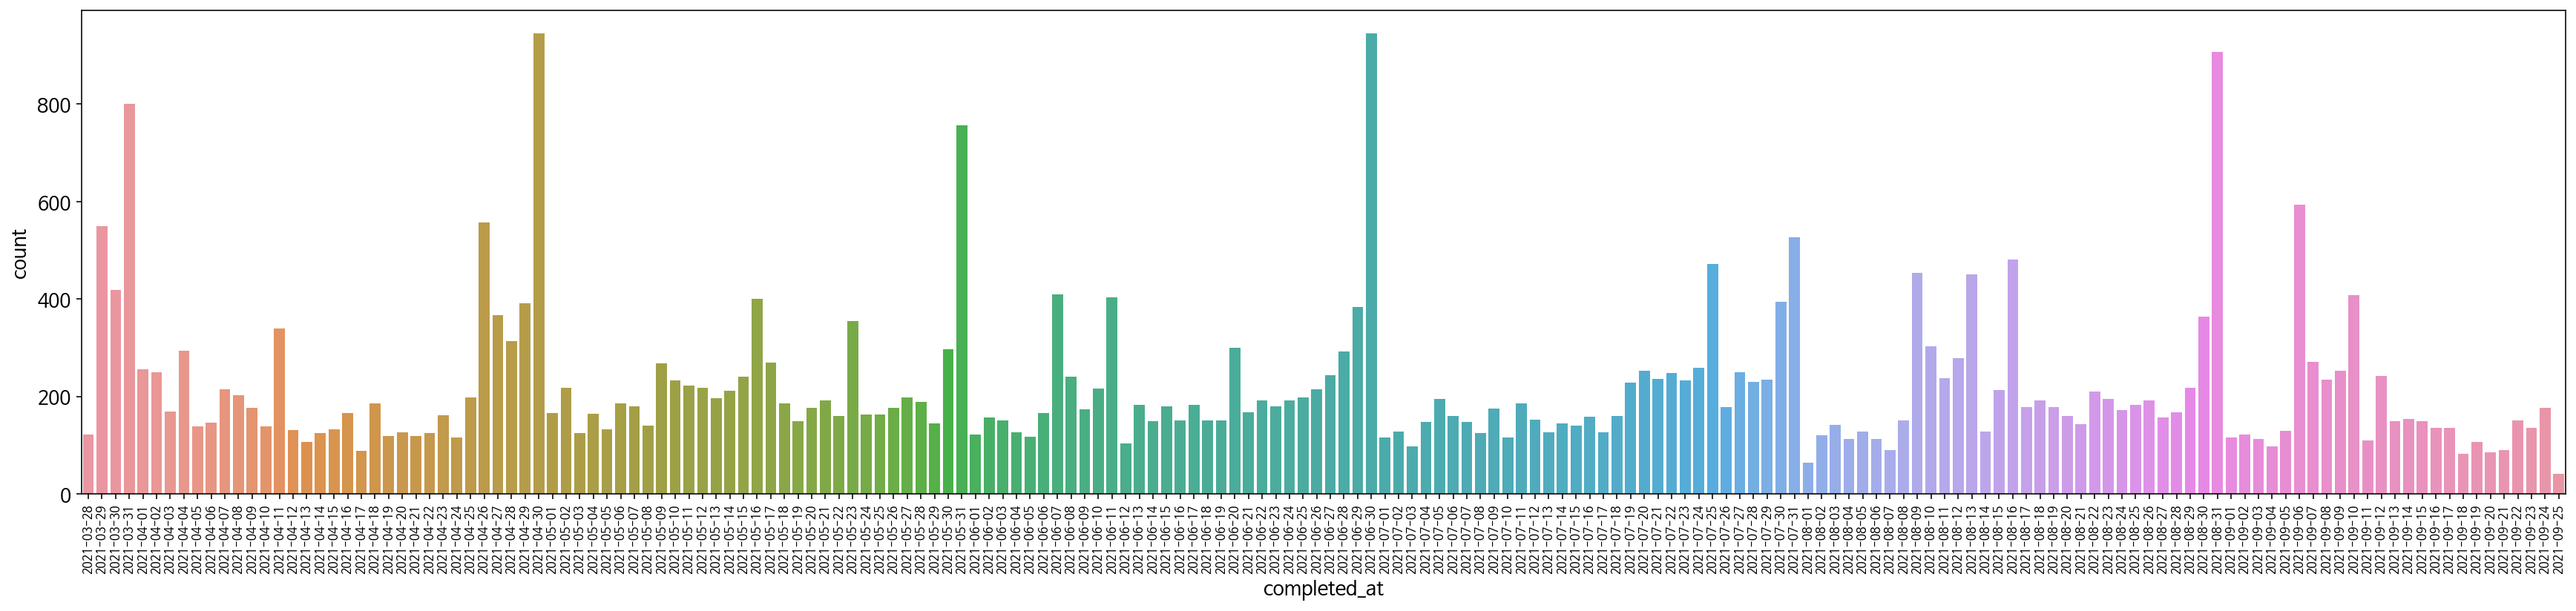

In [ ]:
plt.figure(figsize=(30,6))
plt.xticks(size=8, rotation = 90)
sns.countplot(x=pt[pt['vip']==False]['completed_at'],data=pt)

- 매달 말에 아주 높은 구매 그래프를 확인 할 수 있다.
- 매달 말에 구매율이 높은 이유 찾기

#### coupon_title 분석

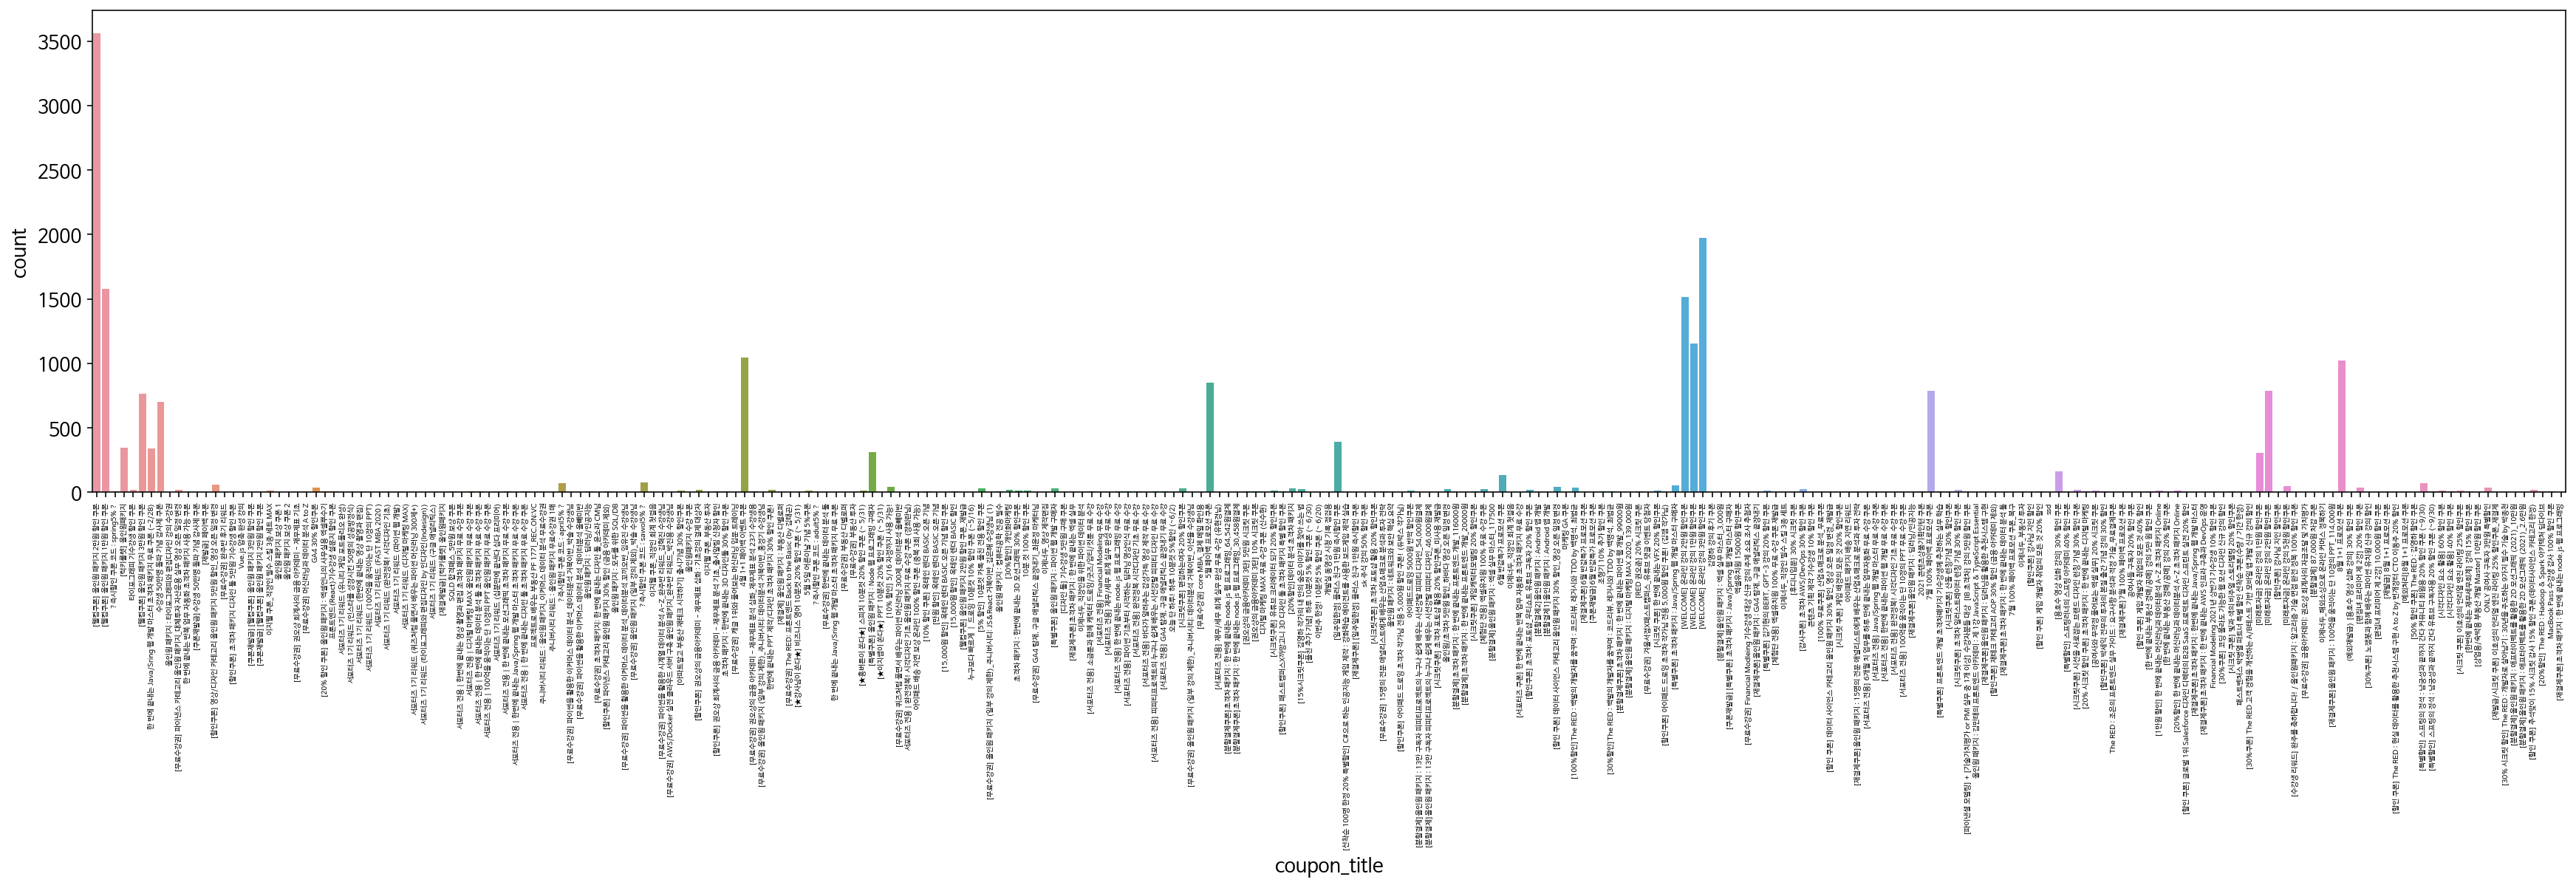

In [ ]:
plt.figure(figsize=(30,6))
plt.xticks(size=5, rotation = 90)
sns.countplot(x=pt[pt['vip']==False]['coupon_title'],data=pt)
plt.show()

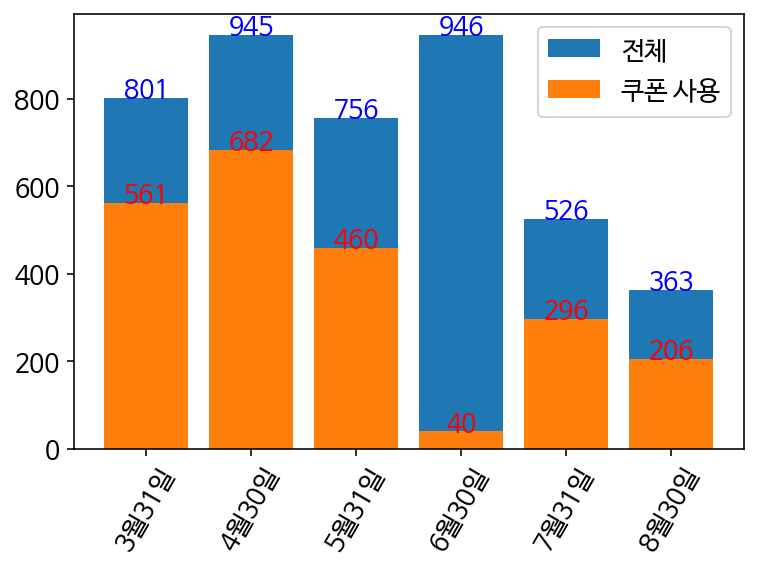

In [ ]:
x= [] # 날짜
y= [] # 총 구매량
y1= [] # 쿠폰사용 구매량
for i in range(3,9):
    if i%2 ==0:
        x.append(f'{i}월30일')
        y.append(len(pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-30')]))
        y1.append(len(pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-30')].dropna(subset=['coupon_title'])))
    else:
        x.append(f'{i}월31일')
        y.append(len(pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-31')]))
        y1.append(len(pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-31')].dropna(subset=['coupon_title'])))
        
bar1 = plt.bar(x,y, label= "전체")
bar2 = plt.bar(x,y1, label= "쿠폰 사용")
plt.xticks(rotation=60)
plt.legend()

for idx, rect in enumerate(bar1):
    plt.text(idx, rect.get_height()+ 0.5,y[idx], ha= 'center', color= 'blue')
    
for idx, rect in enumerate(bar2):
    plt.text(idx, rect.get_height()+ 0.5,y1[idx], ha= 'center', color= 'red')

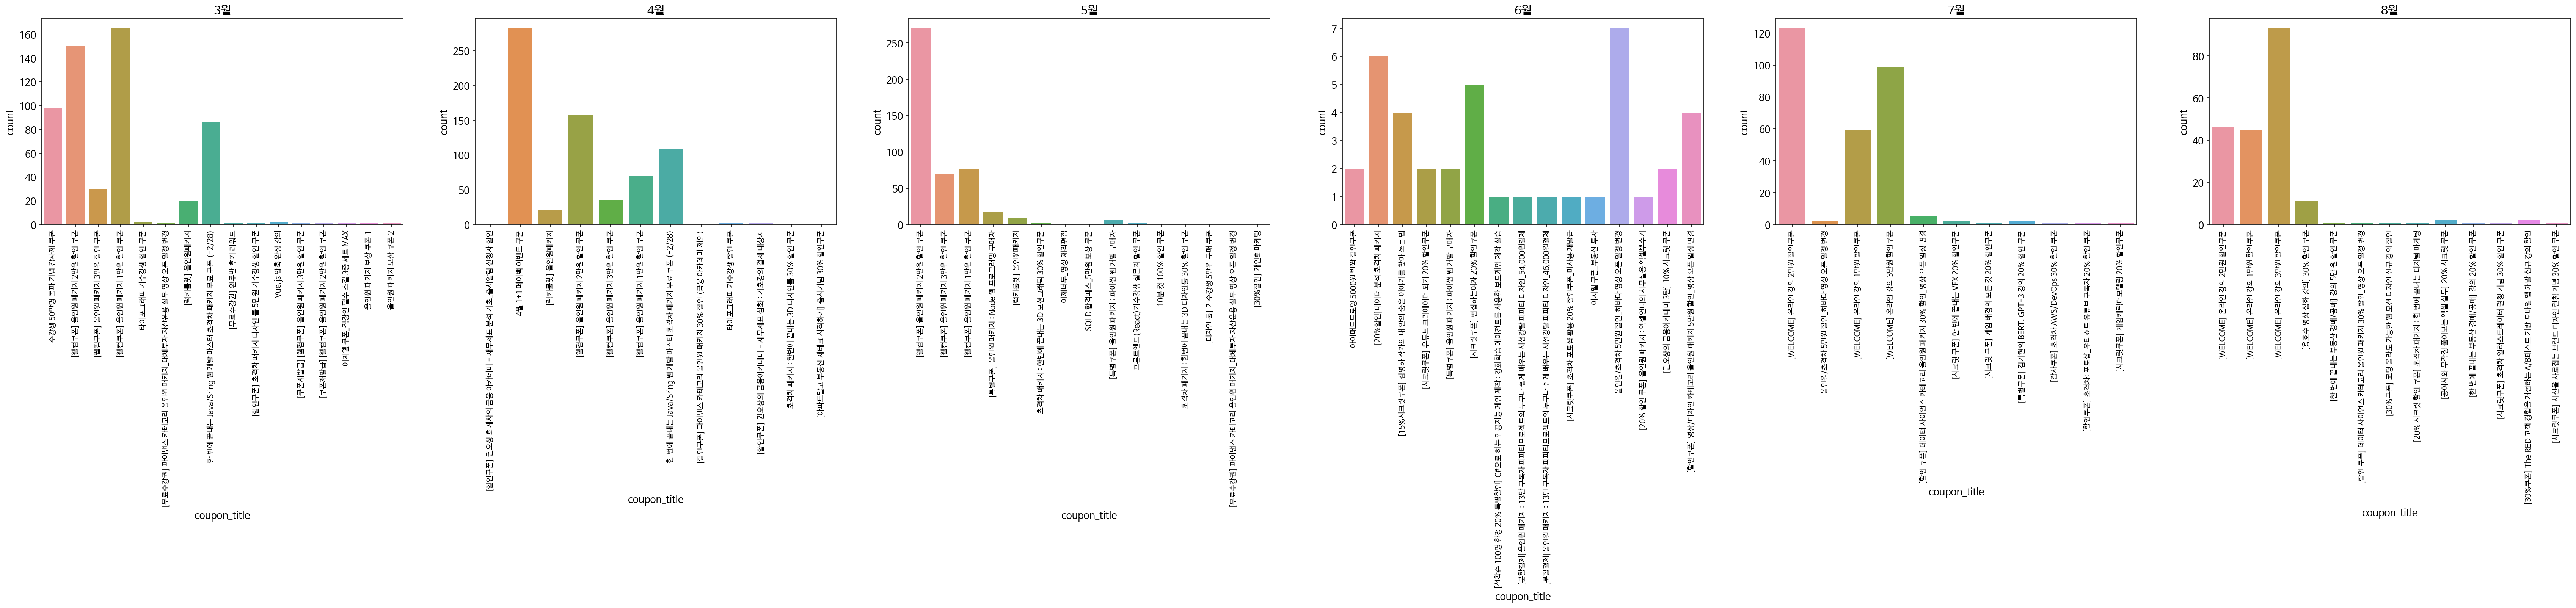

In [ ]:
plt.figure(figsize=(70,5))
for i in range(3,9):
    plt.subplot(1,7,i-2)
    plt.xticks(size=10, rotation = 90)
    plt.title(f'{i}월')
    if i%2 == 0:
        sns.countplot(x=pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-30')]['coupon_title'],data=pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-30')])
    else:
        sns.countplot(x=pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-31')]['coupon_title'],data=pt[(pt['vip']==False)&(pt['completed_at']==f'2021-0{i}-31')])

-  6월 말의 경우 가장 높은 판매량을 기록했지만 그에 비해 쿠폰사용량은 제일 적다. 
- 위 그래프로 보아 쿠폰이 구매의 영향을 끼치지 않을 수 있다 라는 생각이 들지만 위 분석으로 판단하기에 섣부름.
- 달 단위로 데이터를 정리하여 구매와 쿠폰사용의 관계 확인

#### 월단위 completed_at 과 coupon_title의 관계 분석

In [ ]:
# 결제 데이터 달단위 분석.(따로 카피데이터 사용)
import copy

mon = copy.copy(pt)

In [ ]:
def func_m(x):
    return x[:7]

mon["completed_at"] = mon["completed_at"].apply(func_m)

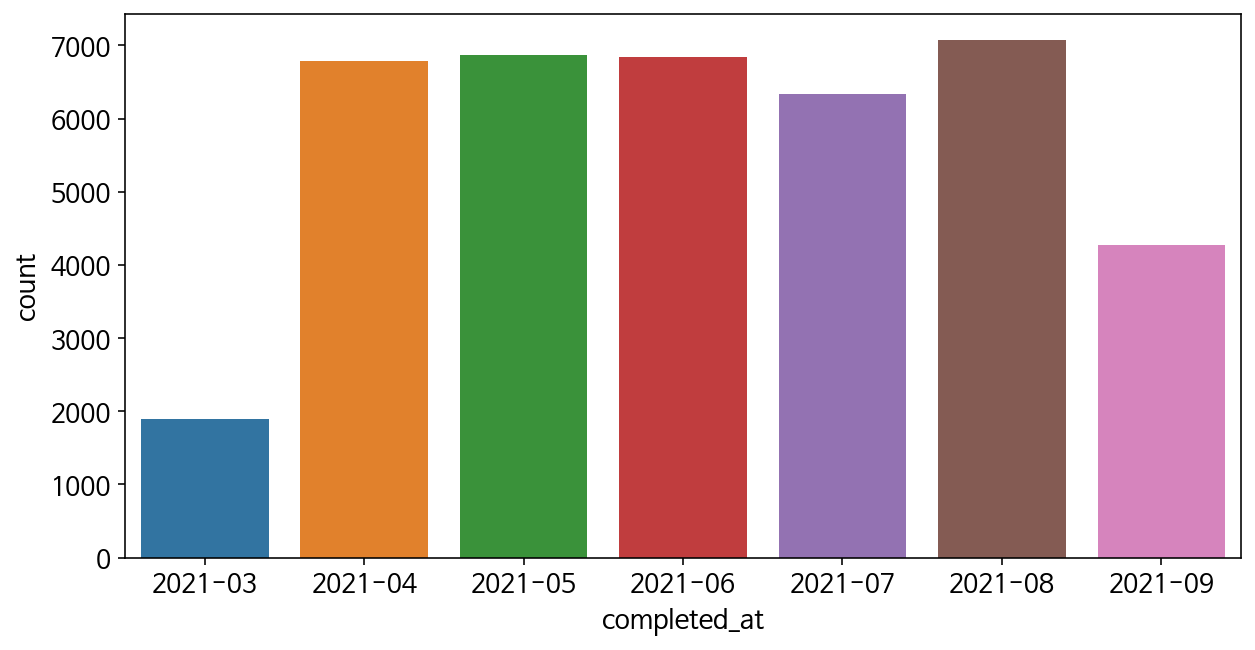

In [ ]:
# 3월 전체, 9월 말 (25일 이후) 데이터는 특정 구간이 생략되어 있음, 해석 시 주의 요망 
plt.figure(figsize=(10,5))
sns.countplot(x=mon[mon['vip']==False]['completed_at'],data=mon)
plt.show()

In [ ]:
# 매월 쿠폰사용
plt.figure(figsize=(110,5))
for i in range(3,9):
    plt.subplot(1,7,i-2)
    plt.xticks(rotation = 90)
    plt.title(f'{i}월')
    sns.countplot(x=mon[(mon['vip']==False)&(mon['completed_at']==f'2021-0{i}')]['coupon_title'],data=mon[(mon['vip']==False)&(mon['completed_at']==f'2021-0{i}')])

Output hidden; open in https://colab.research.google.com to view.

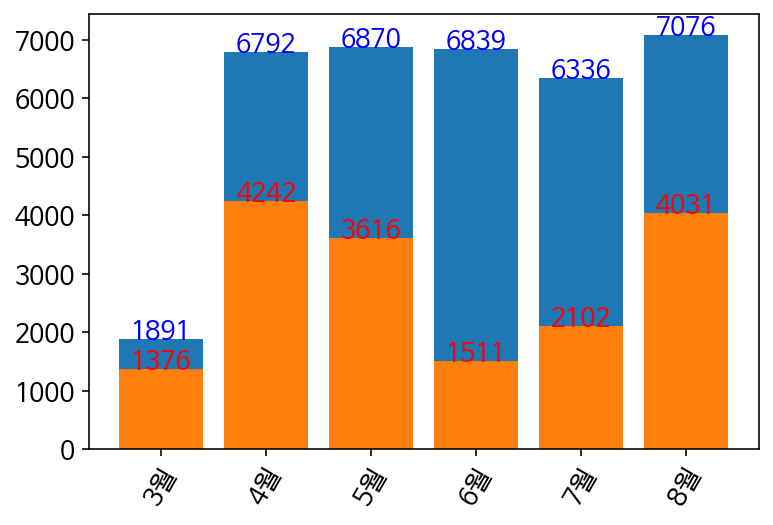

In [ ]:
x_m= [] # 날짜
y_m= [] # 총 구매량
y1_m= [] # 쿠폰사용 구매량
for i in range(3,9):
        x_m.append(f'{i}월')
        y_m.append(len(mon[(mon['vip']==False)&(mon['completed_at']==f'2021-0{i}')]))
        y1_m.append(len(mon[(mon['vip']==False)&(mon['completed_at']==f'2021-0{i}')].dropna(subset=['coupon_title'])))

bar3 = plt.bar(x_m,y_m, label= "전체")
bar4 = plt.bar(x_m,y1_m, label= "쿠폰 사용")
plt.xticks(rotation=60)

for idx, rect in enumerate(bar3):
    plt.text(idx, rect.get_height()+ 0.5,y_m[idx], ha= 'center', color= 'blue')
    
for idx, rect in enumerate(bar4):
    plt.text(idx, rect.get_height()+ 0.5,y1_m[idx], ha= 'center', color= 'red')

- 위 데이터를 토대로 쿠폰의 마케팅 영향은 그리 크지 않다고 생각됨.(있으면 사용하고 없어도 구매를 하는 것으로 보임)
- 높았던 올인원에 포함되어있던 프로그래밍 카테고리가 영향이 있었을 것이라 생각되어 분석 진행

#### format 과 course_title 분석

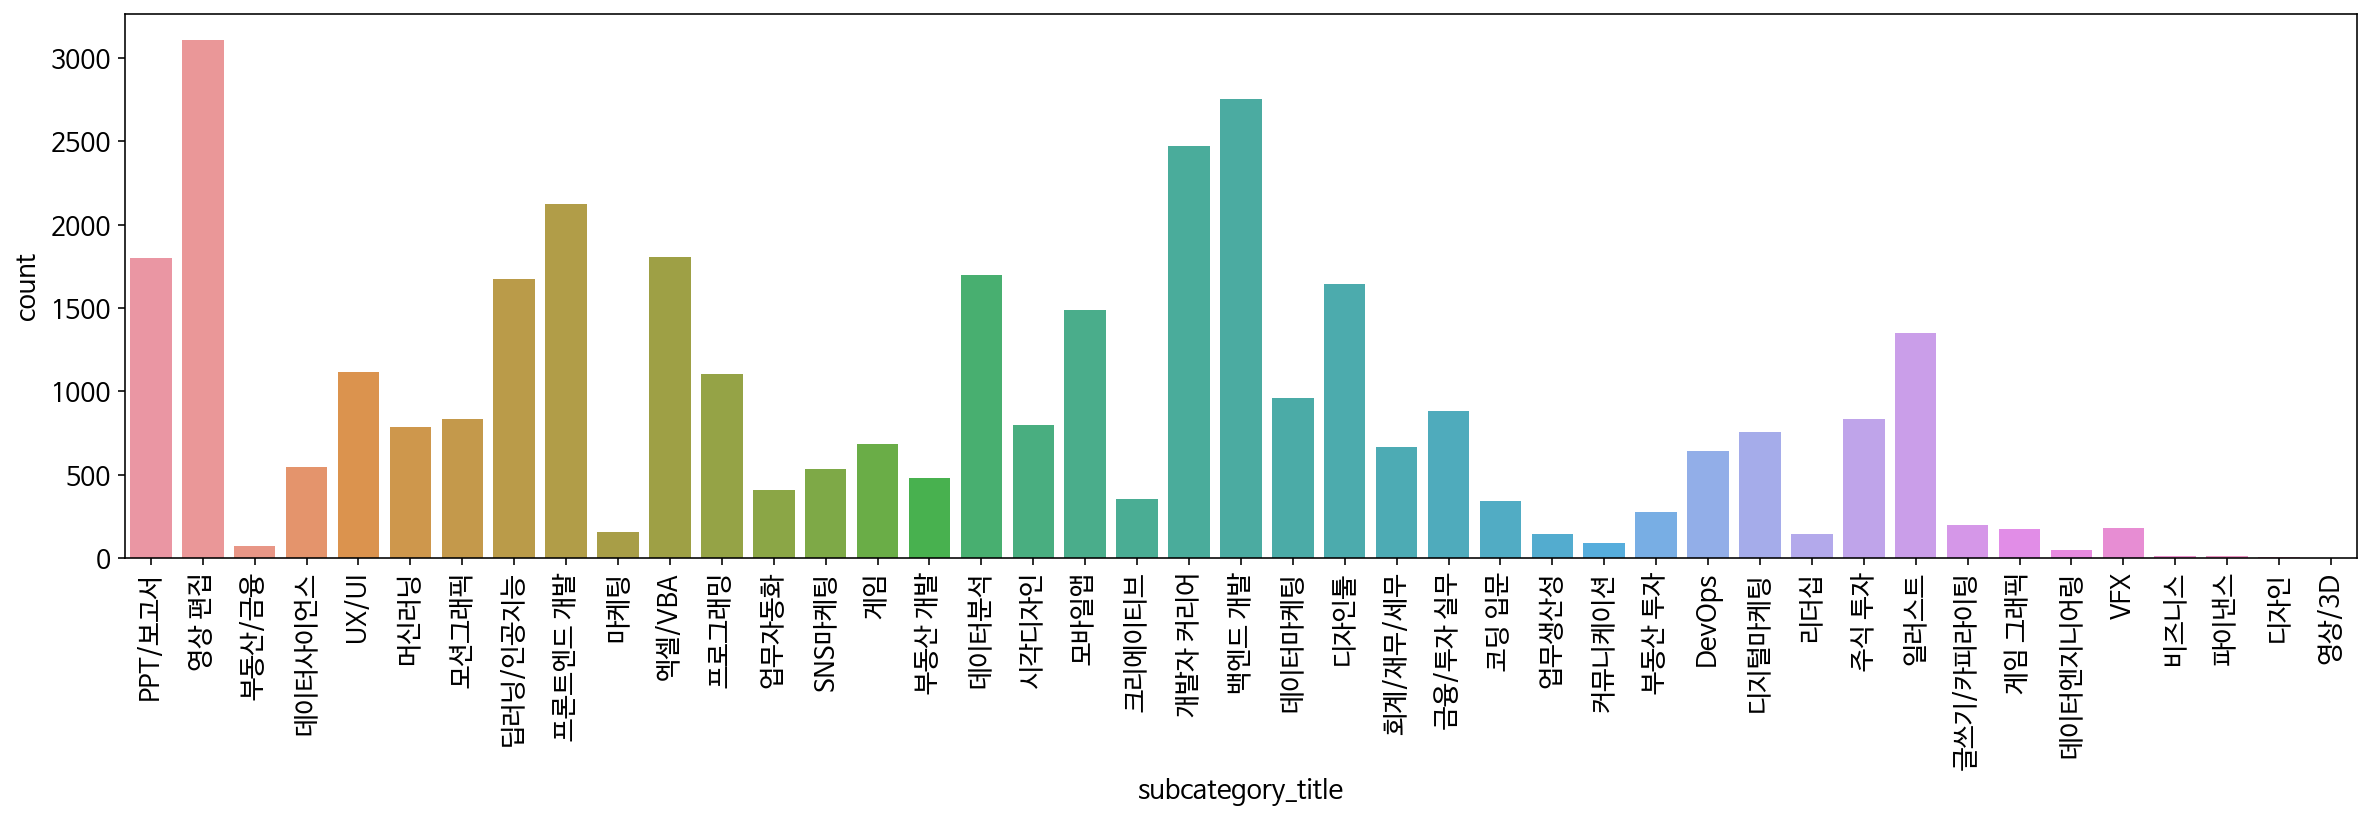

In [ ]:
pt[(pt['vip']==False)&(pt['format']=='올인원')]['subcategory_title']


plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.countplot(x=pt[(pt['vip']==False)&(pt['format']=='올인원')]['subcategory_title'],data=pt)
plt.show()

In [ ]:
plt.figure(figsize=(100,5))
plt.xticks(rotation = 90)
sns.countplot(x=pt[(pt['vip']==False)&(pt['format']=='올인원')]['course_title'],data=pt)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pt[(pt['vip']==False)&(pt['format']=='올인원')]['revenue'].mean()

117603.12643550932

vip가 아닌 고객들이 구매한 Top 3 강의명을 기준으로 평균가격  -> 신규고객 또는 기존고객이 강의를 구매할 때 부담이 없을 것이라 판단

In [ ]:
# 영상 촬영 편집 강의의 평균구매가격
a= int(pt[(pt['vip']==False)&(pt['format']=='올인원')&(pt['course_title']=='초격차 패키지 : 한번에 끝내는 영상 촬영과 편집')]['revenue'].mean())
# 프론트엔드 강의의 평균구매가격
b= int(pt[(pt['vip']==False)&(pt['format']=='올인원')&(pt['course_title']=="초격차 패키지 : 한 번에 끝내는 프론트엔드 개발")]['revenue'].mean())
# 웹 개발 강의의 평균구매가격
c= int(pt[(pt['vip']==False)&(pt['format']=='올인원')&(pt['course_title']=='초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터')]['revenue'].mean())

print('올인원 Top 3 강의 평균 구매가격:',(a+b+c)/3,'원')

올인원 Top 3 강의 평균 구매가격: 98096.0 원


### 결론

- 주어진 데이터 분석 결과, 쿠폰 사용이 적었던 달에도 구매율이 눈에 띄게 낮지 않았음 -> '쿠폰의 영향이 적다' 라고 판단 -> 주어진 데이터에서는 쿠폰 보단 다른 조건 (강의와 가격)이 더 관계가 있는 것으로 보임
- 약 6개월 기준(21.03~09)으로 올인원 포맷의 강의가 가장 인기가 좋으며, 그 중 강의 top 3(1,000명 이상 구매한 강의)의 평균 구매가격은 약 10만원
- 21년 9월 이후로 위와 같은 인기있는 강의의 카테고리와 가격대를 형성하여 판매한다면 신규고객과 기존고객의 유치하기에 적합해 보임

- **올인원 타이틀을 앞세워 강의를 판매하는 전략이 유효하다.**

## 일반 고객 늘리기 (2)

**쿠폰 사용에 따른 분석**

In [ ]:
pt.loc[pt['vip']==True,'vip'] = "VIP"
pt.loc[pt['vip']==False,'vip'] = "Normal"
t = pt[~pt["coupon_title"].isnull()]
t2 = pt[pt["coupon_title"].isnull()]

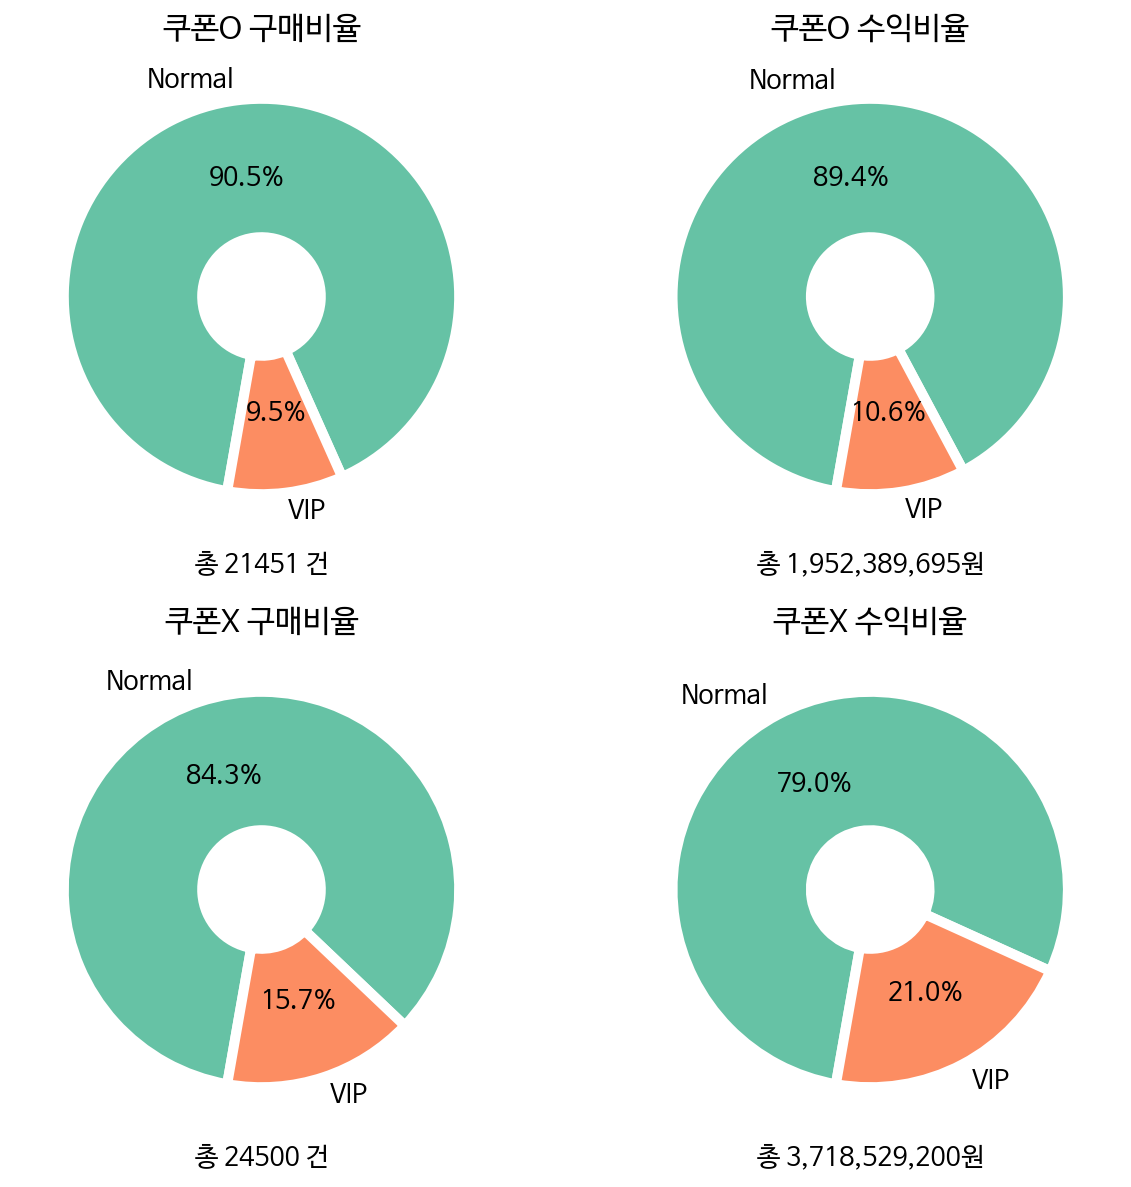

In [ ]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('Set2')[0:8]

t3 = t.groupby("vip").agg({"id": "count", "revenue": "sum"})
plt.subplot(2,2,1)
plt.title("쿠폰O 구매비율")
plt.pie(t3['id'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t3['id'].sum()} 건")

plt.subplot(2,2,2)
plt.title("쿠폰O 수익비율")
plt.pie(t3['revenue'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t3['revenue'].astype(int).sum():,}원")

t3 = t2.groupby("vip").agg({"id": "count", "revenue": "sum"})
plt.subplot(2,2,3)
plt.title("쿠폰X 구매비율")
plt.pie(t3['id'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t3['id'].sum()} 건")

plt.subplot(2,2,4)
plt.title("쿠폰X 수익비율")
plt.pie(t3['revenue'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t3['revenue'].astype(int).sum():,}원")

plt.show()

- 쿠폰 거래데이터 중 구매비율은 VIP 9.5%, 일반고객 90.5%이다
- 쿠폰 거래데이터 중 수익비율은 VIP 10.6%, 일반고객 89.4%이다
- 참고로 고객 비율은 VIP가 4.66%이다

### 일반고객 카테고리별 비율

- 쿠폰 미사용

In [ ]:
t = pt[pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
t2 = t.groupby("category_title").agg({"id": "count", "revenue": "sum"})
t2.drop(["비즈니스", "지식콘텐츠", "파이낸스"], inplace=True) # 비즈니스 15건, 지식콘텐츠 14건, 파이낸스 12건
t2

id      revenue
category_title                   
데이터사이언스         2662  416284900.0
디자인             2026  307387700.0
마케팅             2610  370433400.0
부동산/금융          1148  230437500.0
업무생산성           3393  302852700.0
영상/3D           1906  273969600.0
크리에이티브           376   95799400.0
투자/재테크           407  105265500.0
프로그래밍           6095  825216700.0

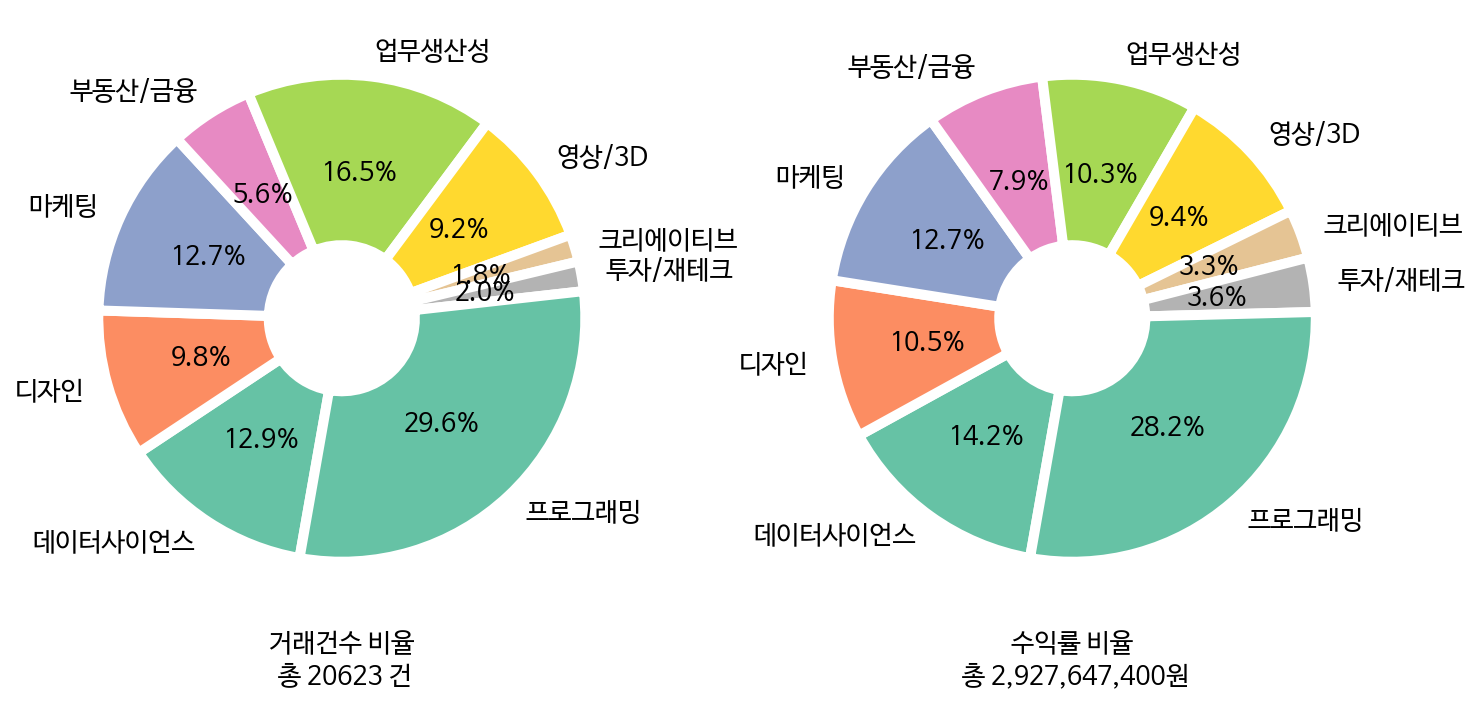

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t2['id'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"거래건수 비율\n 총 {t2['id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t2['revenue'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"수익률 비율\n 총 {t2['revenue'].astype(int).sum():,}원")

plt.show()

**일반고객 쿠폰미사용**
- 거래데이터 중 카테고리별 거래량은 프로그래밍 > 업무생산성 > 데이터사이언스 순으로 많다
- 거래데이터 중 카테고리별 수익은 프로그래밍 > 데이터사이언스 > 마케팅 순으로 많다
- 프로그래밍이 수익비율이 거래건수 비율보다 적은걸보니 평균적으로 강의가 싼 편이다

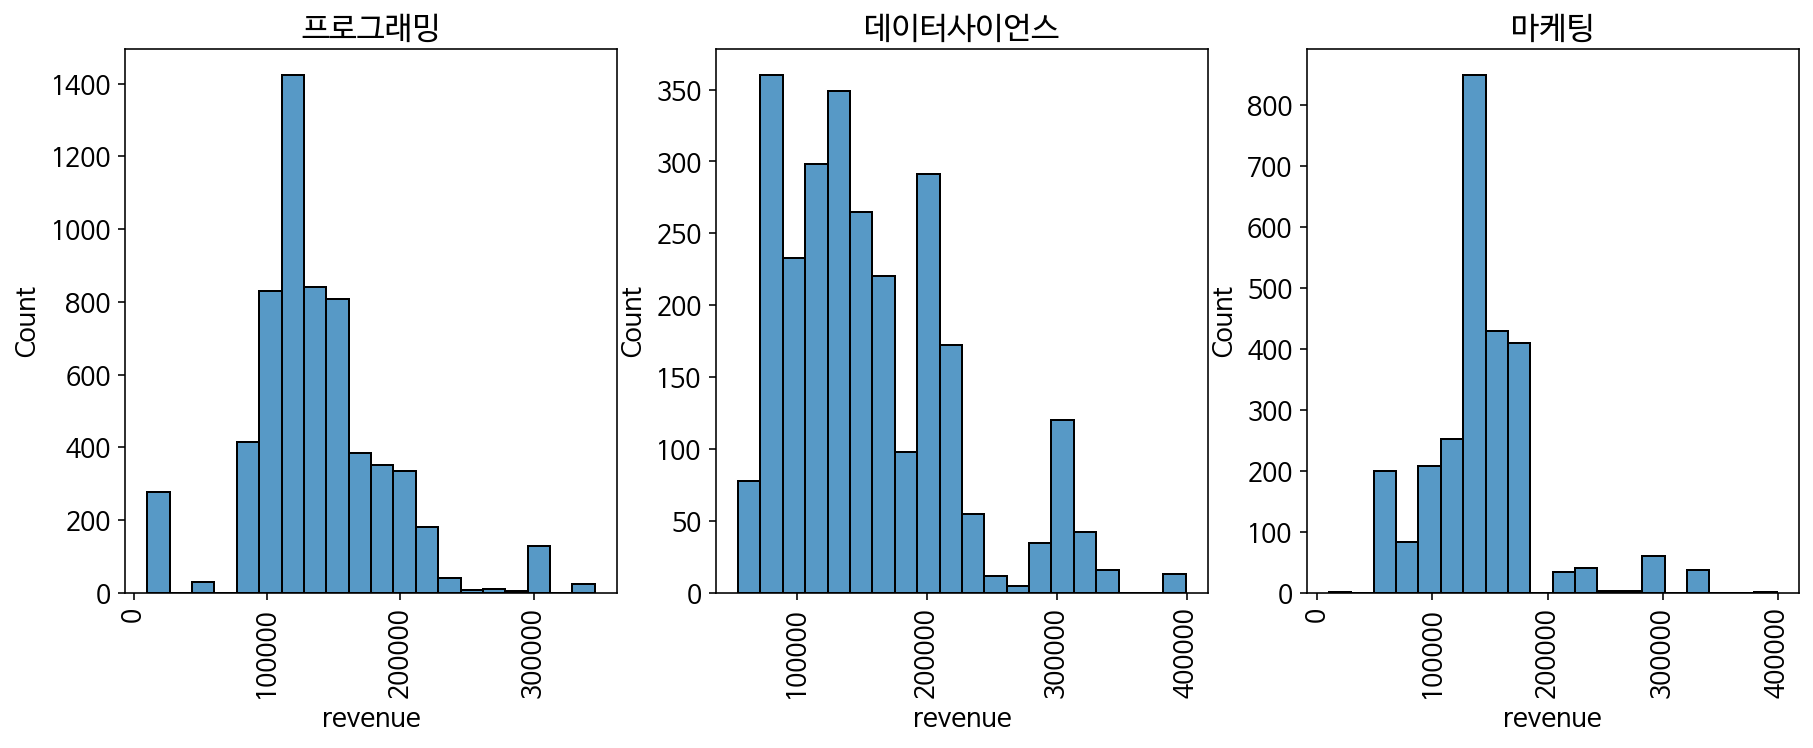

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 3, 1)
t2 = t[t['category_title']=='프로그래밍']
plt.title("프로그래밍")
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

plt.subplot(1, 3, 2)
t2 = t[t['category_title']=='데이터사이언스']
plt.title("데이터사이언스")
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

plt.subplot(1, 3, 3)
t2 = t[t['category_title']=='마케팅']
plt.title("마케팅")
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

In [ ]:
t[t['category_title']=='프로그래밍']['revenue'].mean()

135392.40360951598

In [ ]:
t[t['category_title']=='데이터사이언스']['revenue'].mean()

156380.5033809166

In [ ]:
t[t['category_title']=='마케팅']['revenue'].mean()

141928.50574712644

- 쿠폰 미사용 거래데이터 중 수익량은 15만 정도에 분포하다
- 거래 가격은 데이터사이언스 > 마케팅 > 프로그래밍 순으로 높다

- 쿠폰 사용

In [ ]:
t = pt[~pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
t2 = t.groupby("category_title").agg({"id": "count", "revenue": "sum"})
t2.drop(["비즈니스", "지식콘텐츠"], inplace=True) # 비즈니스 3건, 지식콘텐츠 1건
t2

id      revenue
category_title                   
데이터사이언스         2274  197571200.0
디자인             2879  317568620.0
마케팅             1353  110505155.0
부동산/금융           960  115651950.0
업무생산성           2340  187682975.0
영상/3D           2607  241862300.0
크리에이티브            19    1268600.0
투자/재테크           702  118909000.0
프로그래밍           6283  454700490.0

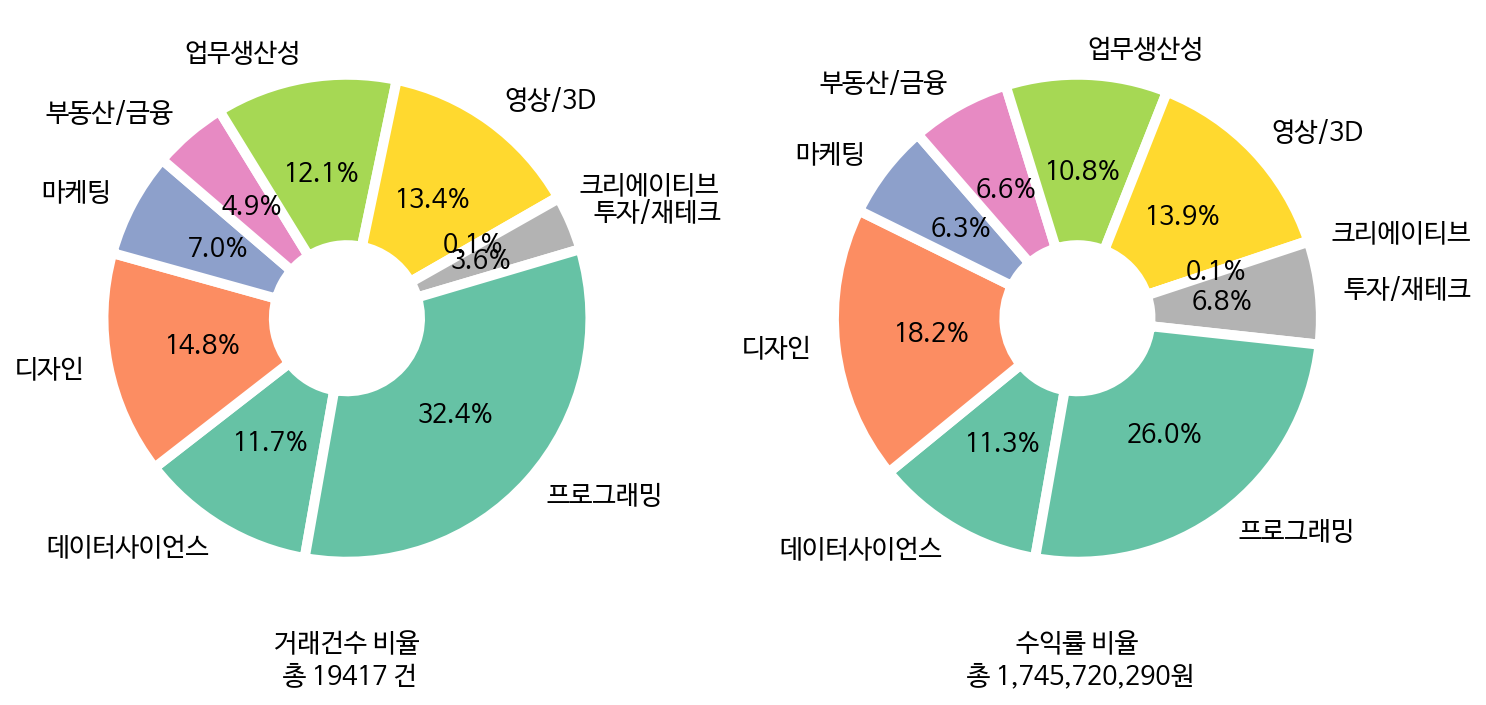

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t2['id'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"거래건수 비율\n 총 {t2['id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t2['revenue'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"수익률 비율\n 총 {t2['revenue'].astype(int).sum():,}원")

plt.show()

**일반고객 쿠폰사용**
- 거래데이터 중 카테고리별 거래량은 프로그래밍 > 디자인 > 영상/3D 순으로 많다
- 거래데이터 중 카테고리별 수익은 프로그래밍 > 디자인 > 영상/3D 순으로 많다
- 프로그래밍이 수익비율이 거래건수 비율보다 적은걸보니 평균적으로 가격이 싸거나 할인이 많은 것으로 예상

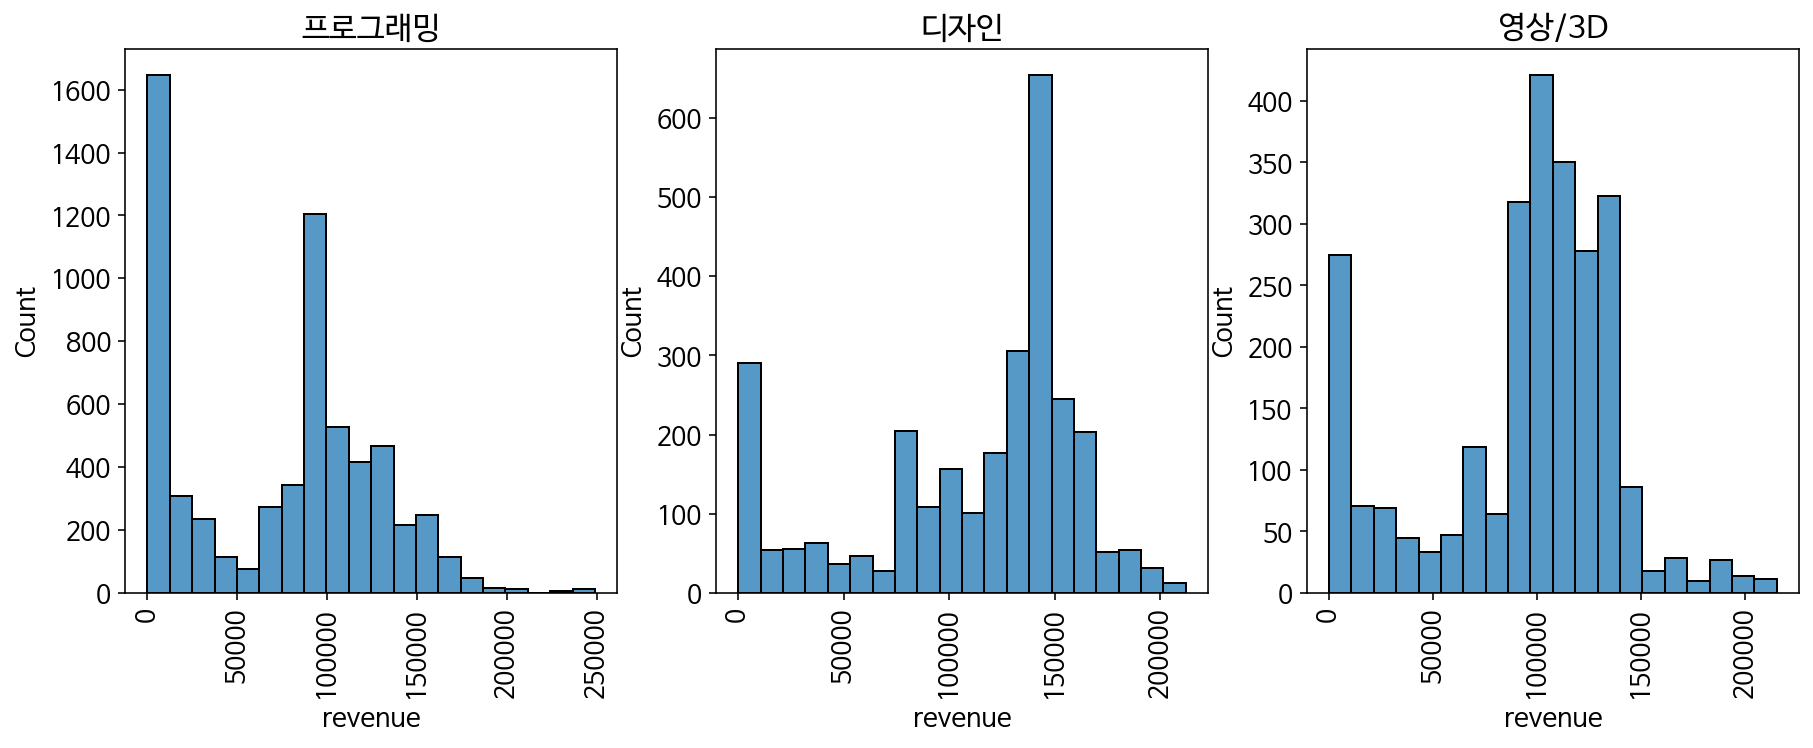

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 3, 1)
t2 = t[t['category_title']=='프로그래밍']
plt.title('프로그래밍')
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

plt.subplot(1, 3, 2)
t2 = t[t['category_title']=='디자인']
plt.title('디자인')
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

plt.subplot(1, 3, 3)
t2 = t[t['category_title']=='영상/3D']
plt.title('영상/3D')
plt.xticks(rotation='vertical')
sns.histplot(t2, x="revenue", bins=20)

In [ ]:
t[t['category_title']=='프로그래밍']['revenue'].mean()

72369.96498487983

In [ ]:
t[t['category_title']=='디자인']['revenue'].mean()

110305.18235498437

In [ ]:
t[t['category_title']=='영상/3D']['revenue'].mean()

92774.18488684311

- 쿠폰 거래데이터 중 수익량 Top3에서 평균 강의가격은 디자인 > 영상/3D > 프로그래밍 순이다
- 프로그래밍에서 쿠폰 미사용 강의와 가격차이가 별로 안나는걸 보니 5~10퍼 할인쿠폰 사용이 많다고 유추가능

### 1개 강의 구매 vs 2개 이상 구매

In [ ]:
t = pt[~pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
t2 = t.groupby("customer_id").agg({"id": "count", "revenue": "sum"})
t3 = pt[pt["customer_id"].isin(t2.index)]

In [ ]:
t2 = t3.groupby("customer_id").agg({"id": "count", "revenue": "sum"})

In [ ]:
def func(x):
    if x>=2:
        return "나머지"
    else:
        return "1개구매"
t2["buy"] = t2['id'].apply(func)

In [ ]:
t3 = t2.groupby("buy").agg({"id": "count", "revenue": "sum"})
t3

id       revenue
buy                      
1개구매  12935  1.295708e+09
나머지    3869  7.729333e+08

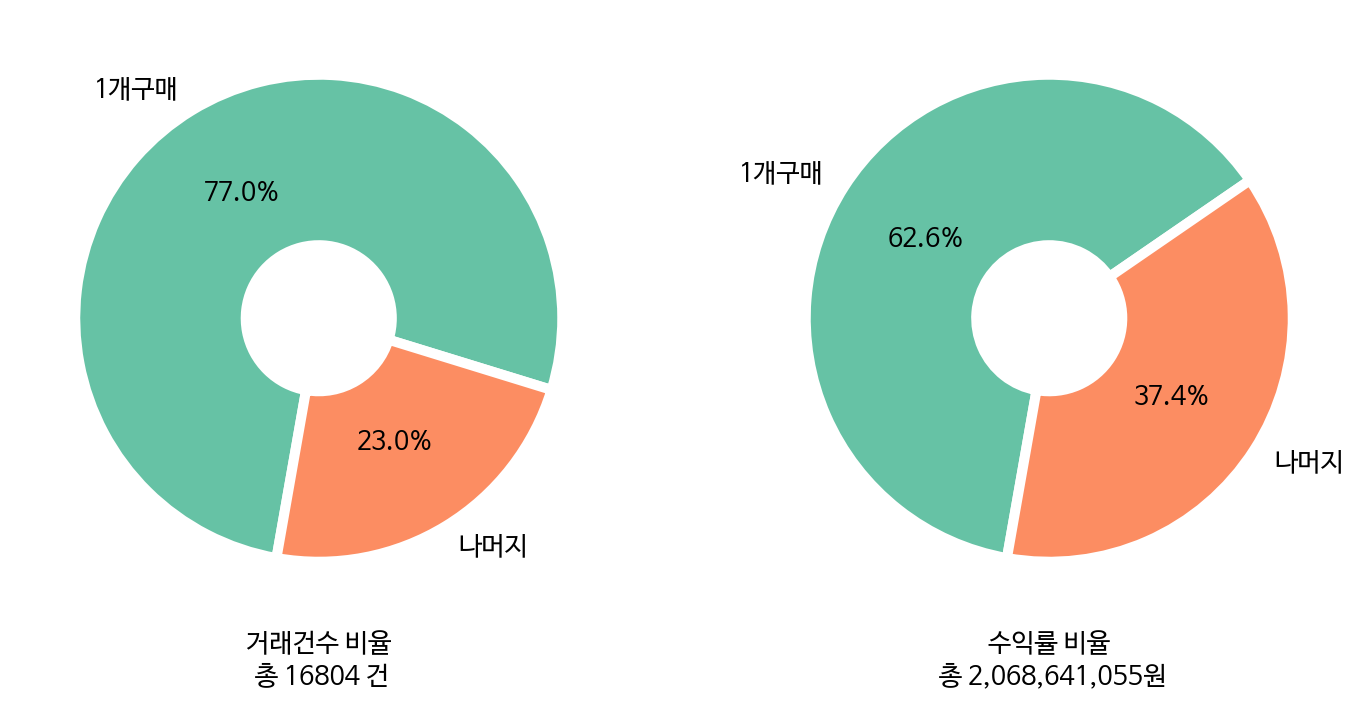

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t3['id'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"거래건수 비율\n 총 {t3['id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t3['revenue'], labels=t3.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"수익률 비율\n 총 {t3['revenue'].astype(int).sum():,}원")

plt.show()

- 3/4 이상의 고객이 강의를 1개만 구입했음
- 1개만 더 구매하게 해도 충분히 매출이 상승할 것으로 예상

### 월별 쿠폰

In [ ]:
t = pt[~pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
def func(x):
    if "2021-04-01"<=x and x<"2021-05-01":
        return "4월"
    elif "2021-05-01"<=x and x<"2021-06-01":
        return "5월"
    elif "2021-06-01"<=x and x<"2021-07-01":
        return "6월"
    elif "2021-07-01"<=x and x<"2021-08-01":
        return "7월"
    elif "2021-08-01"<=x and x<"2021-09-01":
        return "8월"
    elif "2021-09-01"<=x and x<"2021-10-01":
        return "9월"
    else:
        return "나머지"

t["coupon_month"] = t['completed_at'].apply(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


- 쿠폰 사용 월별 비율

In [ ]:
t2 = t.groupby('coupon_month').agg({"revenue": "sum", "id": "count"})
t2.drop("나머지", inplace=True)
t2

revenue    id
coupon_month                   
4월            295855795.0  4242
5월            325842780.0  3616
6월             77939980.0  1511
7월            247955950.0  2102
8월            462762750.0  4031
9월            252305700.0  2543

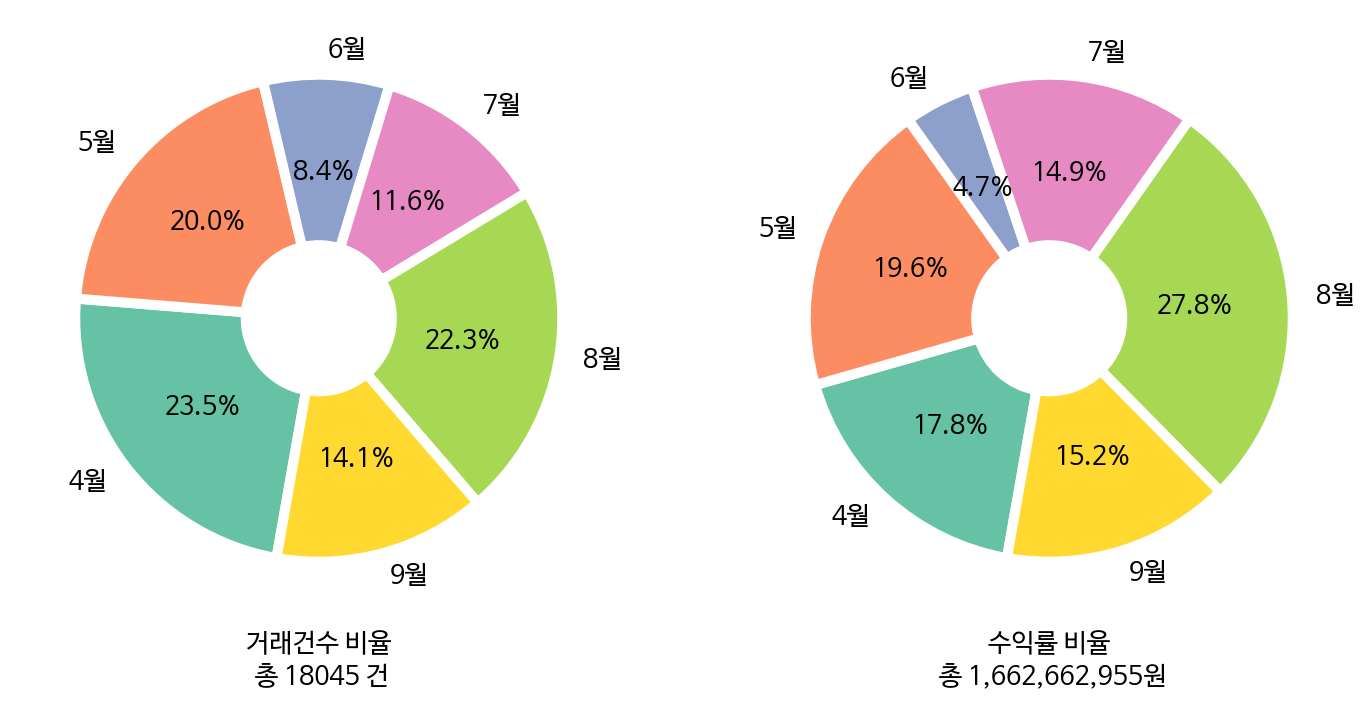

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t2['id'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"거래건수 비율\n 총 {t2['id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t2['revenue'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"수익률 비율\n 총 {t2['revenue'].astype(int).sum():,}원")

plt.show()

- 쿠폰거래데이터가 6월이 나머지 달에 비해 수요가 없다
- 쿠폰을 사용하지 않았을 떄 어떤지 확인해보자

- 예상과 다르게 쿠폰 미사용 데이터 중 6월이 가장 많다
- 수입 극대화 전략

### 'x월' 쿠폰

- 쿠폰 이름에 'X월'이 포함된 쿠폰 거래 데이터 분석

In [ ]:
t = pt[~pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
def func(x):
    if x.startswith("4월"):
        return "4월"
    elif x.startswith("5월"):
        return "5월"
    elif x.startswith("6월"):
        return "6월"
    elif x.startswith("7월"):
        return "7월"
    elif x.startswith("8월"):
        return "8월"
    else:
        return "해당없음"

t["coupon_month"] = t['coupon_title'].apply(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
t2 = t.groupby('coupon_month').agg({"revenue": "sum", "id": "count"})
t2.drop("해당없음", inplace=True)
t2

revenue    id
coupon_month                  
4월            18235700.0  1042
5월            15365780.0   865
6월             9389200.0   135
7월            18123950.0   788
8월            26377650.0  1024

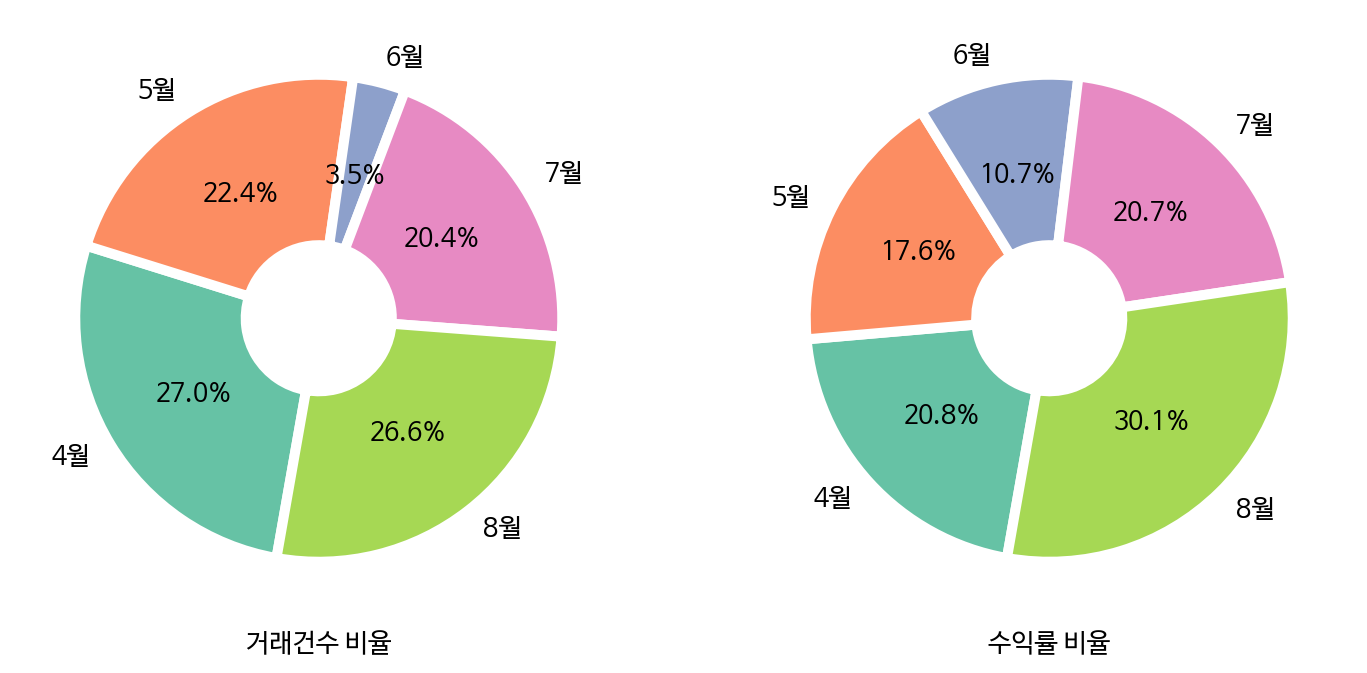

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2')[0:6]

plt.subplot(1,2,1)
plt.pie(t2['id'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"거래건수 비율")

plt.subplot(1,2,2)
plt.pie(t2['revenue'], labels=t2.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"수익률 비율")

plt.show()

- 6월은 나머지달과 거래량 차이가 5배이상 나지만 실제 수익량 차이가 별로 없다
- 6월에 전체적으로 쿠폰을 사용한 데이터가 없다
- 6월이 수입이 많아서 1+1 페이백 이벤트 등 쿠폰 이벤트를 안한거같다

- 4월과 8월 거래건수는 비슷한데 수익차이가 약 1.85배난다 <br>
 -> **4월, 8월 데이터 집중 분석**

In [ ]:
# 'X월' 쿠폰
print(t[t["coupon_month"] == '4월']['coupon_title'].value_counts())
print()
print(t[t["coupon_month"] == '5월']['coupon_title'].value_counts())
print()
print(t[t["coupon_month"] == '6월']['coupon_title'].value_counts())
print()
print(t[t["coupon_month"] == '7월']['coupon_title'].value_counts())
print()
print(t[t["coupon_month"] == '8월']['coupon_title'].value_counts())

4월 1+1 페이백 이벤트 쿠폰    1042
Name: coupon_title, dtype: int64

5월 페이백 프로모션 쿠폰        850
5월 5일 어른이날 기념 5%쿠폰     15
Name: coupon_title, dtype: int64

6월 반값특가 프로모션 쿠폰    135
Name: coupon_title, dtype: int64

7월 100% 페이백 프로모션 쿠폰       787
7월 100% 페이백 프로모션 쿠폰_복구      1
Name: coupon_title, dtype: int64

8월 1+1 프로모션 쿠폰    1024
Name: coupon_title, dtype: int64


- '8월'쿠폰이 수익이 더 많은 이유

In [ ]:
t = pt[~pt["coupon_title"].isnull() & (pt["vip"]=='Normal')]

In [ ]:
def func(x):
    if x.startswith("4월"):
        return "4월"
    elif x.startswith("5월"):
        return "5월"
    elif x.startswith("6월"):
        return "6월"
    elif x.startswith("7월"):
        return "7월"
    elif x.startswith("8월"):
        return "8월"
    else:
        return "해당없음"

t["coupon_month"] = t['coupon_title'].apply(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
t3 = t[(t['coupon_month']=="4월")|(t['coupon_month']=="8월")]

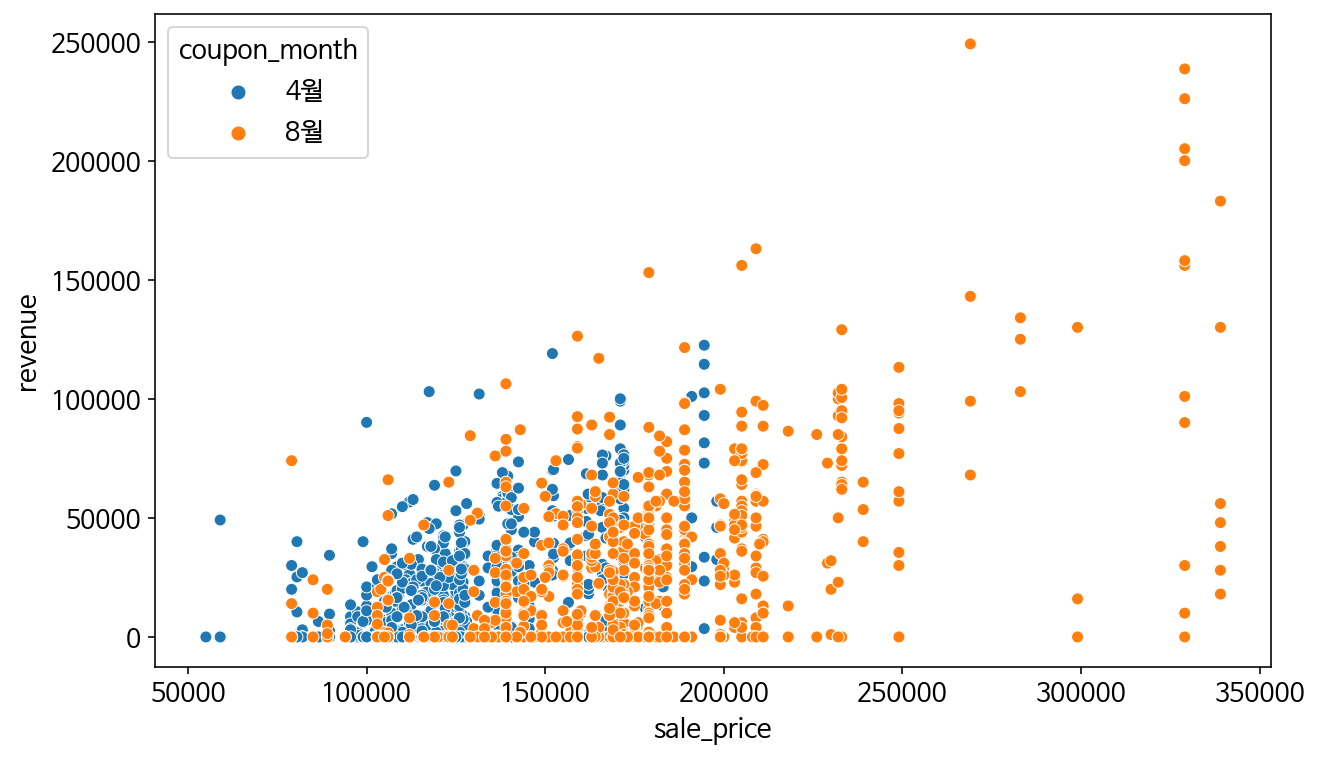

In [ ]:
# 4월, 8월의 'X월' 쿠폰 사용 빈도
plt.figure(figsize=(10,6))
sns.scatterplot(data=t3, x="sale_price", y="revenue", hue="coupon_month")

- 8월이 4월에 비해 상대적으로 비싼 강의가 많이 팔림
- 8월의 경우 비싼 강의에 1+1 프로모션 이벤트를 진행함

### 결론
1. 쿠폰 거래 데이터 중 강의 1개만 구매한 고객의 수익이 강의 2개 이상 구매한 고객의 수익보다 약 1.8배 많음 <br>
  -> 단일 쿠폰 구매 고객의 수입이 좋음
2. 월별 쿠폰사용, 쿠폰 미사용 거래 데이터 중 6월이 반대 성향을 띔 <br> -> 6월은 거래량이 많아서 쿠폰이벤트를 안 한 것으로 예상 <br>
  -> 실제로 월별 페이백 이벤트에서 6월은 페이백 이벤트를 진행하지 않음
3. 쿠폰 거래 데이터 중 4월과 8월은 거래량은 비슷한데 수익이 1.5배 차이남 <br> -> 분포도를 그려보니 8월이 4월에 비해 비싼 강의에 쿠폰이 많이 사용됨 <br>     -> 비싼 강의에 이벤트를 많이하면 수익도 많아짐

## 기타고객 분석
- b2b, b2g, 패스트 캠퍼스 내부 강의 (온라인 완주반, 캠프, school)
- 사업을 따내야 하거나, 자체 프로그램 운영 필요 <br>     -> 일반 고객들과는 다름
- 이들을 분석하고 일반 고객으로 전환시키는 전략 수립


*   사업 = b2b + b2g
*   프로그램 = 온라인 완주반 + 캠프 + school



### 사업/프로그램 분석

In [ ]:
# 사업, 프로그램별 구매데이터 합치기
df_b2 = pd.concat([df_b2b, df_b2g])
df_program = pd.concat([df_finish, df_camp, df_school])

In [ ]:
df = pd.concat([pt, df_b2, df_program]).sort_values(by=["id"])

In [ ]:
t = df_program.groupby("customer_id").agg({"revenue": "sum", "id": "count"})
t[(t["revenue"]>=400000)].sort_values(by=["revenue", "id"], ascending=False)

revenue  id
customer_id               
509993       1902600.0   2
42009        1821000.0   2
29094        1800000.0   1
277943       1620000.0   1
53748        1530000.0   1
...                ...  ..
64646         400000.0   1
120463        400000.0   1
430107        400000.0   1
486036        400000.0   1
505754        400000.0   1

[514 rows x 2 columns]

In [ ]:
# vip고객 분리
t = pt.groupby("customer_id").agg({"revenue": "sum", "id": "count"})
t2 = t[(t["revenue"]>=400000)].sort_values(by=["revenue", "id"], ascending=False)
t2_r = t[(t["revenue"]<400000)].sort_values(by=["revenue", "id"], ascending=False)
t2

revenue  id
customer_id               
98685        7040750.0  53
50769        4805950.0  38
40783        4424095.0  34
20784        3445050.0  26
72501        3235150.0  20
...                ...  ..
661840        401000.0   2
526317        400500.0   4
644372        400500.0   3
457708        400200.0   4
71588         400000.0   2

[1561 rows x 2 columns]

In [ ]:
# vip 고객 라벨링
def func(x):
    if x in t2.index:
        return "vip"
    else:
        return "normal"

pt['vip'] = pt["customer_id"].apply(func)

In [ ]:
# 사업, 프로그램 라벨링
df_b2['vip'] = "사업"
df_program['vip'] = "프로그램"

In [ ]:
t5 = df.groupby('vip').agg({"id": "count", "revenue": "sum"})

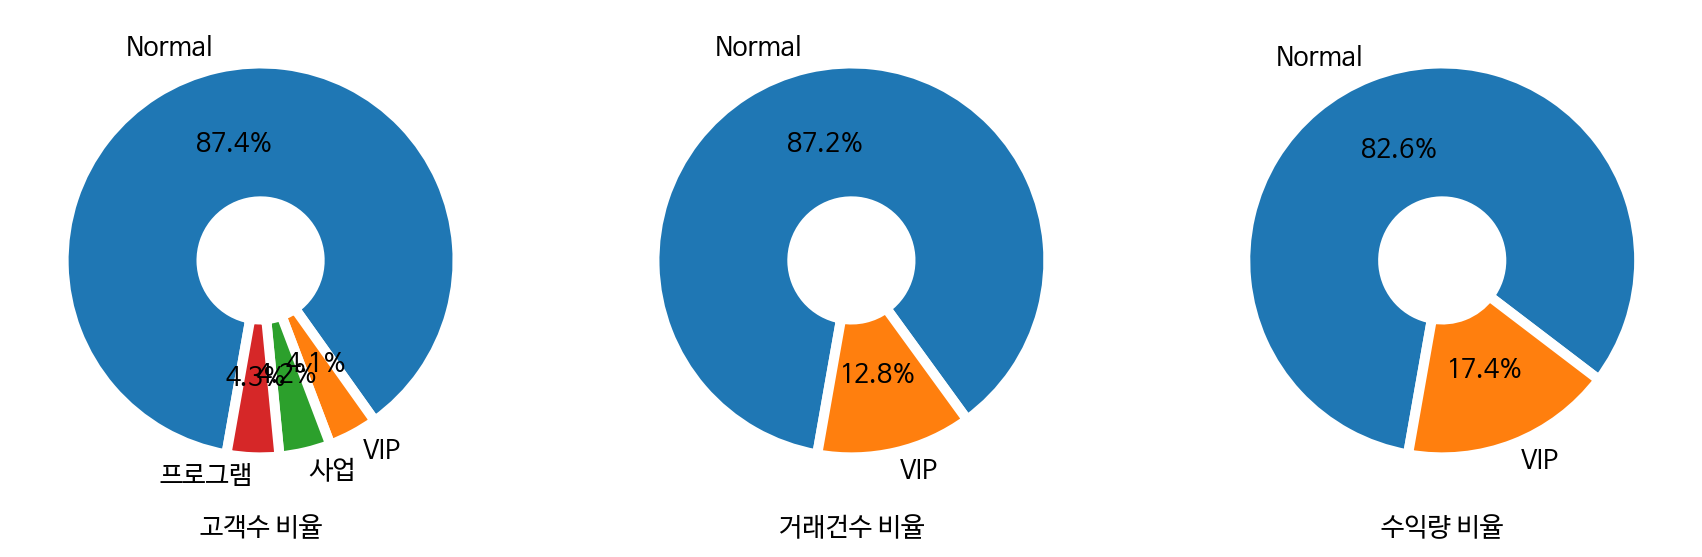

id       revenue
vip                        
Normal  40079  4.683223e+09
VIP      5872  9.876963e+08

In [ ]:
# VIP 특징

plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.pie([len(t2_r), len(t2), len(df_b2), len(df_program)], labels=["Normal", "VIP", "사업", "프로그램"], autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("고객수 비율")

plt.subplot(1,3,2)
plt.pie(t5['id'], labels=t5.index, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("거래건수 비율")

plt.subplot(1,3,3)
plt.pie(t5['revenue'], labels=t5.index, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("수익량 비율")

plt.show()
t5

- 프로그램 참여 고객의 비율은 전체 비율중 4.3%, 사업 참여 고객은 4.2%로 매우 낮음
- 반면에 수익에 대해서는 각각 6.6%, 24.6%로 많은 부분을 차지


### 고객전환 분석

- 프로그램(온라인 완주반, 캠프, 스쿨) -> 일반고객



In [ ]:
# 1502명중 450명이 개인고객으로 전환
from_program = pt[pt["customer_id"].isin(df_program["customer_id"])]

In [ ]:
len(df_program["customer_id"].unique())

1502

In [ ]:
len(from_program["customer_id"].unique())

450

프로그램 참여자의 경우 일반고객으로 전환된 사람이 매우 많다.

In [ ]:
# 이중 vip 고객이 된 사람 탐색
len(from_program[from_program["vip"]=="vip"]["customer_id"].unique())

79

In [ ]:
# 프로그램에서 넘어온 모든 구매자들의 첫 구매가 프로그램이였는지 확인
first = pd.DataFrame([])
for id in from_program["customer_id"].unique():
   first = pd.concat([df[df["customer_id"]==id].head(1), first])

In [ ]:
# 온라인 완주반 프로그램을 통해 일반고객으로 전환된 고객이 다수 측정됨
first["format"].value_counts()

온라인 완주반    179
올인원        171
스쿨 온라인      85
RED          6
하루10분컷       6
캠프           1
MBA          1
이벤트          1
Name: format, dtype: int64

- 사업(b2b,b2g) -> 일반고객



In [ ]:
# 1502명중 97명이 개인고객으로 전환
from_b2 = pt[pt["customer_id"].isin(df_b2["customer_id"])]

In [ ]:
len(df_b2["customer_id"].unique())

1502

In [ ]:
len(from_b2["customer_id"].unique())

97

b2사업 결제데이터의 경우

1. 구매자가 단체인 경우와 개인인 경우가 나뉘어져 있음
2. vip 선정시 사업 결제 내역을 포함하지 않음

-> 비율이 상대적으로 적게 나옴

In [ ]:
# b2사업 참여자 중 vip 고객이 된 사람의 수
len(from_b2[from_b2["vip"]=="vip"]["customer_id"].unique())

7

마찬가지로 b2결제 내역까지 합쳐서 vip를 선정했다면 더 많다는 결과가 나왔을 것으로 예상

In [ ]:
# b2 사업에서 넘어온 모든 구매자들의 첫 구매가 b2 사업이였는지 확인
first = pd.DataFrame([])
for id in from_b2["customer_id"].unique():
   first = pd.concat([df[df["customer_id"]==id].head(1), first])

In [ ]:
# 기존 고객인 경우가 대다수
first["format"].value_counts()

올인원        66
B2B        12
B2G         7
하루10분컷      5
RED         3
온라인 완주반     2
B2B 온라인     1
이벤트         1
Name: format, dtype: int64

### 전환고객 분석

- 전환고객 데이터 추출


In [ ]:
df_etc = pd.concat([df_b2, df_program])

In [ ]:
# 사업/프로그램 참여 고객들중 우선 해당 구매가 패스트 캠퍼스에서의 첫 구매인 고객들을 뽑아오자.
first = pd.DataFrame([])

for id in df_etc["customer_id"].unique():
   first = pd.concat([df[df["customer_id"]==id].head(1), first])

lst = ["B2B", "B2G", "B2B 온라인", "온라인 완주반", '캠프', '스쿨 온라인', '스쿨']

etc_new = first[first["format"].isin(lst)]

이렇게 새로 만들어진 데이터에서 새로운 컬럼(moved)을 생성

*   True : 사업/프로그램 고객에서 일반 고객으로 전환
*   False : 사업/프로그램에만 참여



In [ ]:
# 전환고객 추출
from_etc = pt[pt["customer_id"].isin(etc_new["customer_id"])]

In [ ]:
# 라벨링
def func(x):
    if x in from_etc["customer_id"].unique():
        return True
    else:
        return False

etc_new['moved'] = etc_new["customer_id"].apply(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 변환 확인
etc_new["moved"].value_counts()

False    2453
True      285
Name: moved, dtype: int64

In [ ]:
t = pd.pivot_table(data=etc_new, index=["format"], values ="id", columns=["moved"], aggfunc=["count"])
t["ratio"] = t[('count',  True)] / t[('count', False)] *100
t

count             ratio
moved    False   True           
format                          
B2B      258.0   12.0   4.651163
B2B 온라인  921.0    1.0   0.108578
B2G      222.0    7.0   3.153153
스쿨        10.0    NaN        NaN
스쿨 온라인   157.0   85.0  54.140127
온라인 완주반  873.0  179.0  20.504009
캠프        12.0    1.0   8.333333

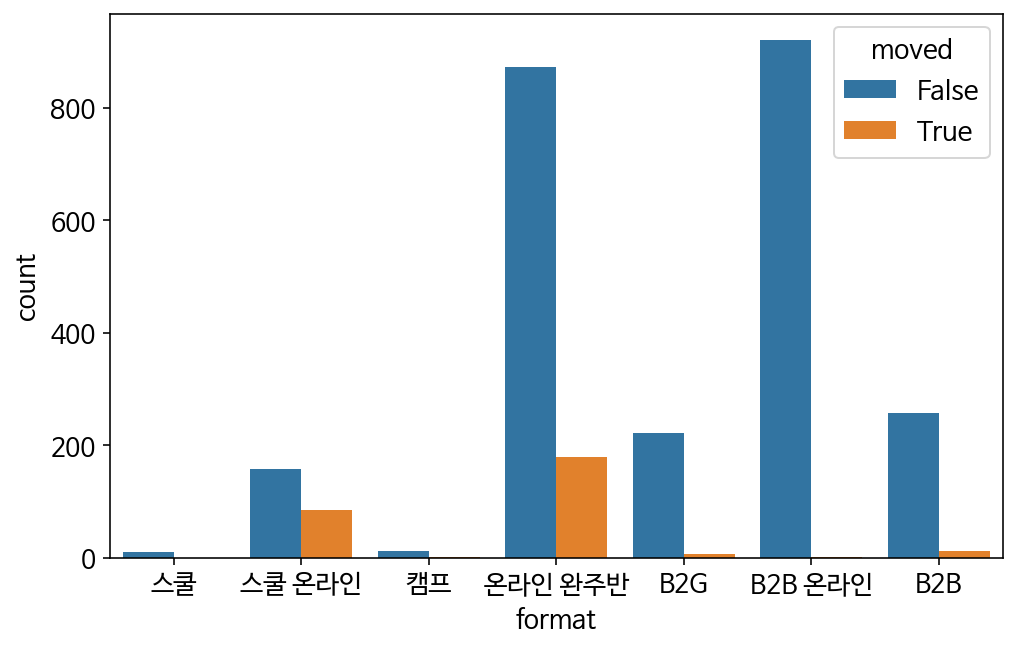

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = etc_new, x="format", hue="moved")
plt.show()

일반고객으로 가장 많은 전환이 이루어진 것은 온라인 완주반(179명)

일반고객으로 가장 많은 비율이 전환된 것은 스쿨 온라인(53.5%)

- 전환고객 카테고리별 분석

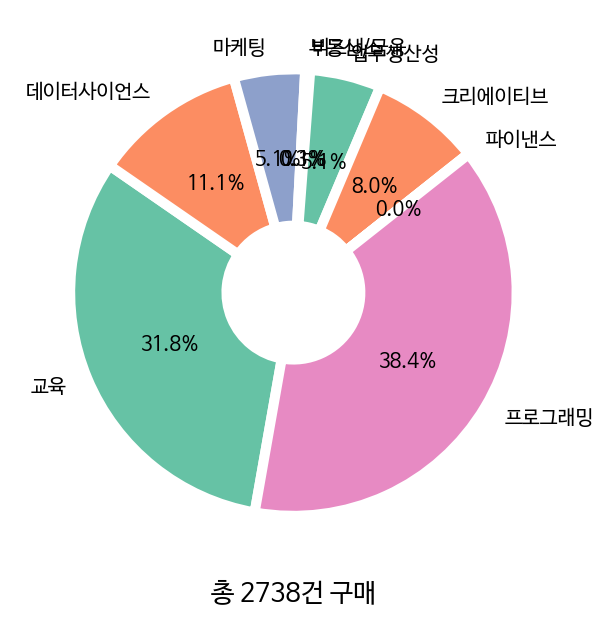

In [ ]:
# 사업/프로그램 구매 데이터 기준 카테고리 분석
t = pd.pivot_table(data=etc_new, index = ['category_title'], values=['id'],  aggfunc = "count").reset_index()
plt.figure(figsize=(5,7))
colors = sns.color_palette('Set2')[0:5]
plt.pie(t['id'], labels=t['category_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, textprops={'fontsize': 10
}, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t['id'].sum()}건 구매")
plt.show()

카테고리 "교육"이 세분화 되지 않고 큰 부분을 차지해 분석의 의미가 크지 않다.

In [ ]:
# 전환고객의 카테고리 분석
pd.pivot_table(data=from_etc, index=["category_title", "subcategory_title"], values=["revenue"], aggfunc=["count", "sum"])

count         sum
                                 revenue     revenue
category_title subcategory_title                    
데이터사이언스        데이터분석                  29   3303650.0
               데이터사이언스                 6   1802000.0
               데이터엔지니어링                8   2273800.0
               딥러닝/인공지능               31   3564800.0
               머신러닝                   12   1559300.0
디자인            UX/UI                   7    881000.0
               디자인툴                    9   1261100.0
               시각디자인                   3    382000.0
               일러스트                    5    695000.0
마케팅            SNS마케팅                  2     75000.0
               글쓰기/카피라이팅               3    424000.0
               데이터마케팅                  5    573500.0
               디지털마케팅                  3    689000.0
               마케팅                     1     45000.0
부동산/금융         금융/투자 실무                4    550100.0
               부동산/금융                  1    299000.0
               회계/재무/세무               10   1735300.0
업무생산성          PPT/보고서                15   1489225.0
               리더십                     4    509400.0
               업무생산성                  13    265825.0
               업무자동화                   7    338500.0
               엑셀/VBA                  9    944000.0
               커뮤니케이션                  1     14200.0
영상/3D          VFX                     4    501200.0
               게임 그래픽                  2    304200.0
               영상 편집                   8    633000.0
크리에이티브         크리에이티브                  3    818000.0
투자/재테크         부동산 투자                  1     15500.0
               주식 투자                   8   1467000.0
프로그래밍          DevOps                 31   3860900.0
               개발자 커리어                49   4311000.0
               게임                      5    403500.0
               모바일앱                   21   2353300.0
               백엔드 개발                 91  10391600.0
               코딩 입문                  10    911600.0
               프로그래밍                  23   4348100.0
               프론트엔드 개발               69   8308550.0

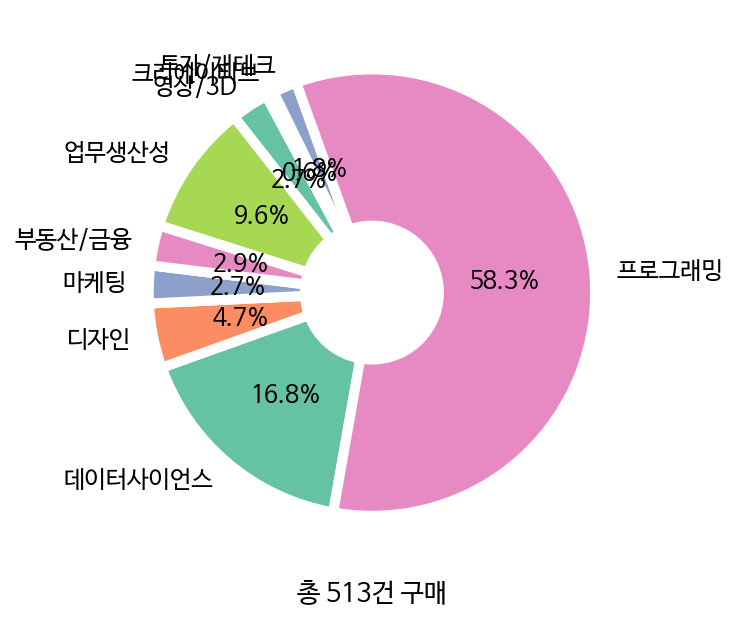

In [ ]:
t = pd.pivot_table(data=from_etc, index = ['category_title'], values=['id'],  aggfunc = "count").reset_index()
plt.figure(figsize=(5,7))
colors = sns.color_palette('Set2')[0:5]
plt.pie(t['id'], labels=t['category_title'], autopct='%.1f%%', textprops={'fontsize': 12}, startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t['id'].sum()}건 구매")
plt.show()

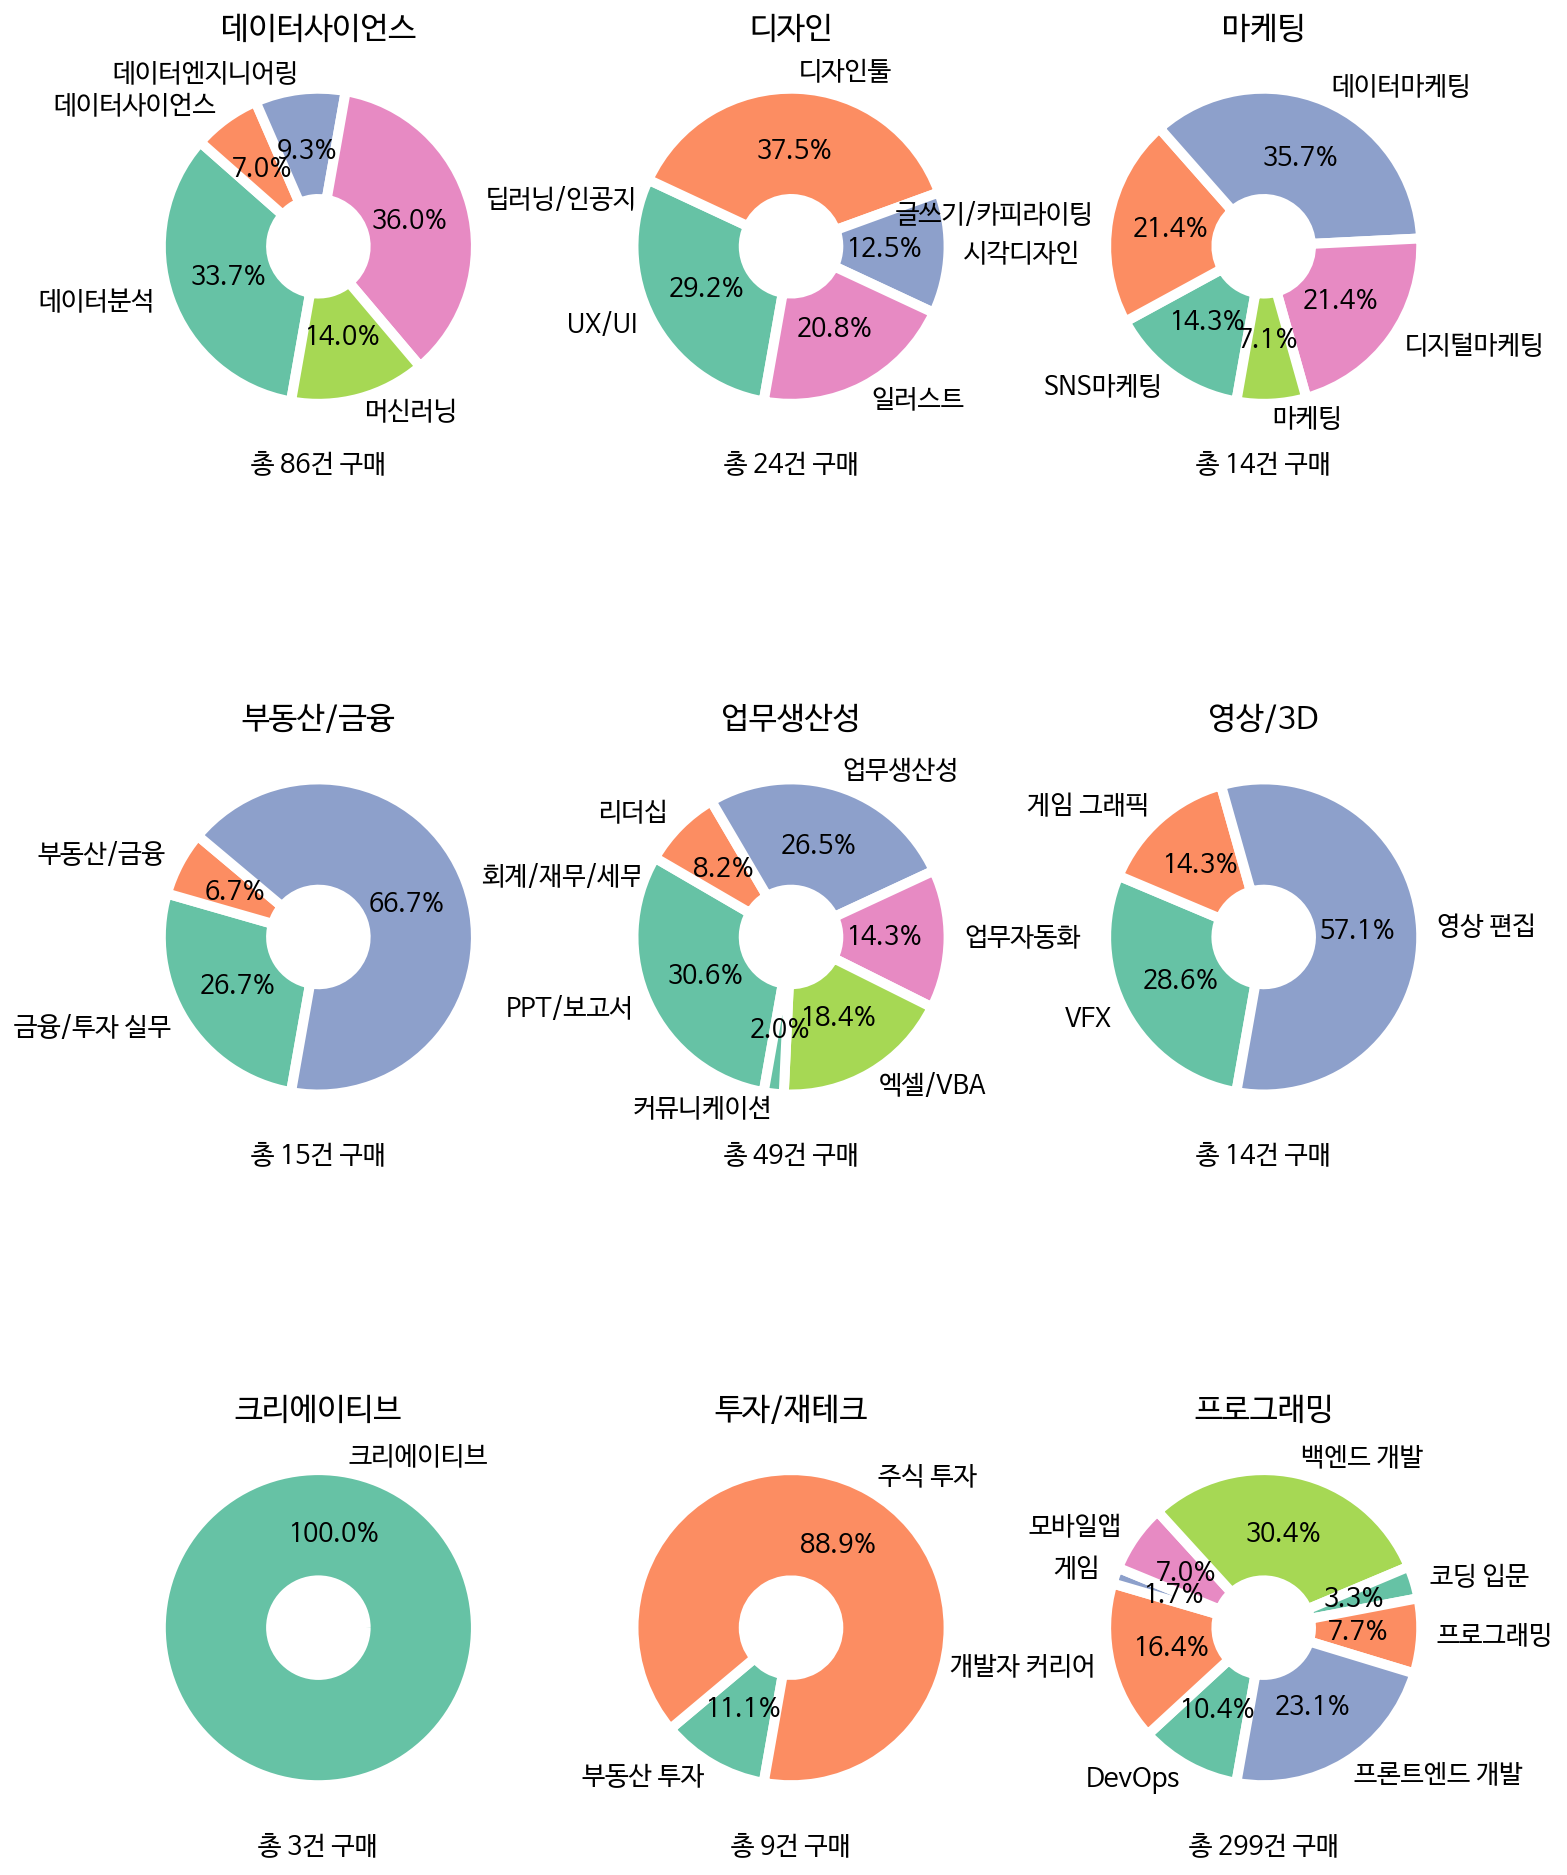

In [ ]:
t = pd.pivot_table(data=from_etc, index = ['category_title','subcategory_title'], values=['id'],  aggfunc = "count").reset_index()
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,18))
colors = sns.color_palette('Set2')[0:5]
for i, title in enumerate(ct):
    plt.subplot(3, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['id'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"총 {t1['id'].sum()}건 구매")
plt.show()

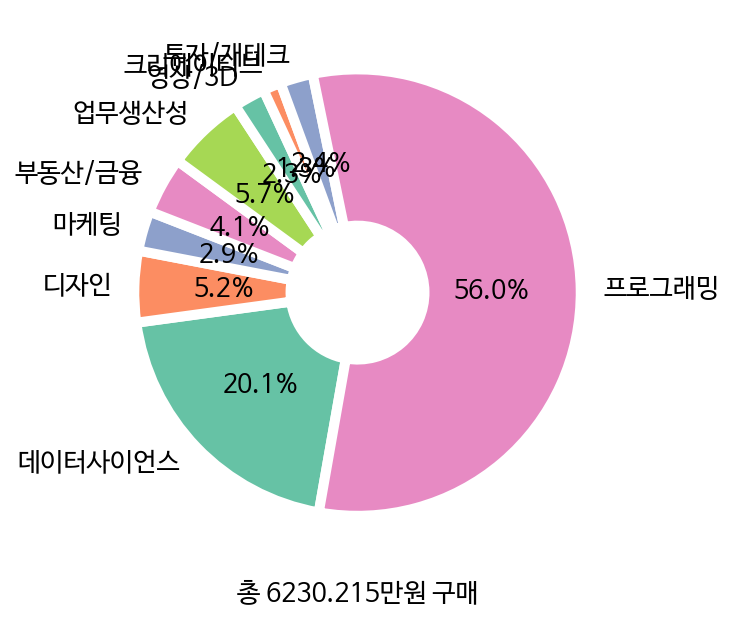

In [ ]:
t = pd.pivot_table(data=from_etc, index = ['category_title'], values=['revenue'],  aggfunc = "sum").reset_index()
plt.figure(figsize=(5,6))
colors = sns.color_palette('Set2')[0:5]
plt.pie(t['revenue'], labels=t['category_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"총 {t['revenue'].sum()/10000}만원 구매")
plt.show()

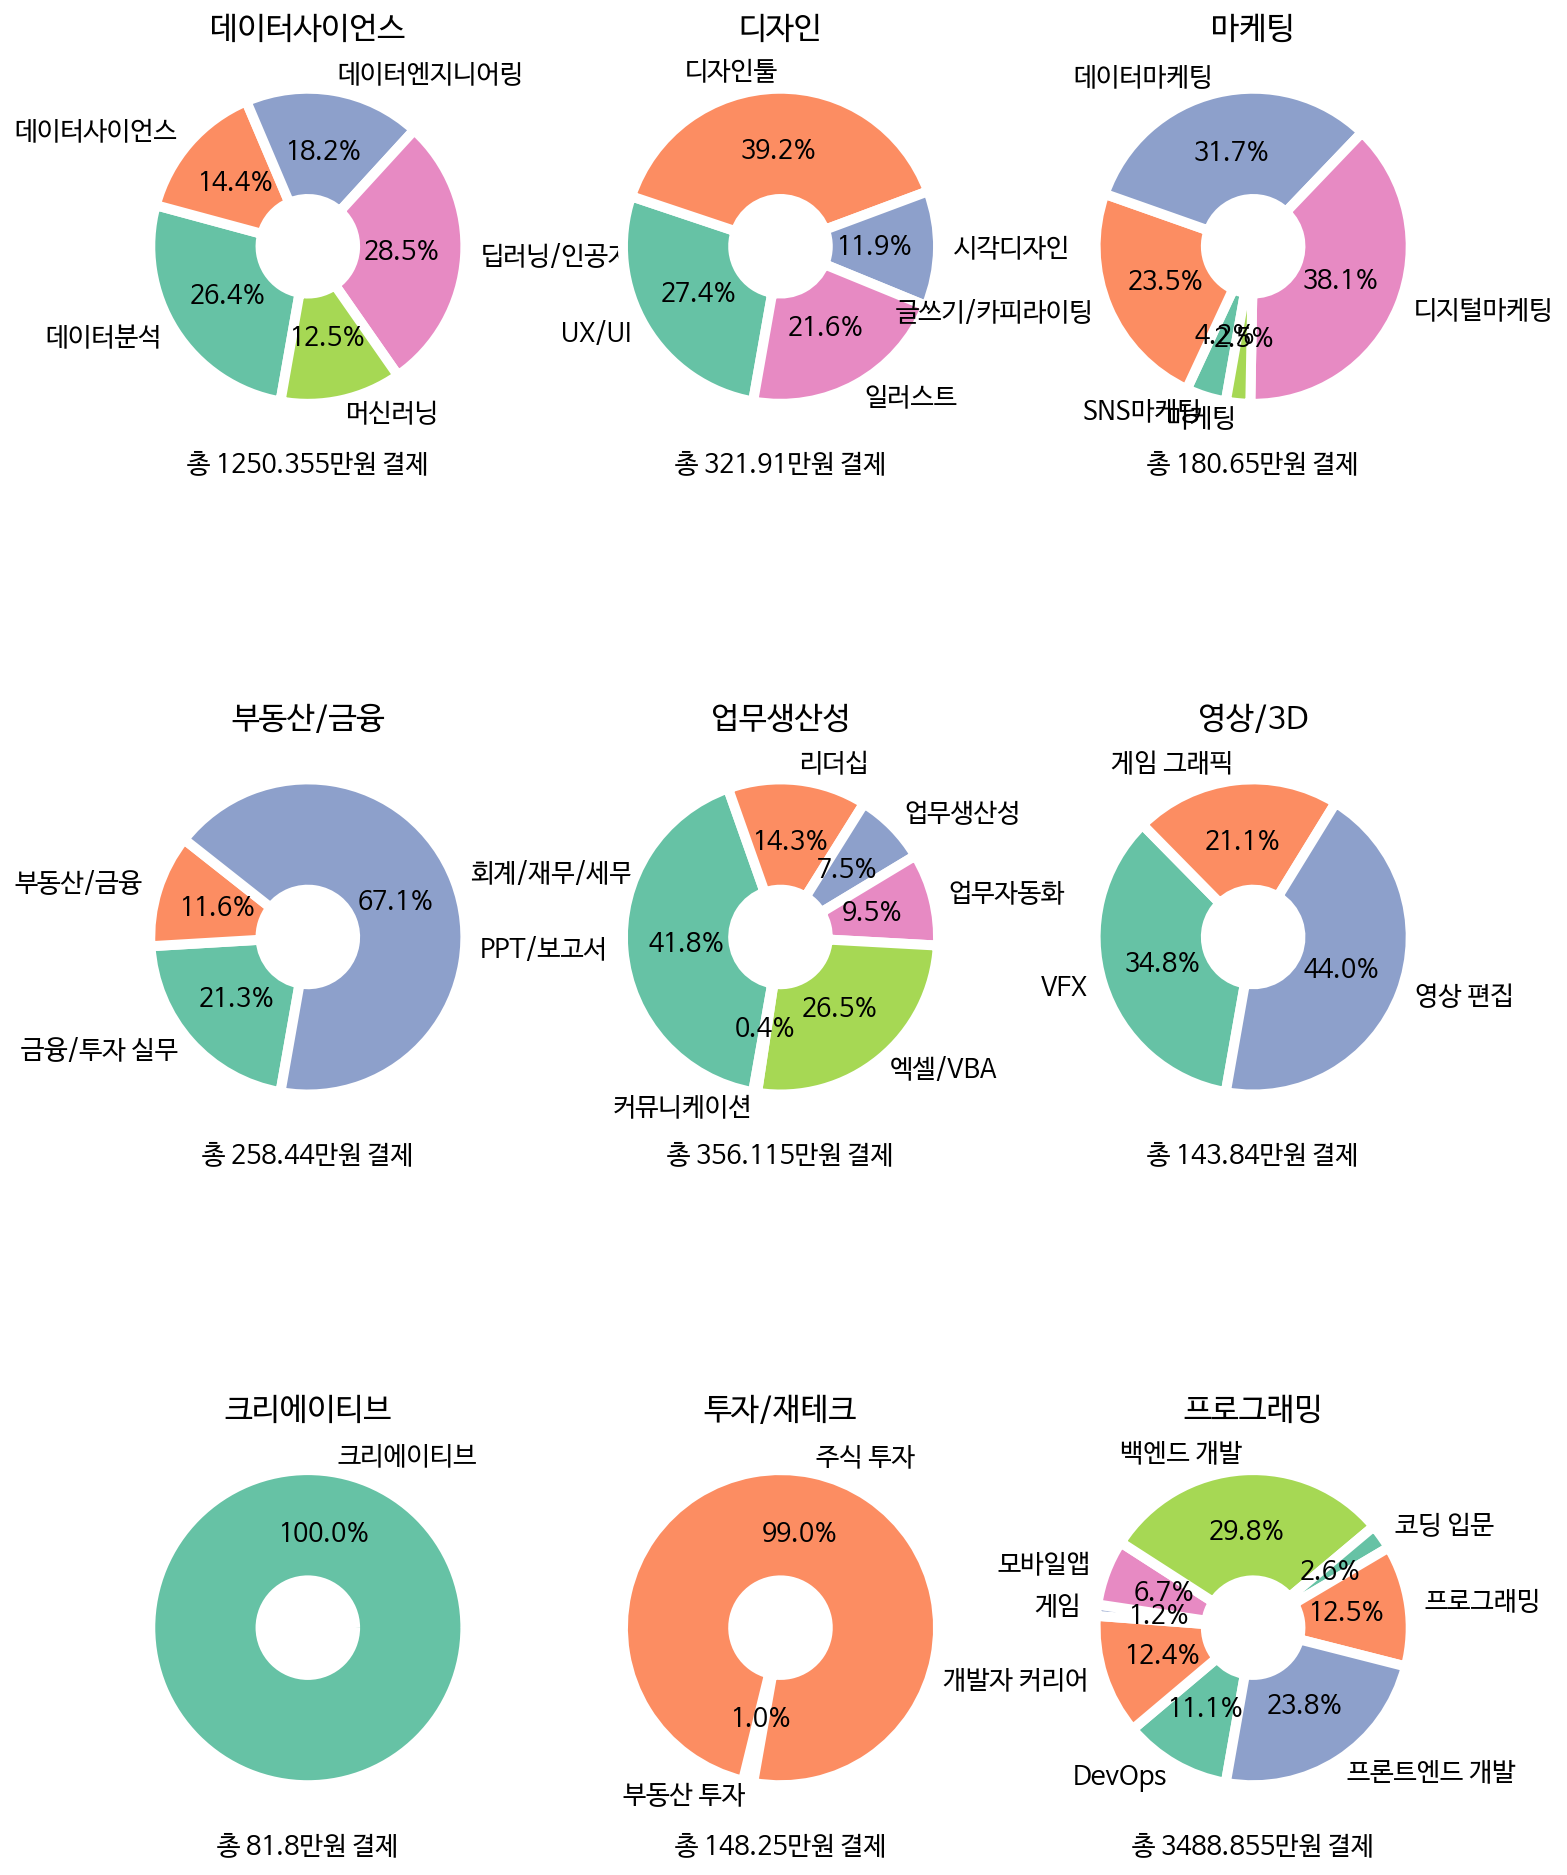

In [ ]:
t = pd.pivot_table(data=from_etc, index = ['category_title','subcategory_title'], values=['revenue'],  aggfunc = "sum").reset_index()
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,18))
colors = sns.color_palette('Set2')[0:5]
for i, title in enumerate(ct):
    plt.subplot(3, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['revenue'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"총 {t1['revenue'].sum()/10000}만원 결제")
plt.show()

프로그래밍, 데이터사이언스 카테고리에 관심을 가지는 전환고객의 비율이 대다수이다.

해당 카테고리에서의 결제액도 대다수를 차지한다.

- 전환고객 쿠폰 분석

In [ ]:
# 쿠폰 사용여부 라벨링
from_etc["coupon_used"] = True
from_etc.loc[from_etc["coupon_title"].isnull(),"coupon_used"] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# pt 데이터 쿠폰 사용여부 라벨링
pt["coupon_used"] = True
pt.loc[pt["coupon_title"].isnull(),"coupon_used"] = False

In [ ]:
t0 = from_etc.groupby("coupon_used").agg({"id": "count"})

In [ ]:
t00 = pt.groupby("coupon_used").agg({"id": "count"})

In [ ]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45951 entries, 4 to 105418
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      45951 non-null  int64         
 1   customer_id             45951 non-null  int64         
 2   course_id               43973 non-null  float64       
 3   type                    45951 non-null  object        
 4   state                   45951 non-null  object        
 5   course_title            45951 non-null  object        
 6   category_title          45951 non-null  object        
 7   format                  45951 non-null  object        
 8   completed_at            45951 non-null  object        
 9   transaction_amount      45951 non-null  int64         
 10  coupon_title            21451 non-null  object        
 11  coupon_discount_amount  21451 non-null  float64       
 12  sale_price              45929 non-null  float

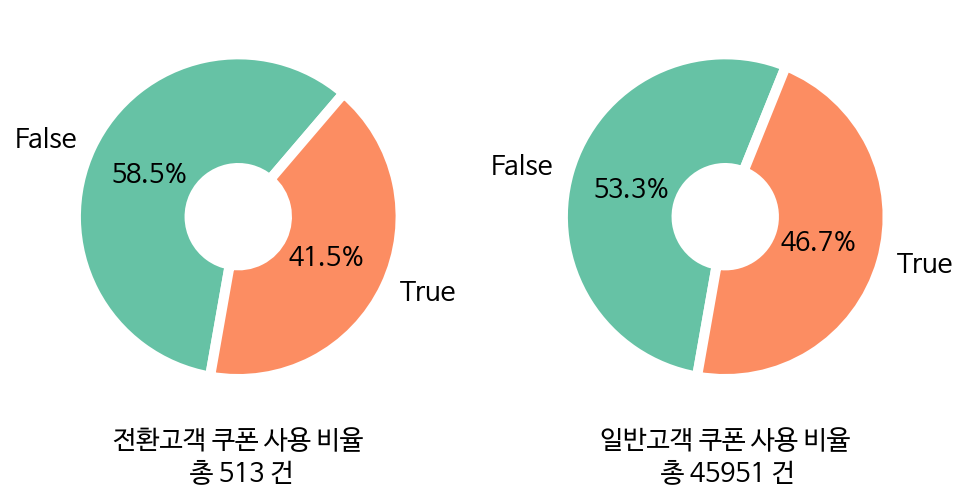

In [ ]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t0['id'], labels=t0.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"전환고객 쿠폰 사용 비율\n 총 {t0['id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t00['id'], labels=t00.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"일반고객 쿠폰 사용 비율\n 총 {t00['id'].sum()} 건")

plt.show()

일반고객의 쿠폰 사용 비율과 전환고객의 쿠폰 사용 비율 사이에는 큰 차이가 없다.

쿠폰이 전환 고객에 미치는 영향을 다른 관점에서 보아야 할듯 하다.

In [ ]:
# 비슷하게 쿠폰 사용 고객 비율을 계산해 보자
t0 = from_etc.groupby("customer_id").agg({"coupon_used": "sum"})
t00 = pt.groupby("customer_id").agg({"coupon_used": "sum"})

In [ ]:
def func(x):
    if x ==0 :
        return False
    else:
        return True

t0["coupon_used"] = t0["coupon_used"].apply(func)
t00["coupon_used"] = t00["coupon_used"].apply(func)

In [ ]:
t0 = from_etc.groupby("coupon_used").agg({"customer_id": "count"})
t00 = pt.groupby("coupon_used").agg({"customer_id": "count"})

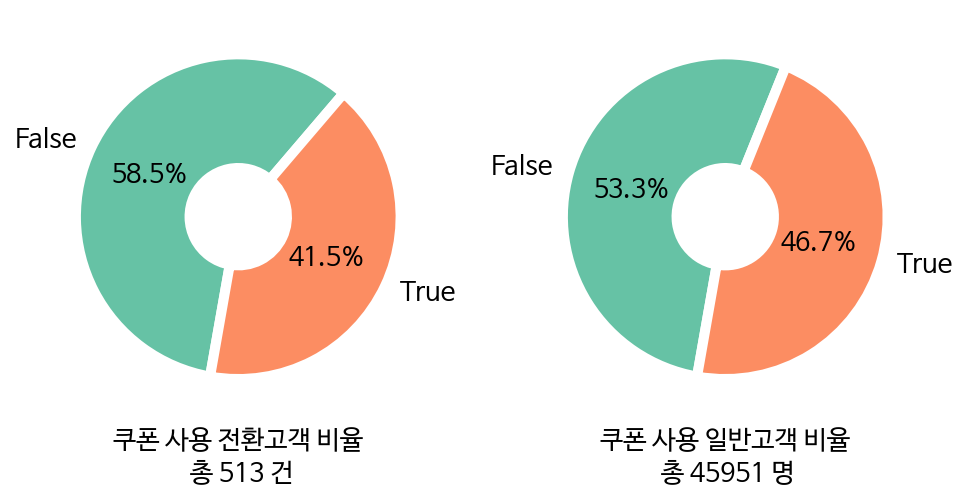

In [ ]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')[0:8]

plt.subplot(1,2,1)
plt.pie(t0['customer_id'], labels=t0.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"쿠폰 사용 전환고객 비율\n 총 {t0['customer_id'].sum()} 건")

plt.subplot(1,2,2)
plt.pie(t00['customer_id'], labels=t00.index, autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel(f"쿠폰 사용 일반고객 비율\n 총 {t00['customer_id'].sum()} 명")

plt.show()

마찬가지로 쿠폰 사용 일반고객 비율과 쿠폰 사용 전환고객 비율 사이에는 큰 차이가 없다.

### 결론

*   일반고객으로 가장 많은 전환이 이루어진 것은 온라인 완주반(179명)
*   일반고객으로 가장 많은 비율이 전환된 것은 스쿨 온라인(53.5%)
*   쿠폰은 사업/프로그램 고객의 일반고객 전환에 큰 기여를 하지 않음

**전략**

*   수익의 증대를 목적으로 한다면 b2b사업을,
*   일반고객의 유입을 늘리고자 한다면 스쿨 온라인 프로그램을,
*   둘 모두를 목적으로 한다면 온라인 완주반 프로그램을 더 기획하자
*   스쿨 온라인, 온라인 완주반 참여자들의 일반고객으로 전환이 많음
*   해당 프로그램 참여자들의 수료 시 위의 쿠폰 분석에서 가장 효과가 좋았던 1+1프로모션 쿠폰을 뿌리면 큰 효과를 볼 것으로 예상





# 최종 결론

## 과정
- 결측치 및 이상치 제거, 재가공하여 데이터를 전처리
- 타겟 변수 지정하고 비교 분석하여 insight 도출
- 전처리된 데이터를 이용하여 여러 각도에서 판매 전략 제시

## 분석 결과
- vip 고객은 전체 고객의 4.46% 정도, 총 결제 금액이 40만원 이상인 고객
- vip 고객은 일반 고객보다 5배 정도 많은 금액을 결제
- vip, normal 고객 모두 프로그래밍 카테고리를 가장 선호
- 전반적으로 normal 고객군은 다양한 카테고리를 구입하는 경향이 있음 
- vip 고객군은 프로그래밍 & 데이터사이언티스트 카테고리에 더 집중된 구매 성향을 보인다.
- 다양한 방면에서 분석 결과, 쿠폰을 사용할 시 수익에 긍정적인 영향을 끼친다.
- 특히 강의가 비싸더라도 '1+1','페이백 이벤트' 등의 쿠폰을 사용할 시, 전체적인 수익이 증가하였다.

## 판매 전략
1. 일반 고객을 VIP로 만드는 전략
- pre_vip의 평균 소비 금액은 33.7만원 선으로, 조금만 더 소비를 촉진한다면 충분히 vip가 될 수 있다.
- pre_vip의 경우 주식 관련 강의에 관심이 많으므로, 비싸더라도 퀄리티 좋은 주식 강의를 몇 개 런칭하여 공급을 늘린다.
- vip, 일반 고객에게 모두 인기가 많은 '프로그래밍','데이터사이언스','금융' 관련 강의들을 증강한다.
- 결제 시 또 다른 쿠폰을 제공해서 강의 결제 수를 늘린다.


2. 일반 고객을 늘리는 전략
- 강의를 1개만 구매한 경우가 많고, 이들 모두 쿠폰을 사용하였으므로, 홍보할 때 웰컴쿠폰을 좀 더 적극적으로 강조한다.
- '프로그래밍','업무생산성','데이터사이언스' 카테고리가 가장 인기가 많으므로, 해당 강의들을 중심으로 광고하고, 쿠폰을 배포한다.
- 월말에 구매율이 제일 높은 이유는, 'X월' 쿠폰의 유효기간이 월말이기 때문이다. 다른 쿠폰들의 유효기간도 월말로 지정하여 수익을 늘린다. (절판마케팅 적극적으로 활용)

3. 기타 고객을 일반 고객으로 유입시키는 전략
- 스쿨 온라인, 온라인 완주반 참여자들의 일반고객으로 전환이 많으므로 해당 프로그램 참여자들의 수료 시, 위의 쿠폰 분석에서 가장 효과가 좋았던 1+1프로모션, 웰컴 쿠폰 등을 배부하면 큰 효과를 볼 것으로 예상.